## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
# Define camera class, which keeps all camera information

In [ ]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


## Compute the camera calibration using chessboard images and store calibration results

In [1]:
from camera import Camera

%matplotlib inline
# create camera object
camera = Camera()
# calibrate camera and show result
camera.calibrate(9, 6, True)

# Test images - verification

3458.800331129298 4637.667018828233 0.4226557322730285
4006.999117492364 2029.2677161607753 0.09225480450629556
3135.8684842010534 2038.018498334595 0.34756461232604374
3330.550245647013 3740.581530681576 0.23170974155069582
4709.4941099004545 4805.7874244843615 0.23385520212060967
2256.2019296095127 1700.73913649834 0.31323724320742213
6608.790813096423 95810.62267311181 0.10083664678595096
10176.473050888344 198136.23876583847 0.047200132538104705


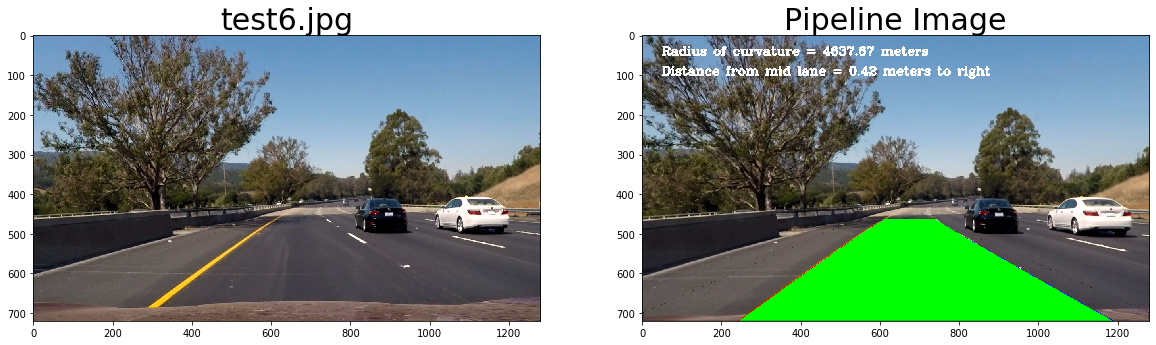

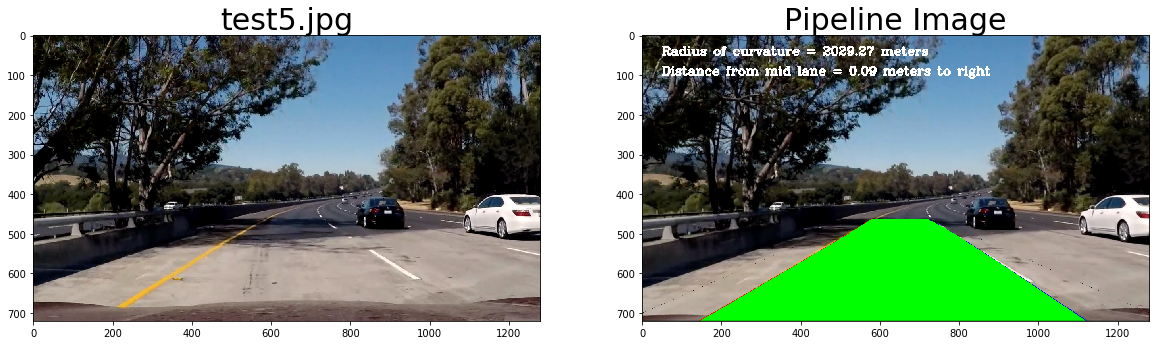

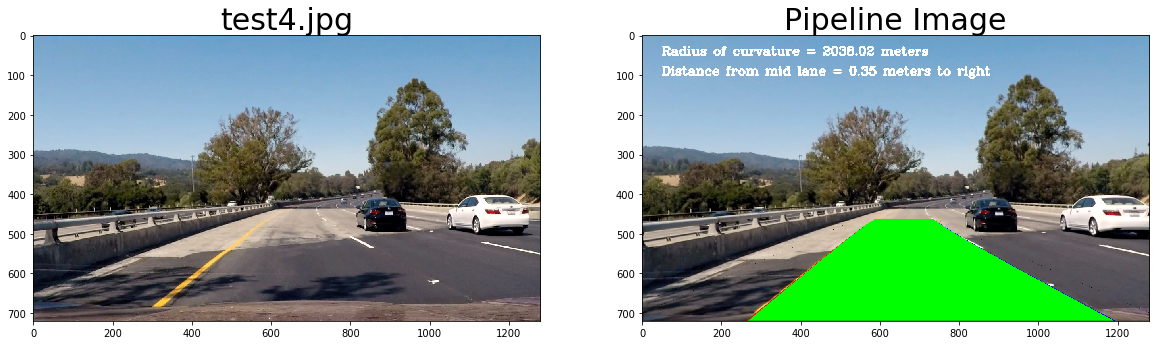

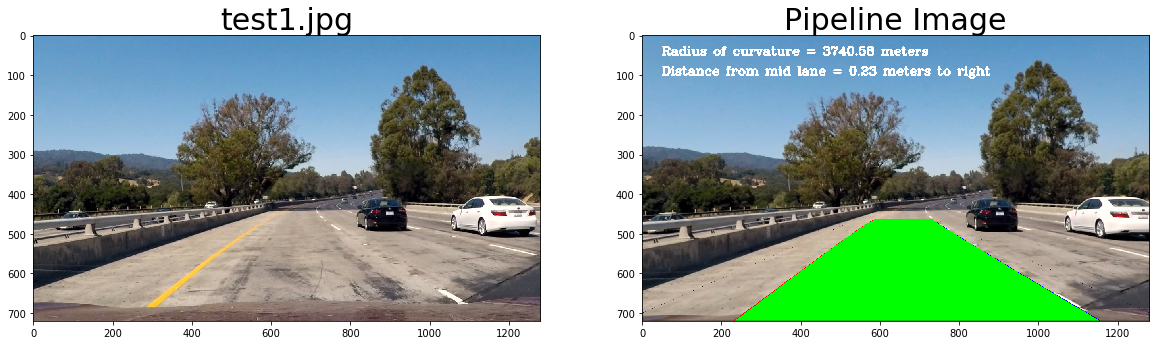

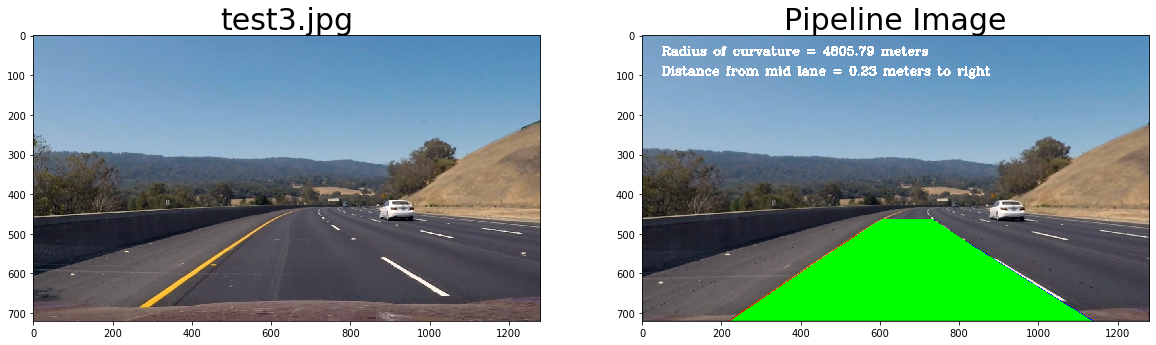

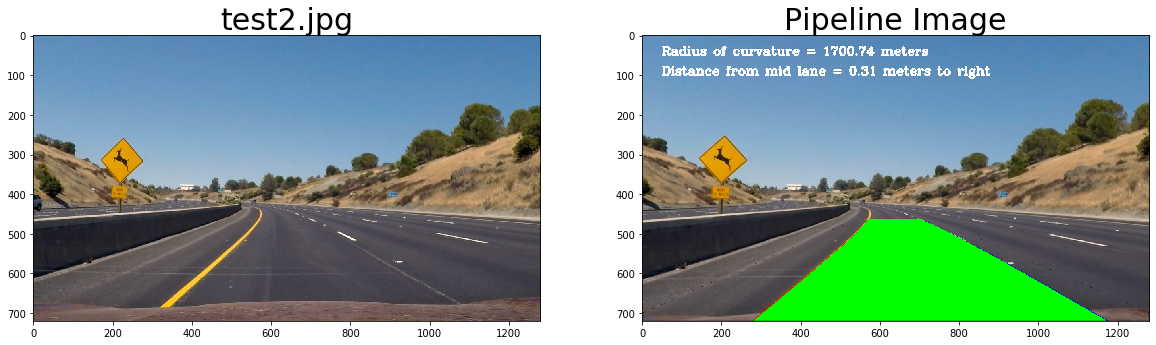

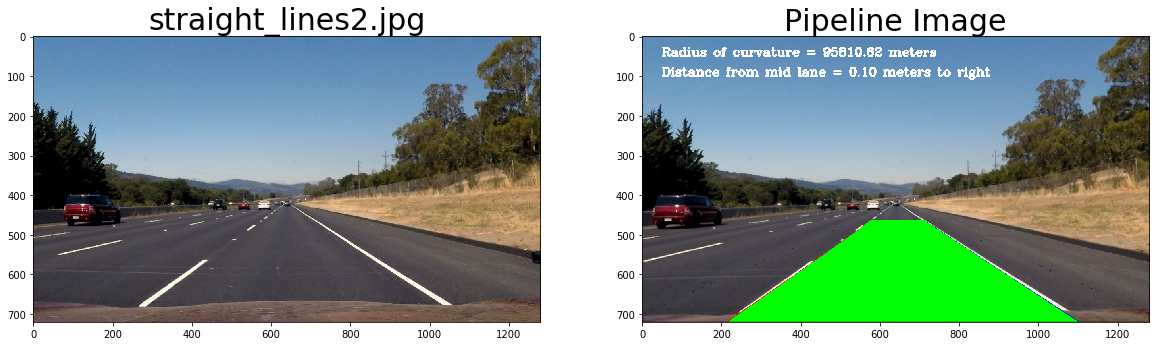

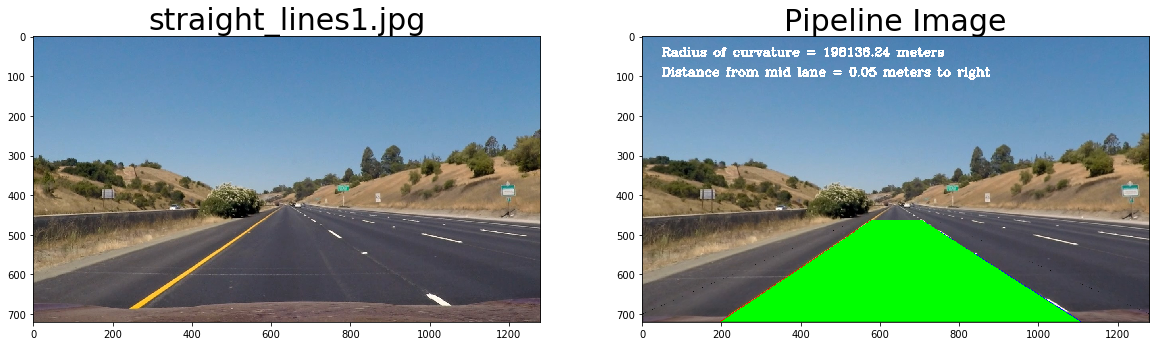

In [2]:
import os
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from graph import Graph
from lane import Lane

images = os.listdir("test_images/")

lane = Lane(lane_width_m=3.7, lane_length_m=30.)
lane.set_camera(camera)

for image_name in images:
    image = mpimg.imread("test_images/" + image_name)
    result = lane.pipeline(image)

    # mpimg.imsave("output_images/lane_" + image_name, result)
    # Visualize undistortion
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(image)
    ax1.set_title(image_name, fontsize=30)
    ax2.imshow(result, cmap='gray')
    # ax2.plot(result)
    ax2.set_title('Pipeline Image', fontsize=30)
    # f.savefig("output_images/hist_" + image_name)

# Test pipeline on Movie - "project_video.mp4"

In [3]:
### Process movie

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

lane = Lane(lane_width_m=3.7, lane_length_m=30.)
lane.set_camera(camera)

def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    binary = lane.pipeline(image)
    #result = Graph.to_3channel_binary(binary)
    #regional = lane.get_region(image)
    
    result = Graph.merge_images((image, binary))
    return result

white_output = 'output_images/project_video_text_merged.mp4'

clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

t:   0%|          | 0/1260 [00:00<?, ?it/s, now=None]

2493.5554991576714 2433.118988974382 0.3597222222222222
Moviepy - Building video output_images/project_video_text_merged.mp4.
Moviepy - Writing video output_images/project_video_text_merged.mp4



t:   0%|          | 2/1260 [00:00<02:27,  8.52it/s, now=None]

2493.5554991576714 2433.118988974382 0.3597222222222222


t:   0%|          | 3/1260 [00:00<03:11,  6.57it/s, now=None]

2205.696359693436 2203.8255973428813 0.3619023569023569


t:   0%|          | 4/1260 [00:00<03:39,  5.72it/s, now=None]

2239.6547589449738 2211.8525726797507 0.3597222222222222


t:   0%|          | 5/1260 [00:00<04:02,  5.19it/s, now=None]

2197.020025636662 3136.223259109162 0.3662626262626263


t:   0%|          | 6/1260 [00:01<04:15,  4.91it/s, now=None]

2085.239734284556 2385.5568454815902 0.36844276094276096


t:   1%|          | 7/1260 [00:01<04:23,  4.75it/s, now=None]

2019.8806401100185 2488.323690362702 0.36844276094276096


t:   1%|          | 8/1260 [00:01<04:32,  4.60it/s, now=None]

2047.995304457333 2411.714842044699 0.2943181818181818


t:   1%|          | 9/1260 [00:01<04:36,  4.53it/s, now=None]

2080.924486340151 1602.746004349286 0.29867845117845115


t:   1%|          | 10/1260 [00:02<04:41,  4.45it/s, now=None]

2207.571133793345 1712.747940521032 0.31175925925925924


t:   1%|          | 11/1260 [00:02<04:41,  4.43it/s, now=None]

2157.2479603291454 1897.323384446766 0.320479797979798


t:   1%|          | 12/1260 [00:02<04:43,  4.40it/s, now=None]

2236.093481367915 2027.3738099946568 0.32702020202020204


t:   1%|          | 13/1260 [00:02<04:43,  4.40it/s, now=None]

2326.84509501642 3742.6602353056364 0.34664141414141414


t:   1%|          | 14/1260 [00:02<04:42,  4.41it/s, now=None]

2590.0169547225414 2285.21840379171 0.3531818181818182


t:   1%|          | 15/1260 [00:03<04:45,  4.35it/s, now=None]

2707.7663664064557 2762.019855866548 0.3597222222222222


t:   1%|▏         | 16/1260 [00:03<04:46,  4.34it/s, now=None]

2580.391981040893 2829.330791127501 0.3619023569023569


t:   1%|▏         | 17/1260 [00:03<04:53,  4.24it/s, now=None]

2876.654590853418 5157.192669282891 0.3597222222222222


t:   1%|▏         | 18/1260 [00:04<05:18,  3.90it/s, now=None]

3002.2726526299675 3430.062592912764 0.3597222222222222


t:   2%|▏         | 19/1260 [00:04<05:15,  3.94it/s, now=None]

3434.9708252580394 5427.002493926134 0.35754208754208755


t:   2%|▏         | 20/1260 [00:04<05:11,  3.98it/s, now=None]

3412.2601145034237 4135.571244968113 0.3597222222222222


t:   2%|▏         | 21/1260 [00:04<05:10,  3.99it/s, now=None]

3513.281265775218 8674.036187121794 0.23327441077441077


t:   2%|▏         | 22/1260 [00:05<05:09,  4.00it/s, now=None]

3553.255182558671 1778.7487044787592 0.2528956228956229


t:   2%|▏         | 23/1260 [00:05<05:09,  4.00it/s, now=None]

4181.654192184841 1792.918239304264 0.26815656565656565


t:   2%|▏         | 24/1260 [00:05<05:08,  4.00it/s, now=None]

4832.611980539492 2372.528078943373 0.2834175084175084


t:   2%|▏         | 25/1260 [00:05<05:06,  4.03it/s, now=None]

3939.890101731201 2673.9164042335287 0.2855976430976431


t:   2%|▏         | 26/1260 [00:06<05:20,  3.85it/s, now=None]

3747.206344860099 2710.4722073171347 0.2834175084175084


t:   2%|▏         | 27/1260 [00:06<05:30,  3.74it/s, now=None]

4231.926505446794 3505.5766154278267 0.2528956228956229


t:   2%|▏         | 28/1260 [00:06<05:31,  3.71it/s, now=None]

3680.5088636597156 2797.3006278762577 0.265976430976431


t:   2%|▏         | 29/1260 [00:06<05:35,  3.67it/s, now=None]

3560.1586149019763 2815.6340644985553 0.2746969696969697


t:   2%|▏         | 30/1260 [00:07<06:08,  3.34it/s, now=None]

3084.1560936355195 2632.5900721464996 0.29213804713804714


t:   2%|▏         | 31/1260 [00:07<05:55,  3.46it/s, now=None]

2681.485338919613 2205.9228902955624 0.32265993265993265


t:   3%|▎         | 32/1260 [00:07<05:38,  3.62it/s, now=None]

2666.303897206758 2635.261291941037 0.32265993265993265


t:   3%|▎         | 33/1260 [00:07<05:28,  3.74it/s, now=None]

2195.193345789687 2737.7048725793384 0.20493265993265994


t:   3%|▎         | 34/1260 [00:08<05:20,  3.83it/s, now=None]

2326.8364155895606 2922.0455724155286 0.21801346801346802


t:   3%|▎         | 35/1260 [00:08<05:10,  3.95it/s, now=None]

2173.0048499420077 1690.558944677253 0.2289141414141414


t:   3%|▎         | 36/1260 [00:08<05:08,  3.96it/s, now=None]

2113.6815461704014 2216.6883804855124 0.24417508417508418


t:   3%|▎         | 37/1260 [00:08<05:04,  4.01it/s, now=None]

2053.394336873297 2230.6333263141373 0.2528956228956229


t:   3%|▎         | 38/1260 [00:09<05:13,  3.90it/s, now=None]

1897.3989771587267 2491.015743873669 0.26815656565656565


t:   3%|▎         | 39/1260 [00:09<05:05,  4.00it/s, now=None]

1850.1370219579699 1622.517695923741 0.27905723905723906


t:   3%|▎         | 40/1260 [00:09<05:06,  3.98it/s, now=None]

1828.330406168988 1686.8701544295393 0.2855976430976431


t:   3%|▎         | 41/1260 [00:09<05:11,  3.91it/s, now=None]

1805.7200161625758 1958.126853899401 0.29867845117845115


t:   3%|▎         | 42/1260 [00:10<05:09,  3.93it/s, now=None]

1800.7443391263098 2235.035119667883 0.30957912457912456


t:   3%|▎         | 43/1260 [00:10<05:04,  4.00it/s, now=None]

1817.5989492508286 2202.8520653214337 0.320479797979798


t:   3%|▎         | 44/1260 [00:10<05:09,  3.93it/s, now=None]

1841.5143421304635 2097.3825979405815 0.3292003367003367


t:   4%|▎         | 45/1260 [00:10<05:03,  4.00it/s, now=None]

1916.37699276124 2183.9157219103827 0.3313804713804714


t:   4%|▎         | 46/1260 [00:11<04:57,  4.07it/s, now=None]

1903.8719613322367 2079.4680935124047 0.23545454545454544


t:   4%|▎         | 47/1260 [00:11<04:56,  4.09it/s, now=None]

1958.428884132284 1524.613718969931 0.24417508417508418


t:   4%|▍         | 48/1260 [00:11<05:00,  4.03it/s, now=None]

1954.2701175488812 1564.3217394421822 0.25725589225589224


t:   4%|▍         | 49/1260 [00:11<05:01,  4.02it/s, now=None]

1977.152519195062 1863.2450100782842 0.265976430976431


t:   4%|▍         | 50/1260 [00:12<05:02,  4.01it/s, now=None]

2031.8323332244177 2420.278617045367 0.2855976430976431


t:   4%|▍         | 51/1260 [00:12<05:04,  3.96it/s, now=None]

2147.0183168331578 2800.7180190286076 0.29867845117845115


t:   4%|▍         | 52/1260 [00:12<05:15,  3.83it/s, now=None]

2331.8218629466883 2190.4933548747376 0.3073989898989899


t:   4%|▍         | 53/1260 [00:13<05:19,  3.77it/s, now=None]

2410.292953712995 2181.9948463628443 0.31393939393939396


t:   4%|▍         | 54/1260 [00:13<05:17,  3.80it/s, now=None]

2519.495711164485 2538.140261563913 0.3182996632996633


t:   4%|▍         | 55/1260 [00:13<05:18,  3.78it/s, now=None]

2501.4914502887486 2768.3144001071983 0.3248400673400673


t:   4%|▍         | 56/1260 [00:13<05:19,  3.77it/s, now=None]

2843.9344593748956 2880.2960140984546 0.3292003367003367


t:   5%|▍         | 57/1260 [00:14<05:21,  3.74it/s, now=None]

3116.8502963967594 3315.1016783832397 0.3292003367003367


t:   5%|▍         | 58/1260 [00:14<05:27,  3.67it/s, now=None]

3420.345019392744 3787.6219499072554 0.2092929292929293


t:   5%|▍         | 59/1260 [00:14<05:29,  3.65it/s, now=None]

4006.9633930962013 3329.3875041256483 0.21365319865319865


t:   5%|▍         | 60/1260 [00:14<05:25,  3.69it/s, now=None]

3273.5332198996866 1771.9436992664946 0.21801346801346802


t:   5%|▍         | 61/1260 [00:15<05:26,  3.67it/s, now=None]

3196.199821508122 2375.9067331592432 0.2201936026936027


t:   5%|▍         | 62/1260 [00:15<05:26,  3.67it/s, now=None]

3076.175469983679 1944.891692723909 0.2289141414141414


t:   5%|▌         | 63/1260 [00:15<05:25,  3.68it/s, now=None]

2939.7661556766166 2287.8761650973493 0.23763468013468014


t:   5%|▌         | 64/1260 [00:16<05:24,  3.69it/s, now=None]

2759.512273127421 1852.8379855173807 0.24199494949494949


t:   5%|▌         | 65/1260 [00:16<05:22,  3.71it/s, now=None]

3104.6475215884957 2051.8096274844456 0.2507154882154882


t:   5%|▌         | 66/1260 [00:16<05:17,  3.76it/s, now=None]

2490.716055548628 2303.0783454261764 0.25943602693602696


t:   5%|▌         | 67/1260 [00:16<05:14,  3.79it/s, now=None]

2408.372009743155 2275.019776524432 0.26161616161616164


t:   5%|▌         | 68/1260 [00:17<05:16,  3.77it/s, now=None]

2302.171943909758 2723.528297047761 0.2637962962962963


t:   5%|▌         | 69/1260 [00:17<05:17,  3.76it/s, now=None]

2472.546242375149 3025.9600366739382 0.25725589225589224


t:   6%|▌         | 70/1260 [00:17<05:14,  3.78it/s, now=None]

2367.6961415196015 4154.577700043616 0.2637962962962963


t:   6%|▌         | 71/1260 [00:17<05:16,  3.76it/s, now=None]

2374.837272172756 5843.703587754842 0.11990740740740741


t:   6%|▌         | 72/1260 [00:18<05:20,  3.71it/s, now=None]

2344.4508693076186 1791.2708168389097 0.12644781144781145


t:   6%|▌         | 73/1260 [00:18<05:15,  3.76it/s, now=None]

2517.765606611257 1729.6857970103256 0.13734848484848486


t:   6%|▌         | 74/1260 [00:18<05:12,  3.79it/s, now=None]

2828.5117310203245 2910.8014252878233 0.14606902356902357


t:   6%|▌         | 75/1260 [00:18<05:14,  3.77it/s, now=None]

3108.183083798672 4219.432286482886 0.15914983164983165


t:   6%|▌         | 76/1260 [00:19<05:15,  3.75it/s, now=None]

3181.4221867574506 5516.249934105108 0.17223063973063973


t:   6%|▌         | 77/1260 [00:19<05:11,  3.80it/s, now=None]

3169.1068646127615 2593.6849957421023 0.18095117845117845


t:   6%|▌         | 78/1260 [00:19<05:15,  3.75it/s, now=None]

4348.051010170058 3125.487530303417 0.19621212121212123


t:   6%|▋         | 79/1260 [00:19<05:13,  3.77it/s, now=None]

5886.25081916668 14047.505467187597 0.2071127946127946


t:   6%|▋         | 80/1260 [00:20<05:14,  3.75it/s, now=None]

6337.627405400932 5821.028884554642 0.2092929292929293


t:   6%|▋         | 81/1260 [00:20<05:18,  3.70it/s, now=None]

6920.607800762453 9352.580582062934 0.2071127946127946


t:   7%|▋         | 82/1260 [00:20<05:22,  3.66it/s, now=None]

6345.544270622612 5249.741660149081 0.20057239057239057


t:   7%|▋         | 83/1260 [00:21<05:27,  3.59it/s, now=None]

6771.229559565306 4084.9243165875882 0.19403198653198653


t:   7%|▋         | 84/1260 [00:21<05:27,  3.59it/s, now=None]

5783.680668717181 3150.0812210319777 0.06976430976430976


t:   7%|▋         | 85/1260 [00:21<05:24,  3.62it/s, now=None]

7118.51176177463 3496.6117127640177 0.08066498316498316


t:   7%|▋         | 86/1260 [00:21<05:21,  3.66it/s, now=None]

4860.031842490189 2596.3322050840497 0.11772727272727272


t:   7%|▋         | 87/1260 [00:22<05:14,  3.73it/s, now=None]

5518.6053194840915 1930.9026715581633 0.13952861952861953


t:   7%|▋         | 88/1260 [00:22<05:14,  3.73it/s, now=None]

3391.5870460894075 2693.9821950032197 0.1438888888888889


t:   7%|▋         | 89/1260 [00:22<05:11,  3.75it/s, now=None]

2777.148028319136 1556.616677927541 0.13952861952861953


t:   7%|▋         | 90/1260 [00:22<05:08,  3.79it/s, now=None]

2557.171509066527 1888.92542239524 0.15042929292929294


t:   7%|▋         | 91/1260 [00:23<05:05,  3.82it/s, now=None]

2300.337755981918 2369.1180639604995 0.15696969696969698


t:   7%|▋         | 92/1260 [00:23<05:09,  3.77it/s, now=None]

2273.3549988722707 2104.2040264544266 0.1656902356902357


t:   7%|▋         | 93/1260 [00:23<05:32,  3.50it/s, now=None]

2272.9171752313614 2757.4813942782434 0.1765909090909091


t:   7%|▋         | 94/1260 [00:24<05:28,  3.55it/s, now=None]

2166.5284633808224 2798.134971887699 0.1874915824915825


t:   8%|▊         | 95/1260 [00:24<05:28,  3.55it/s, now=None]

2204.8831063614043 3890.5070591779063 0.18313131313131314


t:   8%|▊         | 96/1260 [00:24<05:17,  3.67it/s, now=None]

2084.3572650786487 6365.518540198025 0.08284511784511785


t:   8%|▊         | 97/1260 [00:24<05:09,  3.76it/s, now=None]

2162.4926036286915 1505.9294847726583 0.09374579124579124


t:   8%|▊         | 98/1260 [00:25<05:08,  3.76it/s, now=None]

2294.778152264171 1554.1509229145872 0.10464646464646465


t:   8%|▊         | 99/1260 [00:25<05:05,  3.80it/s, now=None]

2285.460389276941 1838.5776109978192 0.11990740740740741


t:   8%|▊         | 100/1260 [00:25<05:12,  3.72it/s, now=None]

2231.334252500021 2192.37866220793 0.13080808080808082


t:   8%|▊         | 101/1260 [00:25<05:06,  3.78it/s, now=None]

2357.584025861238 2350.063492247523 0.14824915824915824


t:   8%|▊         | 102/1260 [00:26<05:01,  3.84it/s, now=None]

2411.0763116608987 2450.4273375601574 0.15914983164983165


t:   8%|▊         | 103/1260 [00:26<04:59,  3.86it/s, now=None]

2364.339857390538 2022.6822772434625 0.16787037037037036


t:   8%|▊         | 104/1260 [00:26<05:02,  3.82it/s, now=None]

2387.858218738525 2240.7040197718575 0.18095117845117845


t:   8%|▊         | 105/1260 [00:27<05:06,  3.77it/s, now=None]

2591.777185198241 2391.5540279057177 0.1983922558922559


t:   8%|▊         | 106/1260 [00:27<05:07,  3.75it/s, now=None]

2679.819739884241 2481.885412434864 0.20493265993265994


t:   8%|▊         | 107/1260 [00:27<05:08,  3.74it/s, now=None]

2820.823637612645 2497.472240560291 0.2289141414141414


t:   9%|▊         | 108/1260 [00:27<05:13,  3.68it/s, now=None]

2994.38221003939 2786.783018945566 0.22673400673400673


t:   9%|▊         | 109/1260 [00:28<05:12,  3.68it/s, now=None]

2520.0758727716893 3009.9603806398427 0.16787037037037036


t:   9%|▊         | 110/1260 [00:28<05:12,  3.68it/s, now=None]

2525.219736482234 1854.253001862803 0.1744107744107744


t:   9%|▉         | 111/1260 [00:28<05:09,  3.71it/s, now=None]

2455.3407963306104 1840.001116157651 0.18531144781144782


t:   9%|▉         | 112/1260 [00:28<05:08,  3.73it/s, now=None]

2263.047274997383 2282.2994165222713 0.1983922558922559


t:   9%|▉         | 113/1260 [00:29<05:20,  3.58it/s, now=None]

2565.867694987319 2870.106757384826 0.2201936026936027


t:   9%|▉         | 114/1260 [00:29<05:23,  3.54it/s, now=None]

2230.4828533362293 2415.9882998016205 0.22673400673400673


t:   9%|▉         | 115/1260 [00:29<05:29,  3.48it/s, now=None]

2373.0389083478253 2116.8200620358457 0.23981481481481481


t:   9%|▉         | 116/1260 [00:30<05:24,  3.53it/s, now=None]

2193.7274993349733 2689.3411109286503 0.24635521885521885


t:   9%|▉         | 117/1260 [00:30<05:20,  3.56it/s, now=None]

2065.4730748263532 2443.1412179149934 0.2528956228956229


t:   9%|▉         | 118/1260 [00:30<05:12,  3.65it/s, now=None]

2162.024276996783 2823.444793845104 0.26161616161616164


t:   9%|▉         | 119/1260 [00:30<05:08,  3.70it/s, now=None]

2182.03926948814 2628.9868202871257 0.26815656565656565


t:  10%|▉         | 120/1260 [00:31<05:04,  3.74it/s, now=None]

2184.5084105896303 2487.9202412118952 0.26815656565656565


t:  10%|▉         | 121/1260 [00:31<05:00,  3.79it/s, now=None]

1996.8745666574089 2540.89756172954 0.1874915824915825


t:  10%|▉         | 122/1260 [00:31<05:02,  3.76it/s, now=None]

1981.0025498831046 2545.548120986889 0.20275252525252527


t:  10%|▉         | 123/1260 [00:31<05:01,  3.78it/s, now=None]

2002.2996048120374 1680.4806413459694 0.21583333333333332


t:  10%|▉         | 124/1260 [00:32<05:00,  3.78it/s, now=None]

1964.7844688499106 1634.5740510538037 0.22455387205387206


t:  10%|▉         | 125/1260 [00:32<05:00,  3.78it/s, now=None]

1956.7907048503828 1824.2831121734125 0.23981481481481481


t:  10%|█         | 126/1260 [00:32<04:58,  3.80it/s, now=None]

1883.1543275086467 2275.8100226502306 0.25725589225589224


t:  10%|█         | 127/1260 [00:32<04:59,  3.78it/s, now=None]

2032.3154703765206 1789.754441796811 0.27251683501683505


t:  10%|█         | 128/1260 [00:33<04:57,  3.80it/s, now=None]

1976.577731380245 1785.06396662957 0.2855976430976431


t:  10%|█         | 129/1260 [00:33<05:01,  3.75it/s, now=None]

1972.7754582037655 1686.6697742388485 0.3008585858585859


t:  10%|█         | 130/1260 [00:33<05:05,  3.70it/s, now=None]

2027.7559770594403 2098.3953176759705 0.30957912457912456


t:  10%|█         | 131/1260 [00:34<04:58,  3.78it/s, now=None]

2009.0190040724906 2348.429852567076 0.31175925925925924


t:  10%|█         | 132/1260 [00:34<04:55,  3.82it/s, now=None]

2088.381321081637 2363.883856922368 0.3182996632996633


t:  11%|█         | 133/1260 [00:34<04:50,  3.89it/s, now=None]

2059.259429903659 2953.383298579653 0.3248400673400673


t:  11%|█         | 134/1260 [00:34<04:49,  3.89it/s, now=None]

2235.8529254707205 5313.694698871877 0.22237373737373736


t:  11%|█         | 135/1260 [00:35<04:49,  3.89it/s, now=None]

2195.5734814400353 1725.2291361552948 0.24199494949494949


t:  11%|█         | 136/1260 [00:35<04:50,  3.87it/s, now=None]

2326.2840135615775 1890.2214233815148 0.2637962962962963


t:  11%|█         | 137/1260 [00:35<04:48,  3.90it/s, now=None]

2667.088041980344 2710.5075735436903 0.28995791245791247


t:  11%|█         | 138/1260 [00:35<04:57,  3.77it/s, now=None]

2567.785184034664 2445.4788217695373 0.29867845117845115


t:  11%|█         | 139/1260 [00:36<04:57,  3.77it/s, now=None]

2696.3074372415267 2512.36540259036 0.320479797979798


t:  11%|█         | 140/1260 [00:36<04:54,  3.80it/s, now=None]

2459.3012345760994 1795.6610488102242 0.32702020202020204


t:  11%|█         | 141/1260 [00:36<04:56,  3.78it/s, now=None]

3003.909164730797 2417.242037829522 0.3401010101010101


t:  11%|█▏        | 142/1260 [00:36<05:02,  3.70it/s, now=None]

2709.1803984719772 2176.022493594184 0.34664141414141414


t:  11%|█▏        | 143/1260 [00:37<04:59,  3.73it/s, now=None]

2888.9428911308787 2881.8761366452873 0.3488215488215488


t:  11%|█▏        | 144/1260 [00:37<05:01,  3.70it/s, now=None]

2680.9780058424135 2681.4004483993576 0.34664141414141414


t:  12%|█▏        | 145/1260 [00:37<04:59,  3.73it/s, now=None]

2587.0485110555587 2984.2285163773026 0.3401010101010101


t:  12%|█▏        | 146/1260 [00:37<04:56,  3.76it/s, now=None]

2670.80644036454 3258.3887404911516 0.23327441077441077


t:  12%|█▏        | 147/1260 [00:38<04:55,  3.76it/s, now=None]

2975.860957833284 4867.831629777985 0.23981481481481481


t:  12%|█▏        | 148/1260 [00:38<04:54,  3.77it/s, now=None]

2709.5900732551104 1885.877347734317 0.25507575757575757


t:  12%|█▏        | 149/1260 [00:38<04:51,  3.80it/s, now=None]

2943.959563190824 3066.7333673928697 0.2528956228956229


t:  12%|█▏        | 150/1260 [00:39<04:49,  3.83it/s, now=None]

2891.7965910978473 3474.189298067428 0.265976430976431


t:  12%|█▏        | 151/1260 [00:39<04:51,  3.81it/s, now=None]

2853.769453256133 7821.222807113443 0.2855976430976431


t:  12%|█▏        | 152/1260 [00:39<04:55,  3.75it/s, now=None]

2972.123669112728 2503.094461622861 0.2943181818181818


t:  12%|█▏        | 153/1260 [00:39<04:52,  3.78it/s, now=None]

2926.9464939046543 2127.0837334693247 0.3052188552188552


t:  12%|█▏        | 154/1260 [00:40<04:51,  3.80it/s, now=None]

3323.798146510819 3291.274513799695 0.30957912457912456


t:  12%|█▏        | 155/1260 [00:40<04:44,  3.88it/s, now=None]

3541.0653855112055 4888.260186770835 0.31611952861952863


t:  12%|█▏        | 156/1260 [00:40<04:45,  3.87it/s, now=None]

3512.8218450235336 3126.5077087405707 0.320479797979798


t:  12%|█▏        | 157/1260 [00:40<04:48,  3.82it/s, now=None]

3238.579635061751 3607.6843352322917 0.3182996632996633


t:  13%|█▎        | 158/1260 [00:41<04:49,  3.80it/s, now=None]

2941.808490717815 2981.2709940797376 0.3182996632996633


t:  13%|█▎        | 159/1260 [00:41<04:47,  3.84it/s, now=None]

2840.905362570454 3623.4701457550896 0.21365319865319865


t:  13%|█▎        | 160/1260 [00:41<04:51,  3.77it/s, now=None]

2837.104806922585 1908.8067752474365 0.22237373737373736


t:  13%|█▎        | 161/1260 [00:41<04:51,  3.77it/s, now=None]

2558.3747212921785 2015.6935993876887 0.22237373737373736


t:  13%|█▎        | 162/1260 [00:42<04:50,  3.78it/s, now=None]

2743.5750814426083 2544.018219913567 0.23763468013468014


t:  13%|█▎        | 163/1260 [00:42<04:47,  3.82it/s, now=None]

2557.794622706069 3552.8069831715097 0.24417508417508418


t:  13%|█▎        | 164/1260 [00:42<04:49,  3.79it/s, now=None]

2476.8175506967 2977.6509658508485 0.2528956228956229


t:  13%|█▎        | 165/1260 [00:42<04:51,  3.75it/s, now=None]

2544.325720810294 1878.059998342915 0.25507575757575757


t:  13%|█▎        | 166/1260 [00:43<04:56,  3.69it/s, now=None]

2603.7816762887983 2379.74078033065 0.25725589225589224


t:  13%|█▎        | 167/1260 [00:43<04:49,  3.78it/s, now=None]

2265.2388437648215 2379.677377952172 0.2637962962962963


t:  13%|█▎        | 168/1260 [00:43<04:47,  3.79it/s, now=None]

2350.2311934398244 3323.131431100007 0.27251683501683505


t:  13%|█▎        | 169/1260 [00:44<04:44,  3.83it/s, now=None]

2593.5496736565715 3400.1795438555578 0.28123737373737373


t:  13%|█▎        | 170/1260 [00:44<04:41,  3.87it/s, now=None]

2506.063207562001 3399.978765169024 0.27905723905723906


t:  14%|█▎        | 171/1260 [00:44<04:35,  3.95it/s, now=None]

2576.2246283883655 2946.051269415078 0.1656902356902357


t:  14%|█▎        | 172/1260 [00:44<04:34,  3.96it/s, now=None]

2673.551180724326 3105.614895358927 0.17223063973063973


t:  14%|█▎        | 173/1260 [00:45<04:39,  3.89it/s, now=None]

2849.0386717000056 1670.3692650759551 0.17223063973063973


t:  14%|█▍        | 174/1260 [00:45<04:49,  3.75it/s, now=None]

3163.1101847723858 2260.2503832180287 0.1744107744107744


t:  14%|█▍        | 175/1260 [00:45<04:50,  3.73it/s, now=None]

2987.7625738060015 2602.855967551544 0.1765909090909091


t:  14%|█▍        | 176/1260 [00:45<04:53,  3.69it/s, now=None]

2974.209551340102 7669.824874728407 0.1874915824915825


t:  14%|█▍        | 177/1260 [00:46<04:59,  3.62it/s, now=None]

3014.7490731257776 2383.9352145985426 0.19621212121212123


t:  14%|█▍        | 178/1260 [00:46<04:51,  3.71it/s, now=None]

3260.2143001546538 2063.464485606644 0.2071127946127946


t:  14%|█▍        | 179/1260 [00:46<04:43,  3.81it/s, now=None]

3455.636451359024 2698.213109341135 0.22237373737373736


t:  14%|█▍        | 180/1260 [00:46<04:43,  3.81it/s, now=None]

3152.6987147094756 2546.7752932496624 0.2289141414141414


t:  14%|█▍        | 181/1260 [00:47<04:41,  3.84it/s, now=None]

3144.057354442061 2607.4388259453367 0.23981481481481481


t:  14%|█▍        | 182/1260 [00:47<04:38,  3.88it/s, now=None]

2649.3363469002707 2574.7681501013526 0.23981481481481481


t:  15%|█▍        | 183/1260 [00:47<04:38,  3.87it/s, now=None]

2545.986335545972 2161.197896413693 0.23981481481481481


t:  15%|█▍        | 184/1260 [00:47<04:42,  3.81it/s, now=None]

2285.9126307719107 2629.8767445611475 0.16132996632996632


t:  15%|█▍        | 185/1260 [00:48<04:51,  3.69it/s, now=None]

1982.3471093159167 1656.0423210720382 0.17223063973063973


t:  15%|█▍        | 186/1260 [00:48<04:44,  3.77it/s, now=None]

2007.063207933093 2148.1741485206794 0.18095117845117845


t:  15%|█▍        | 187/1260 [00:48<04:44,  3.77it/s, now=None]

1743.509775431277 2245.9112953287536 0.18967171717171719


t:  15%|█▍        | 188/1260 [00:49<04:49,  3.70it/s, now=None]

1687.0074429920933 3366.1740721747615 0.1983922558922559


t:  15%|█▌        | 189/1260 [00:49<04:45,  3.75it/s, now=None]

1605.7265538628528 1748.6157068685025 0.2071127946127946


t:  15%|█▌        | 190/1260 [00:49<04:41,  3.80it/s, now=None]

1636.6011831636429 1885.0588977579753 0.22673400673400673


t:  15%|█▌        | 191/1260 [00:49<04:36,  3.87it/s, now=None]

1682.5533418677408 2046.0416296927904 0.24853535353535353


t:  15%|█▌        | 192/1260 [00:50<04:35,  3.88it/s, now=None]

1628.4452039723883 2648.756604730934 0.2637962962962963


t:  15%|█▌        | 193/1260 [00:50<04:34,  3.88it/s, now=None]

1724.2094503601602 2465.3966411946562 0.28123737373737373


t:  15%|█▌        | 194/1260 [00:50<04:33,  3.89it/s, now=None]

1762.8767755352872 3396.0836980021745 0.29213804713804714


t:  15%|█▌        | 195/1260 [00:50<04:32,  3.91it/s, now=None]

1932.5386094172302 3417.4735385591807 0.3073989898989899


t:  16%|█▌        | 196/1260 [00:51<04:33,  3.89it/s, now=None]

1918.4020843990627 12899.635178885526 0.15042929292929294


t:  16%|█▌        | 197/1260 [00:51<04:34,  3.87it/s, now=None]

2195.0485272379224 1665.6711131097627 0.1874915824915825


t:  16%|█▌        | 198/1260 [00:51<04:51,  3.65it/s, now=None]

2310.7904087220927 1766.363940624944 0.21365319865319865


t:  16%|█▌        | 199/1260 [00:52<05:14,  3.38it/s, now=None]

2487.1790238424196 2060.348300715239 0.23327441077441077


t:  16%|█▌        | 200/1260 [00:52<05:09,  3.43it/s, now=None]

2548.140086086684 2171.6159633903253 0.2528956228956229


t:  16%|█▌        | 201/1260 [00:52<05:01,  3.51it/s, now=None]

2582.298366027415 2807.7743778155136 0.25725589225589224


t:  16%|█▌        | 202/1260 [00:52<04:55,  3.57it/s, now=None]

2754.963954309048 2561.613937025024 0.25943602693602696


t:  16%|█▌        | 203/1260 [00:53<04:51,  3.62it/s, now=None]

2722.771960255818 3035.585944016507 0.25943602693602696


t:  16%|█▌        | 204/1260 [00:53<04:50,  3.63it/s, now=None]

2534.852885586558 2594.143143628077 0.25725589225589224


t:  16%|█▋        | 205/1260 [00:53<04:50,  3.64it/s, now=None]

2675.726038267343 3257.8893546370236 0.26161616161616164


t:  16%|█▋        | 206/1260 [00:53<04:46,  3.67it/s, now=None]

2603.432529713128 3115.4770401321507 0.2637962962962963


t:  16%|█▋        | 207/1260 [00:54<04:49,  3.63it/s, now=None]

2516.2162609190536 3362.892823129747 0.25507575757575757


t:  17%|█▋        | 208/1260 [00:54<04:45,  3.69it/s, now=None]

2342.3933860325337 3598.6580242052155 0.12644781144781145


t:  17%|█▋        | 209/1260 [00:54<04:37,  3.79it/s, now=None]

2307.4258298763143 1622.7602948365243 0.1329882154882155


t:  17%|█▋        | 210/1260 [00:54<04:28,  3.91it/s, now=None]

2249.464011512761 1675.8038290895965 0.16351010101010102


t:  17%|█▋        | 211/1260 [00:55<04:33,  3.84it/s, now=None]

2230.3937486837112 1958.021749713622 0.18531144781144782


t:  17%|█▋        | 212/1260 [00:55<04:32,  3.85it/s, now=None]

2521.1355302708685 2083.230673401509 0.20493265993265994


t:  17%|█▋        | 213/1260 [00:55<04:29,  3.88it/s, now=None]

2377.5120405016105 2511.2238651527173 0.21801346801346802


t:  17%|█▋        | 214/1260 [00:55<04:27,  3.91it/s, now=None]

2326.1418201277515 1764.241132575515 0.21801346801346802


t:  17%|█▋        | 215/1260 [00:56<04:21,  3.99it/s, now=None]

2246.3421711456795 1856.8543506829958 0.2310942760942761


t:  17%|█▋        | 216/1260 [00:56<04:27,  3.90it/s, now=None]

2168.771830386078 2192.4447937102955 0.2310942760942761


t:  17%|█▋        | 217/1260 [00:56<04:25,  3.92it/s, now=None]

2179.292254659803 2393.4918646731007 0.23545454545454544


t:  17%|█▋        | 218/1260 [00:57<04:51,  3.58it/s, now=None]

2073.6792395978246 2437.71900184889 0.23763468013468014


t:  17%|█▋        | 219/1260 [00:57<04:45,  3.65it/s, now=None]

2217.9268600780656 2460.3169977231087 0.2289141414141414


t:  17%|█▋        | 220/1260 [00:57<04:38,  3.73it/s, now=None]

2061.4044013247135 3364.494411941516 0.22673400673400673


t:  18%|█▊        | 221/1260 [00:57<04:31,  3.83it/s, now=None]

2290.6212390180535 3238.181970364836 0.09810606060606061


t:  18%|█▊        | 222/1260 [00:58<04:28,  3.87it/s, now=None]

2286.72776820548 1641.9573720406906 0.11772727272727272


t:  18%|█▊        | 223/1260 [00:58<04:24,  3.93it/s, now=None]

2395.952670331822 2090.178435592714 0.13734848484848486


t:  18%|█▊        | 224/1260 [00:58<04:28,  3.85it/s, now=None]

2603.7344886211495 2274.049856304672 0.14824915824915824


t:  18%|█▊        | 225/1260 [00:58<04:34,  3.76it/s, now=None]

2325.545476001466 3341.316229314471 0.16132996632996632


t:  18%|█▊        | 226/1260 [00:59<04:30,  3.83it/s, now=None]

2547.950890887608 2053.8579393875084 0.16351010101010102


t:  18%|█▊        | 227/1260 [00:59<04:24,  3.91it/s, now=None]

2501.83090469443 2455.6166065049356 0.16787037037037036


t:  18%|█▊        | 228/1260 [00:59<04:24,  3.91it/s, now=None]

2450.272930026262 2795.8513797260935 0.1744107744107744


t:  18%|█▊        | 229/1260 [00:59<04:29,  3.83it/s, now=None]

2579.2077443232456 2865.838811175909 0.17877104377104377


t:  18%|█▊        | 230/1260 [01:00<04:25,  3.88it/s, now=None]

2713.5595301813196 3384.753433908461 0.18313131313131314


t:  18%|█▊        | 231/1260 [01:00<04:28,  3.84it/s, now=None]

2788.7177578829023 3642.590533530762 0.17877104377104377


t:  18%|█▊        | 232/1260 [01:00<04:30,  3.80it/s, now=None]

2851.4049498879376 3726.3138545778907 0.17005050505050506


t:  18%|█▊        | 233/1260 [01:01<04:45,  3.60it/s, now=None]

2841.295351853665 3025.698887530489 0.054503367003367005


t:  19%|█▊        | 234/1260 [01:01<05:11,  3.30it/s, now=None]

3059.9794928669394 1642.0691795942405 0.05668350168350168


t:  19%|█▊        | 235/1260 [01:01<05:07,  3.34it/s, now=None]

3844.095106289735 2168.266305175163 0.06322390572390572


t:  19%|█▊        | 236/1260 [01:01<04:58,  3.43it/s, now=None]

3350.99273517153 2409.840163251975 0.06976430976430976


t:  19%|█▉        | 237/1260 [01:02<04:45,  3.58it/s, now=None]

3239.3401913015664 3134.7301196504404 0.06976430976430976


t:  19%|█▉        | 238/1260 [01:02<04:32,  3.75it/s, now=None]

3001.9456821280423 1742.622490047413 0.07848484848484849


t:  19%|█▉        | 239/1260 [01:02<04:21,  3.90it/s, now=None]

3024.1667577713897 2395.059512960743 0.08502525252525253


t:  19%|█▉        | 240/1260 [01:02<04:22,  3.89it/s, now=None]

2873.203856371018 2150.0232750132686 0.08938552188552189


t:  19%|█▉        | 241/1260 [01:03<04:22,  3.88it/s, now=None]

3102.8156112120073 2789.776313177164 0.09592592592592593


t:  19%|█▉        | 242/1260 [01:03<04:21,  3.89it/s, now=None]

2747.7960398309856 3089.3607364588033 0.10246632996632997


t:  19%|█▉        | 243/1260 [01:03<04:17,  3.95it/s, now=None]

3069.298207555271 3373.7740468035327 0.10028619528619528


t:  19%|█▉        | 244/1260 [01:03<04:17,  3.95it/s, now=None]

2558.0873146172585 3934.257934681676 0.09810606060606061


t:  19%|█▉        | 245/1260 [01:04<04:11,  4.04it/s, now=None]

2677.04299507047 3279.1951870117996 -0.013080808080808082


t:  20%|█▉        | 246/1260 [01:04<04:15,  3.97it/s, now=None]

2390.0774473741562 1729.0737883813033 -0.006540404040404041


t:  20%|█▉        | 247/1260 [01:04<04:12,  4.01it/s, now=None]

2413.9880724136488 1872.822562191115 0.00218013468013468


t:  20%|█▉        | 248/1260 [01:04<04:10,  4.04it/s, now=None]

2348.195026955952 1605.8157961766087 0.00872053872053872


t:  20%|█▉        | 249/1260 [01:05<04:11,  4.02it/s, now=None]

2273.074118591675 8248.158793067372 0.01744107744107744


t:  20%|█▉        | 250/1260 [01:05<04:07,  4.09it/s, now=None]

2440.6878417304274 1777.705451752731 0.03706228956228956


t:  20%|█▉        | 251/1260 [01:05<04:02,  4.17it/s, now=None]

2162.4675910593946 2343.2740706978543 0.0436026936026936


t:  20%|██        | 252/1260 [01:05<04:02,  4.16it/s, now=None]

2339.211871697748 2124.4321464836903 0.054503367003367005


t:  20%|██        | 253/1260 [01:06<04:01,  4.17it/s, now=None]

2489.28145157425 2834.5510866622567 0.06540404040404041


t:  20%|██        | 254/1260 [01:06<03:59,  4.19it/s, now=None]

2353.09420617652 2428.416457283925 0.07412457912457912


t:  20%|██        | 255/1260 [01:06<03:58,  4.22it/s, now=None]

2640.350976947861 3203.0785848220316 0.07848484848484849


t:  20%|██        | 256/1260 [01:06<04:01,  4.16it/s, now=None]

2543.90971463649 3618.9967500924286 0.08284511784511785


t:  20%|██        | 257/1260 [01:07<04:00,  4.18it/s, now=None]

2522.541860323713 3638.75281256944 -0.030521885521885523


t:  20%|██        | 258/1260 [01:07<04:05,  4.09it/s, now=None]

2554.2836262623014 1728.9281566882735 -0.0218013468013468


t:  21%|██        | 259/1260 [01:07<04:02,  4.14it/s, now=None]

2470.763621719049 1923.8963896522794 -0.00218013468013468


t:  21%|██        | 260/1260 [01:07<04:02,  4.13it/s, now=None]

2507.7895034885833 2659.779853392117 0.013080808080808082


t:  21%|██        | 261/1260 [01:08<04:01,  4.14it/s, now=None]

2512.611432676957 3736.0474855018356 0.023981481481481482


t:  21%|██        | 262/1260 [01:08<03:57,  4.20it/s, now=None]

2795.9671747874904 4629.864359330223 0.05014309764309764


t:  21%|██        | 263/1260 [01:08<03:54,  4.24it/s, now=None]

2993.693637518072 2336.2125139096656 0.06976430976430976


t:  21%|██        | 264/1260 [01:08<03:57,  4.19it/s, now=None]

2835.2001564313523 2179.798174238233 0.08502525252525253


t:  21%|██        | 265/1260 [01:08<03:57,  4.19it/s, now=None]

2786.880785763326 2652.6025600589733 0.09592592592592593


t:  21%|██        | 266/1260 [01:09<03:57,  4.19it/s, now=None]

2816.502278174051 2564.279155845742 0.10028619528619528


t:  21%|██        | 267/1260 [01:09<03:57,  4.18it/s, now=None]

2741.1784311171605 3219.6958611541686 0.10682659932659933


t:  21%|██▏       | 268/1260 [01:09<03:56,  4.19it/s, now=None]

2817.679295763039 3081.33251529554 0.11336700336700337


t:  21%|██▏       | 269/1260 [01:09<03:58,  4.15it/s, now=None]

2974.3472005581184 4422.880515937186 0.045782828282828286


t:  21%|██▏       | 270/1260 [01:10<03:58,  4.15it/s, now=None]

2824.2015611368292 2943.287395052129 0.05668350168350168


t:  22%|██▏       | 271/1260 [01:10<04:00,  4.11it/s, now=None]

2794.717901341246 2119.6200710924927 0.06540404040404041


t:  22%|██▏       | 272/1260 [01:10<04:00,  4.12it/s, now=None]

2601.431261295548 2206.2606733511507 0.0763047138047138


t:  22%|██▏       | 273/1260 [01:10<03:55,  4.19it/s, now=None]

2668.26504537493 3100.322285924697 0.0872053872053872


t:  22%|██▏       | 274/1260 [01:11<03:55,  4.18it/s, now=None]

2700.825673593134 2519.396408879188 0.10464646464646465


t:  22%|██▏       | 275/1260 [01:11<03:52,  4.24it/s, now=None]

2416.2245995474304 1987.0172735686688 0.11118686868686868


t:  22%|██▏       | 276/1260 [01:11<03:54,  4.19it/s, now=None]

2444.614231297955 2532.3210358765077 0.12644781144781145


t:  22%|██▏       | 277/1260 [01:11<03:54,  4.20it/s, now=None]

2721.6908128848304 2902.7720068712038 0.1438888888888889


t:  22%|██▏       | 278/1260 [01:12<03:50,  4.25it/s, now=None]

2738.3704093150636 3832.1679207716015 0.15478956228956228


t:  22%|██▏       | 279/1260 [01:12<03:49,  4.28it/s, now=None]

2899.835051114045 3757.8228069173756 0.15696969696969698


t:  22%|██▏       | 280/1260 [01:12<03:50,  4.26it/s, now=None]

2756.308512199536 4386.864433138955 0.17005050505050506


t:  22%|██▏       | 281/1260 [01:12<03:48,  4.28it/s, now=None]

2916.9479558058893 6980.153700322301 0.08284511784511785


t:  22%|██▏       | 282/1260 [01:13<03:47,  4.30it/s, now=None]

3063.1123943521666 2312.2516926538465 0.10028619528619528


t:  22%|██▏       | 283/1260 [01:13<03:47,  4.30it/s, now=None]

3077.8275640231395 1676.62619302352 0.11772727272727272


t:  23%|██▎       | 284/1260 [01:13<03:49,  4.26it/s, now=None]

3087.0315760678122 1971.584338787522 0.1329882154882155


t:  23%|██▎       | 285/1260 [01:13<03:49,  4.26it/s, now=None]

3143.7071786845872 3045.1400991434475 0.15696969696969698


t:  23%|██▎       | 286/1260 [01:13<03:48,  4.25it/s, now=None]

2946.451394728893 5169.94745468201 0.1765909090909091


t:  23%|██▎       | 287/1260 [01:14<03:47,  4.27it/s, now=None]

3204.07342052067 2700.135454513576 0.1874915824915825


t:  23%|██▎       | 288/1260 [01:14<03:50,  4.22it/s, now=None]

3303.5239232949457 2851.1024535636534 0.19621212121212123


t:  23%|██▎       | 289/1260 [01:14<03:51,  4.19it/s, now=None]

3557.764346959391 3572.1991528498497 0.2092929292929293


t:  23%|██▎       | 290/1260 [01:14<03:51,  4.20it/s, now=None]

3431.187431835965 3675.6665605085486 0.2201936026936027


t:  23%|██▎       | 291/1260 [01:15<03:48,  4.23it/s, now=None]

3852.212101140401 4098.111921402661 0.22455387205387206


t:  23%|██▎       | 292/1260 [01:15<03:48,  4.23it/s, now=None]

3848.786723313935 6758.157582505293 0.24635521885521885


t:  23%|██▎       | 293/1260 [01:15<03:47,  4.25it/s, now=None]

4143.618456149934 14600392.82231737 0.17005050505050506


t:  23%|██▎       | 294/1260 [01:15<03:51,  4.17it/s, now=None]

4120.194975640234 2899.85179610498 0.18313131313131314


t:  23%|██▎       | 295/1260 [01:16<03:47,  4.24it/s, now=None]

4134.982259981835 3458.2939744323244 0.18967171717171719


t:  23%|██▎       | 296/1260 [01:16<03:44,  4.29it/s, now=None]

3701.813627232209 1907.6369848414186 0.20493265993265994


t:  24%|██▎       | 297/1260 [01:16<03:43,  4.30it/s, now=None]

4103.201614682582 3627.532477243476 0.21365319865319865


t:  24%|██▎       | 298/1260 [01:16<03:43,  4.31it/s, now=None]

4138.465006622818 2448.2209558048985 0.22237373737373736


t:  24%|██▎       | 299/1260 [01:17<03:48,  4.21it/s, now=None]

4359.858562232011 2291.398216299878 0.23327441077441077


t:  24%|██▍       | 300/1260 [01:17<03:54,  4.10it/s, now=None]

4737.816851177231 3501.809594627528 0.23545454545454544


t:  24%|██▍       | 301/1260 [01:17<03:53,  4.11it/s, now=None]

5139.356727238514 4307.856182656008 0.23981481481481481


t:  24%|██▍       | 302/1260 [01:17<03:52,  4.13it/s, now=None]

4500.627957489473 5206.06037584299 0.23981481481481481


t:  24%|██▍       | 303/1260 [01:18<03:54,  4.08it/s, now=None]

4547.263338826911 3994.2880682123114 0.24417508417508418


t:  24%|██▍       | 304/1260 [01:18<03:55,  4.05it/s, now=None]

5694.671610542716 7603.918890026058 0.24853535353535353


t:  24%|██▍       | 305/1260 [01:18<03:55,  4.06it/s, now=None]

5260.121324336407 2695.438901263348 0.1874915824915825


t:  24%|██▍       | 306/1260 [01:18<03:53,  4.08it/s, now=None]

5884.3030141793115 3045.809795645225 0.19403198653198653


t:  24%|██▍       | 307/1260 [01:19<03:57,  4.01it/s, now=None]

5812.190087200464 4124.0784272880555 0.18967171717171719


t:  24%|██▍       | 308/1260 [01:19<03:59,  3.97it/s, now=None]

6512.637151310422 2758.1198684307824 0.2092929292929293


t:  25%|██▍       | 309/1260 [01:19<04:01,  3.94it/s, now=None]

5911.390120786252 2596.652301253608 0.21583333333333332


t:  25%|██▍       | 310/1260 [01:19<04:01,  3.94it/s, now=None]

5825.320903555849 3994.4871753645766 0.22673400673400673


t:  25%|██▍       | 311/1260 [01:20<04:03,  3.89it/s, now=None]

7065.641151760616 3554.4993165897813 0.23763468013468014


t:  25%|██▍       | 312/1260 [01:20<04:05,  3.86it/s, now=None]

8294.183544311392 8229.870168700189 0.24199494949494949


t:  25%|██▍       | 313/1260 [01:20<04:05,  3.86it/s, now=None]

13118.396753255001 14409.361484751173 0.25507575757575757


t:  25%|██▍       | 314/1260 [01:20<04:06,  3.84it/s, now=None]

12586.422216711557 20921.182609768573 0.2637962962962963


t:  25%|██▌       | 315/1260 [01:21<04:11,  3.76it/s, now=None]

18861.077154266273 105045.14534194002 0.26815656565656565


t:  25%|██▌       | 316/1260 [01:21<04:15,  3.70it/s, now=None]

17933.30265759963 8432.185979398077 0.2637962962962963


t:  25%|██▌       | 317/1260 [01:21<04:15,  3.69it/s, now=None]

32240.44823431097 3232.0151999944515 0.2071127946127946


t:  25%|██▌       | 318/1260 [01:21<04:12,  3.74it/s, now=None]

29525.81106335728 8821.946868932573 0.2201936026936027


t:  25%|██▌       | 319/1260 [01:22<04:15,  3.69it/s, now=None]

39824.84355121662 216240.42768010736 0.22455387205387206


t:  25%|██▌       | 320/1260 [01:22<04:15,  3.68it/s, now=None]

40734.96879082672 8656.572298333795 0.23327441077441077


t:  25%|██▌       | 321/1260 [01:22<04:16,  3.66it/s, now=None]

950478.905735036 8118.354018711185 0.23763468013468014


t:  26%|██▌       | 322/1260 [01:23<04:17,  3.65it/s, now=None]

34191.85090600177 4201.560449452306 0.24853535353535353


t:  26%|██▌       | 323/1260 [01:23<04:22,  3.57it/s, now=None]

15304.44498277088 7191.658449596948 0.25943602693602696


t:  26%|██▌       | 324/1260 [01:23<04:20,  3.59it/s, now=None]

12446.452993281027 7174.750743165474 0.26161616161616164


t:  26%|██▌       | 325/1260 [01:23<04:18,  3.61it/s, now=None]

15933.849655716778 28812.380511714804 0.26161616161616164


t:  26%|██▌       | 326/1260 [01:24<04:18,  3.61it/s, now=None]

11944.886032501901 13684.287069404314 0.265976430976431


t:  26%|██▌       | 327/1260 [01:24<04:22,  3.55it/s, now=None]

15595.820457755155 47964.20835438543 0.28123737373737373


t:  26%|██▌       | 328/1260 [01:24<04:23,  3.54it/s, now=None]

23417.089267533705 21031.822890124324 0.25943602693602696


t:  26%|██▌       | 329/1260 [01:25<04:24,  3.52it/s, now=None]

11917.466333082444 9022.593619816877 0.25725589225589224


t:  26%|██▌       | 330/1260 [01:25<04:26,  3.49it/s, now=None]

10522.50647305645 91982.57320341634 0.2703367003367003


t:  26%|██▋       | 331/1260 [01:25<04:30,  3.43it/s, now=None]

15696.935874802217 45992.30173405068 0.26161616161616164


t:  26%|██▋       | 332/1260 [01:25<04:29,  3.44it/s, now=None]

31422.889173207455 7024.983927688877 0.2637962962962963


t:  26%|██▋       | 333/1260 [01:26<04:27,  3.46it/s, now=None]

58766.87319615221 3979.740351514098 0.26161616161616164


t:  27%|██▋       | 334/1260 [01:26<04:24,  3.50it/s, now=None]

62947.71000218699 19976.61074326949 0.265976430976431


t:  27%|██▋       | 335/1260 [01:26<04:28,  3.44it/s, now=None]

24058.964936426044 5054.929668964088 0.27251683501683505


t:  27%|██▋       | 336/1260 [01:27<04:28,  3.44it/s, now=None]

206923.06297788076 12175.435362053586 0.2746969696969697


t:  27%|██▋       | 337/1260 [01:27<04:25,  3.48it/s, now=None]

28652.10147143284 37137.657730846484 0.2877777777777778


t:  27%|██▋       | 338/1260 [01:27<04:22,  3.51it/s, now=None]

83874.5110242386 5519.29412521458 0.27905723905723906


t:  27%|██▋       | 339/1260 [01:27<04:24,  3.49it/s, now=None]

59405.16871568326 5534.957032500117 0.2877777777777778


t:  27%|██▋       | 340/1260 [01:28<04:27,  3.44it/s, now=None]

76246.01025104204 17058.393141257453 0.2834175084175084


t:  27%|██▋       | 341/1260 [01:28<04:27,  3.43it/s, now=None]

22754.129003669932 6455.963183986639 0.2528956228956229


t:  27%|██▋       | 342/1260 [01:28<04:28,  3.43it/s, now=None]

22050.74129957539 4834.676622761712 0.2637962962962963


t:  27%|██▋       | 343/1260 [01:29<04:30,  3.39it/s, now=None]

12933.742851387024 2818.206269373443 0.265976430976431


t:  27%|██▋       | 344/1260 [01:29<04:35,  3.33it/s, now=None]

9136.493812727645 5608.902096412965 0.26815656565656565


t:  27%|██▋       | 345/1260 [01:29<04:36,  3.31it/s, now=None]

7516.112842058472 6907.473778494806 0.2768771043771044


t:  27%|██▋       | 346/1260 [01:30<04:34,  3.33it/s, now=None]

11600.936308265844 57496.45199519669 0.27905723905723906


t:  28%|██▊       | 347/1260 [01:30<04:35,  3.32it/s, now=None]

6717.929653136555 23935.94881625809 0.2943181818181818


t:  28%|██▊       | 348/1260 [01:30<04:32,  3.35it/s, now=None]

10493.369312677823 375578.31866064155 0.28123737373737373


t:  28%|██▊       | 349/1260 [01:30<04:32,  3.34it/s, now=None]

8446.448350028313 180759.9341627908 0.2943181818181818


t:  28%|██▊       | 350/1260 [01:31<04:50,  3.13it/s, now=None]

16287.303721602928 81107.18435972722 0.29213804713804714


t:  28%|██▊       | 351/1260 [01:31<04:59,  3.03it/s, now=None]

22826.024445355048 331790.67013217474 0.29213804713804714


t:  28%|██▊       | 352/1260 [01:31<04:52,  3.11it/s, now=None]

25941.61235050741 11913.441801592984 0.2834175084175084


t:  28%|██▊       | 353/1260 [01:32<04:47,  3.15it/s, now=None]

3564857.8735561064 12495.331754597182 0.2768771043771044


t:  28%|██▊       | 354/1260 [01:32<04:43,  3.20it/s, now=None]

56353.72913074188 10919.91523679503 0.2834175084175084


t:  28%|██▊       | 355/1260 [01:32<04:48,  3.13it/s, now=None]

12385.397413968689 4216.446891617874 0.27905723905723906


t:  28%|██▊       | 356/1260 [01:33<04:45,  3.17it/s, now=None]

8453.086728652375 9918.828965544872 0.2834175084175084


t:  28%|██▊       | 357/1260 [01:33<04:36,  3.26it/s, now=None]

8956.132261698274 15614.43978110266 0.2943181818181818


t:  28%|██▊       | 358/1260 [01:33<04:29,  3.34it/s, now=None]

8184.266450021813 11415.802997068375 0.29867845117845115


t:  28%|██▊       | 359/1260 [01:34<04:28,  3.35it/s, now=None]

6777.330447454186 4815.096903065915 0.2877777777777778


t:  29%|██▊       | 360/1260 [01:34<04:28,  3.35it/s, now=None]

7840.027066766051 7777.024204123219 0.2943181818181818


t:  29%|██▊       | 361/1260 [01:34<04:30,  3.32it/s, now=None]

11586.335035133945 13260.67683115035 0.2943181818181818


t:  29%|██▊       | 362/1260 [01:34<04:27,  3.35it/s, now=None]

38539.580484384605 135818.79802899517 0.29867845117845115


t:  29%|██▉       | 363/1260 [01:35<04:26,  3.36it/s, now=None]

13972.065172855191 21766.915844962838 0.28995791245791247


t:  29%|██▉       | 364/1260 [01:35<04:24,  3.39it/s, now=None]

12621.950937173571 11966.74898621454 0.28995791245791247


t:  29%|██▉       | 365/1260 [01:35<04:19,  3.45it/s, now=None]

5764.93074695781 4097.438900063933 0.29213804713804714


t:  29%|██▉       | 366/1260 [01:36<04:15,  3.50it/s, now=None]

4182.744995707314 5991.372714468752 0.28995791245791247


t:  29%|██▉       | 367/1260 [01:36<04:16,  3.48it/s, now=None]

3779.3732816472643 6433.556104543942 0.29867845117845115


t:  29%|██▉       | 368/1260 [01:36<04:13,  3.52it/s, now=None]

3401.1822274280844 11359.575747537818 0.3008585858585859


t:  29%|██▉       | 369/1260 [01:36<04:09,  3.57it/s, now=None]

2938.4357475066017 6706.527963117422 0.2964983164983165


t:  29%|██▉       | 370/1260 [01:37<04:07,  3.60it/s, now=None]

2763.1399882450987 19423.92786719773 0.30303872053872055


t:  29%|██▉       | 371/1260 [01:37<04:09,  3.56it/s, now=None]

2781.3620953366158 9429.22230009647 0.2964983164983165


t:  30%|██▉       | 372/1260 [01:37<04:07,  3.59it/s, now=None]

2745.564509995578 7844.579810155253 0.2943181818181818


t:  30%|██▉       | 373/1260 [01:38<04:04,  3.63it/s, now=None]

2311.30625309 3742.403996673344 0.2834175084175084


t:  30%|██▉       | 374/1260 [01:38<04:00,  3.68it/s, now=None]

2869.6980025199396 4614.350349257918 0.28123737373737373


t:  30%|██▉       | 375/1260 [01:38<04:02,  3.65it/s, now=None]

3490.516382213941 4439.689942920086 0.27905723905723906


t:  30%|██▉       | 376/1260 [01:38<04:05,  3.61it/s, now=None]

4142.599799748059 3964.0233880964047 0.27251683501683505


t:  30%|██▉       | 377/1260 [01:39<04:02,  3.64it/s, now=None]

8858.87251410168 3645.0022162311243 0.2507154882154882


t:  30%|███       | 378/1260 [01:39<04:03,  3.62it/s, now=None]

13811.275082350267 2680.854276767931 0.25725589225589224


t:  30%|███       | 379/1260 [01:39<04:09,  3.53it/s, now=None]

61765.07831518286 1960.3369832995243 0.2637962962962963


t:  30%|███       | 380/1260 [01:39<04:06,  3.57it/s, now=None]

44360.99169970041 2664.1157607465557 0.27251683501683505


t:  30%|███       | 381/1260 [01:40<04:03,  3.61it/s, now=None]

24878.412469108105 2855.532557319564 0.28123737373737373


t:  30%|███       | 382/1260 [01:40<04:00,  3.66it/s, now=None]

13462.47481362189 37171.72286434673 0.2943181818181818


t:  30%|███       | 383/1260 [01:40<04:03,  3.61it/s, now=None]

10675.295970018386 4148.291858901938 0.28123737373737373


t:  30%|███       | 384/1260 [01:41<04:04,  3.58it/s, now=None]

8748.24470838061 4482.0534844205995 0.2855976430976431


t:  31%|███       | 385/1260 [01:41<04:04,  3.58it/s, now=None]

8014.204642149984 5526.231986165174 0.2855976430976431


t:  31%|███       | 386/1260 [01:41<04:15,  3.42it/s, now=None]

9294.270693856368 40354.807960209015 0.29867845117845115


t:  31%|███       | 387/1260 [01:42<04:46,  3.04it/s, now=None]

9956.126744150577 9039.296981072448 0.29213804713804714


t:  31%|███       | 388/1260 [01:42<05:03,  2.87it/s, now=None]

10487.378387411467 45405.75161376316 0.2834175084175084


t:  31%|███       | 389/1260 [01:42<05:07,  2.83it/s, now=None]

15087.164727136804 16327.353416717604 0.2768771043771044


t:  31%|███       | 390/1260 [01:43<04:55,  2.95it/s, now=None]

17347.04234490329 14978.91262905001 0.27251683501683505


t:  31%|███       | 391/1260 [01:43<04:39,  3.11it/s, now=None]

28807.92544922962 7615.576108445576 0.2746969696969697


t:  31%|███       | 392/1260 [01:43<04:34,  3.16it/s, now=None]

619876.1740346752 49217.355216133474 0.26161616161616164


t:  31%|███       | 393/1260 [01:44<04:25,  3.27it/s, now=None]

41325.09847716212 68228.44383302533 0.26161616161616164


t:  31%|███▏      | 394/1260 [01:44<04:12,  3.42it/s, now=None]

99017.73193089176 6439.880617138703 0.24635521885521885


t:  31%|███▏      | 395/1260 [01:44<04:08,  3.48it/s, now=None]

21000.352426250567 89172.8193078435 0.24635521885521885


t:  31%|███▏      | 396/1260 [01:44<04:06,  3.51it/s, now=None]

17592.603943237238 4058.3084139979537 0.26161616161616164


t:  32%|███▏      | 397/1260 [01:45<04:03,  3.55it/s, now=None]

43377.237988174384 69900.12480449543 0.24635521885521885


t:  32%|███▏      | 398/1260 [01:45<03:59,  3.60it/s, now=None]

19320.30525619229 11914.637398371586 0.24635521885521885


t:  32%|███▏      | 399/1260 [01:45<03:55,  3.66it/s, now=None]

17702.690748278175 12969.452826060759 0.24635521885521885


t:  32%|███▏      | 400/1260 [01:45<03:57,  3.62it/s, now=None]

22862.186740095407 8625.647927314423 0.2507154882154882


t:  32%|███▏      | 401/1260 [01:46<03:59,  3.59it/s, now=None]

14782.27903428501 38849.22675070363 0.2310942760942761


t:  32%|███▏      | 402/1260 [01:46<03:58,  3.59it/s, now=None]

13830.311725246964 24846.448314473433 0.22673400673400673


t:  32%|███▏      | 403/1260 [01:46<03:56,  3.62it/s, now=None]

14033.546260862197 17848.967069871338 0.22673400673400673


t:  32%|███▏      | 404/1260 [01:47<03:59,  3.58it/s, now=None]

17170.115490451135 4758509.518054057 0.2201936026936027


t:  32%|███▏      | 405/1260 [01:47<03:56,  3.61it/s, now=None]

21389.47486341446 30862.42298384727 0.22455387205387206


t:  32%|███▏      | 406/1260 [01:47<03:52,  3.67it/s, now=None]

15067.165075222007 2554.8783873642333 0.21365319865319865


t:  32%|███▏      | 407/1260 [01:47<03:49,  3.71it/s, now=None]

29138.197710280234 15337.173137761964 0.20057239057239057


t:  32%|███▏      | 408/1260 [01:48<03:53,  3.66it/s, now=None]

33574.56163594521 13984.585280170562 0.20275252525252527


t:  32%|███▏      | 409/1260 [01:48<03:53,  3.64it/s, now=None]

155224.38324932015 102581.65504510171 0.2092929292929293


t:  33%|███▎      | 410/1260 [01:48<03:55,  3.61it/s, now=None]

47269.99880374707 18912.062458407254 0.19185185185185186


t:  33%|███▎      | 411/1260 [01:48<03:56,  3.59it/s, now=None]

10154.957868163265 18025.508865017182 0.21583333333333332


t:  33%|███▎      | 412/1260 [01:49<03:58,  3.55it/s, now=None]

40532.844573462084 206706.59268358548 0.18531144781144782


t:  33%|███▎      | 413/1260 [01:49<03:56,  3.58it/s, now=None]

25839.156676299157 180650.16018602205 0.1874915824915825


t:  33%|███▎      | 414/1260 [01:49<03:49,  3.68it/s, now=None]

75888.7062326208 6583.851658498326 0.18095117845117845


t:  33%|███▎      | 415/1260 [01:50<03:43,  3.79it/s, now=None]

139875.16144794849 7211.429992164222 0.18095117845117845


t:  33%|███▎      | 416/1260 [01:50<03:43,  3.77it/s, now=None]

51868.28078600361 7825.263029274339 0.1765909090909091


t:  33%|███▎      | 417/1260 [01:50<03:43,  3.76it/s, now=None]

3567735.199508035 195423.19665625494 0.1874915824915825


t:  33%|███▎      | 418/1260 [01:50<03:41,  3.80it/s, now=None]

19864.09516832129 50243.84068125154 0.1744107744107744


t:  33%|███▎      | 419/1260 [01:51<03:38,  3.84it/s, now=None]

33828.12199697456 7724.665639773535 0.1656902356902357


t:  33%|███▎      | 420/1260 [01:51<03:42,  3.78it/s, now=None]

11710.210748495703 12066.4425434361 0.15914983164983165


t:  33%|███▎      | 421/1260 [01:51<03:41,  3.79it/s, now=None]

9889.124124347516 10176.509435465 0.15478956228956228


t:  33%|███▎      | 422/1260 [01:51<03:42,  3.77it/s, now=None]

8808.119601154018 12412.175164285605 0.15696969696969698


t:  34%|███▎      | 423/1260 [01:52<03:41,  3.78it/s, now=None]

9185.058637350636 18608.236198195384 0.15478956228956228


t:  34%|███▎      | 424/1260 [01:52<03:50,  3.63it/s, now=None]

11694.690776726937 54813.453982862804 0.14606902356902357


t:  34%|███▎      | 425/1260 [01:52<03:53,  3.58it/s, now=None]

8179.161573346672 13166.648284764928 0.13734848484848486


t:  34%|███▍      | 426/1260 [01:53<03:49,  3.64it/s, now=None]

8812.678403562199 30058.3600917626 0.12644781144781145


t:  34%|███▍      | 427/1260 [01:53<03:45,  3.70it/s, now=None]

8754.386436400697 17837.676410486027 0.1329882154882155


t:  34%|███▍      | 428/1260 [01:53<03:47,  3.66it/s, now=None]

12647.735609076448 25058.310872690177 0.1329882154882155


t:  34%|███▍      | 429/1260 [01:53<03:48,  3.64it/s, now=None]

26880.251003344765 94443.63715013627 0.1329882154882155


t:  34%|███▍      | 430/1260 [01:54<03:48,  3.64it/s, now=None]

12749.128821850232 23600.930418086944 0.12208754208754209


t:  34%|███▍      | 431/1260 [01:54<03:48,  3.62it/s, now=None]

25390.0192728632 12607.433155767516 0.11990740740740741


t:  34%|███▍      | 432/1260 [01:54<03:55,  3.52it/s, now=None]

16293.578667950022 82939.68033625835 0.12426767676767676


t:  34%|███▍      | 433/1260 [01:54<03:52,  3.56it/s, now=None]

34887.322083349005 15447.882737122187 0.10464646464646465


t:  34%|███▍      | 434/1260 [01:55<03:46,  3.64it/s, now=None]

62534.198205500645 10738.978365333309 0.12644781144781145


t:  35%|███▍      | 435/1260 [01:55<03:42,  3.70it/s, now=None]

43497.099641870875 19283.44850972998 0.11772727272727272


t:  35%|███▍      | 436/1260 [01:55<03:46,  3.63it/s, now=None]

89943.43813227791 269056.2002960379 0.11118686868686868


t:  35%|███▍      | 437/1260 [01:56<03:47,  3.62it/s, now=None]

82984.92039900678 792429.1197025268 0.10246632996632997


t:  35%|███▍      | 438/1260 [01:56<03:41,  3.70it/s, now=None]

16616.812906991363 180482.84644222914 0.09592592592592593


t:  35%|███▍      | 439/1260 [01:56<03:38,  3.75it/s, now=None]

18785.71411283752 24029.051761401093 0.10246632996632997


t:  35%|███▍      | 440/1260 [01:56<03:41,  3.70it/s, now=None]

11998.075961301072 23907.79256097426 0.10028619528619528


t:  35%|███▌      | 441/1260 [01:57<03:40,  3.71it/s, now=None]

8901.996731917114 7729.040265929522 0.09810606060606061


t:  35%|███▌      | 442/1260 [01:57<03:37,  3.76it/s, now=None]

7383.309292005419 10771.404077913281 0.10246632996632997


t:  35%|███▌      | 443/1260 [01:57<03:33,  3.83it/s, now=None]

5698.6530244542555 28515.41367092572 0.08938552188552189


t:  35%|███▌      | 444/1260 [01:57<03:34,  3.80it/s, now=None]

6868.018462265781 18099.658061250815 0.09592592592592593


t:  35%|███▌      | 445/1260 [01:58<03:35,  3.78it/s, now=None]

7261.025997061861 17987.76706395732 0.10464646464646465


t:  35%|███▌      | 446/1260 [01:58<03:33,  3.81it/s, now=None]

5495.158779330996 4374.018636531127 0.11118686868686868


t:  35%|███▌      | 447/1260 [01:58<03:31,  3.84it/s, now=None]

7210.89825916199 8305.37683886179 0.10028619528619528


t:  36%|███▌      | 448/1260 [01:58<03:33,  3.81it/s, now=None]

6653.828398847127 4090.701598006657 0.06976430976430976


t:  36%|███▌      | 449/1260 [01:59<03:32,  3.82it/s, now=None]

7961.097964824196 6247.496531288688 0.06758417508417508


t:  36%|███▌      | 450/1260 [01:59<03:30,  3.85it/s, now=None]

7981.328666311601 9558.150387602827 0.06322390572390572


t:  36%|███▌      | 451/1260 [01:59<03:28,  3.87it/s, now=None]

6565.87449348992 4783.562588797805 0.07194444444444445


t:  36%|███▌      | 452/1260 [01:59<03:30,  3.84it/s, now=None]

6000.358960868734 7740.024509958202 0.07412457912457912


t:  36%|███▌      | 453/1260 [02:00<03:29,  3.86it/s, now=None]

6721.251009042732 7394.1545699463195 0.07412457912457912


t:  36%|███▌      | 454/1260 [02:00<03:31,  3.81it/s, now=None]

7699.566908830565 23854.979776662163 0.08284511784511785


t:  36%|███▌      | 455/1260 [02:00<03:42,  3.62it/s, now=None]

10232.558129874302 11745.745339658497 0.08066498316498316


t:  36%|███▌      | 456/1260 [02:01<03:45,  3.57it/s, now=None]

11451.30968663569 10316.83241731215 0.09156565656565657


t:  36%|███▋      | 457/1260 [02:01<03:42,  3.61it/s, now=None]

15818.375942497596 15241.30246096468 0.08938552188552189


t:  36%|███▋      | 458/1260 [02:01<03:39,  3.66it/s, now=None]

25212.015990009102 26513.74900139452 0.10464646464646465


t:  36%|███▋      | 459/1260 [02:01<03:36,  3.70it/s, now=None]

16696.57343200003 9198.952655518668 0.10682659932659933


t:  37%|███▋      | 460/1260 [02:02<03:44,  3.56it/s, now=None]

32445.84245445771 9722.66358599745 0.10900673400673401


t:  37%|███▋      | 461/1260 [02:02<03:46,  3.53it/s, now=None]

79730.30908718541 17199.659817866617 0.11336700336700337


t:  37%|███▋      | 462/1260 [02:02<03:45,  3.54it/s, now=None]

94898.13338712558 2691.9198325901093 0.11336700336700337


t:  37%|███▋      | 463/1260 [02:03<03:48,  3.49it/s, now=None]

40398.90020329354 4475.21638673915 0.12208754208754209


t:  37%|███▋      | 464/1260 [02:03<03:46,  3.52it/s, now=None]

19821.979684707192 7775.017315789071 0.12644781144781145


t:  37%|███▋      | 465/1260 [02:03<03:39,  3.62it/s, now=None]

15776.345885572402 19837.00987853403 0.12862794612794612


t:  37%|███▋      | 466/1260 [02:03<03:39,  3.62it/s, now=None]

10660.241221348822 4114.895221747368 0.13734848484848486


t:  37%|███▋      | 467/1260 [02:04<03:38,  3.64it/s, now=None]

6425.047189623075 5164.00956005782 0.13952861952861953


t:  37%|███▋      | 468/1260 [02:04<03:41,  3.58it/s, now=None]

6525.966857237318 4416.8327902242145 0.12862794612794612


t:  37%|███▋      | 469/1260 [02:04<03:38,  3.62it/s, now=None]

6222.204485579499 4380.399088322067 0.12862794612794612


t:  37%|███▋      | 470/1260 [02:04<03:34,  3.69it/s, now=None]

5659.789720191577 13189.777029489695 0.12862794612794612


t:  37%|███▋      | 471/1260 [02:05<03:30,  3.74it/s, now=None]

6057.839780504304 37434.51484098313 0.11990740740740741


t:  37%|███▋      | 472/1260 [02:05<03:32,  3.71it/s, now=None]

6092.147685005281 793104.0153705893 0.12208754208754209


t:  38%|███▊      | 473/1260 [02:05<03:32,  3.70it/s, now=None]

6495.019486068781 80215.18971056513 0.11336700336700337


t:  38%|███▊      | 474/1260 [02:06<03:32,  3.70it/s, now=None]

8537.131547153793 13439.156470906042 0.11990740740740741


t:  38%|███▊      | 475/1260 [02:06<03:32,  3.70it/s, now=None]

12789.465362852417 21087.52062005673 0.12208754208754209


t:  38%|███▊      | 476/1260 [02:06<03:34,  3.65it/s, now=None]

10960.551609802133 6079.220676406113 0.11990740740740741


t:  38%|███▊      | 477/1260 [02:06<03:32,  3.68it/s, now=None]

19900.3272502998 9200.866057894173 0.11990740740740741


t:  38%|███▊      | 478/1260 [02:07<03:30,  3.71it/s, now=None]

28703.73998421051 2707.3421288386576 0.12644781144781145


t:  38%|███▊      | 479/1260 [02:07<03:30,  3.72it/s, now=None]

98373.84433955234 3407.044406047314 0.11772727272727272


t:  38%|███▊      | 480/1260 [02:07<03:35,  3.61it/s, now=None]

27684.337551917168 5033.692780692474 0.11772727272727272


t:  38%|███▊      | 481/1260 [02:07<03:39,  3.55it/s, now=None]

92648.15114430927 5502.373753210326 0.11990740740740741


t:  38%|███▊      | 482/1260 [02:08<03:38,  3.56it/s, now=None]

15789.66443286226 9156.281955402652 0.11336700336700337


t:  38%|███▊      | 483/1260 [02:08<03:35,  3.61it/s, now=None]

10555.430203568376 9569.021089712465 0.11554713804713805


t:  38%|███▊      | 484/1260 [02:08<03:35,  3.61it/s, now=None]

17733.6694283598 16420.225859120277 0.12862794612794612


t:  38%|███▊      | 485/1260 [02:09<03:34,  3.61it/s, now=None]

16093.442430723224 61604.22798199009 0.15696969696969698


t:  39%|███▊      | 486/1260 [02:09<03:33,  3.62it/s, now=None]

16353.389053622917 56401.421212516194 0.15696969696969698


t:  39%|███▊      | 487/1260 [02:09<03:27,  3.72it/s, now=None]

11878.234728476531 19091.39105270552 0.15696969696969698


t:  39%|███▊      | 488/1260 [02:09<03:28,  3.70it/s, now=None]

22872.337133633937 40105.39934001031 0.14824915824915824


t:  39%|███▉      | 489/1260 [02:10<03:25,  3.75it/s, now=None]

40232.02241882673 163875.7544211576 0.1526094276094276


t:  39%|███▉      | 490/1260 [02:10<03:22,  3.81it/s, now=None]

43463.277333487225 13533.05219852567 0.15696969696969698


t:  39%|███▉      | 491/1260 [02:10<03:21,  3.82it/s, now=None]

129879.87689871149 4310.825883095079 0.1438888888888889


t:  39%|███▉      | 492/1260 [02:10<03:21,  3.82it/s, now=None]

20306.272795076427 254859.11550816742 0.1438888888888889


t:  39%|███▉      | 493/1260 [02:11<03:20,  3.83it/s, now=None]

70334.27574494577 5503.195179394163 0.15696969696969698


t:  39%|███▉      | 494/1260 [02:11<03:19,  3.84it/s, now=None]

33611.84550272218 594345.2578820641 0.1417087542087542


t:  39%|███▉      | 495/1260 [02:11<03:17,  3.87it/s, now=None]

47704.099196720425 22561.366511648022 0.13516835016835016


t:  39%|███▉      | 496/1260 [02:11<03:19,  3.83it/s, now=None]

20241.90822394518 35570.58977909249 0.1526094276094276


t:  39%|███▉      | 497/1260 [02:12<03:16,  3.88it/s, now=None]

56603.60595679922 15842.813753391682 0.15478956228956228


t:  40%|███▉      | 498/1260 [02:12<03:12,  3.96it/s, now=None]

63675.40127894267 15823.782145444835 0.15042929292929294


t:  40%|███▉      | 499/1260 [02:12<03:09,  4.01it/s, now=None]

81021.13123930157 6620.403616170825 0.14824915824915824


t:  40%|███▉      | 500/1260 [02:12<03:13,  3.93it/s, now=None]

1096789.6122949265 15309.577343111194 0.1438888888888889


t:  40%|███▉      | 501/1260 [02:13<03:13,  3.92it/s, now=None]

39612.92863639476 8081.600707687078 0.14824915824915824


t:  40%|███▉      | 502/1260 [02:13<03:11,  3.96it/s, now=None]

33579.82901885646 46750.549602145446 0.15914983164983165


t:  40%|███▉      | 503/1260 [02:13<03:09,  3.99it/s, now=None]

156833.86317361833 4645.123643624557 0.15914983164983165


t:  40%|████      | 504/1260 [02:13<03:09,  3.98it/s, now=None]

1782818.690647394 5404.0147679514785 0.16351010101010102


t:  40%|████      | 505/1260 [02:14<03:10,  3.96it/s, now=None]

87502.4409375647 13639.386590483538 0.16132996632996632


t:  40%|████      | 506/1260 [02:14<03:09,  3.98it/s, now=None]

29564.790266858232 93290.29636654591 0.14824915824915824


t:  40%|████      | 507/1260 [02:14<03:11,  3.93it/s, now=None]

33349.62581114699 49951.63494964265 0.1438888888888889


t:  40%|████      | 508/1260 [02:14<03:12,  3.91it/s, now=None]

348092.7659510386 528465.7486381619 0.16787037037037036


t:  40%|████      | 509/1260 [02:15<03:13,  3.88it/s, now=None]

20475.041644284556 3444.282203049108 0.15914983164983165


t:  40%|████      | 510/1260 [02:15<03:15,  3.83it/s, now=None]

45516.439305768545 26801.541761737648 0.17005050505050506


t:  41%|████      | 511/1260 [02:15<03:13,  3.86it/s, now=None]

22098.280358233987 21410.480664203824 0.1526094276094276


t:  41%|████      | 512/1260 [02:16<03:15,  3.83it/s, now=None]

19732.495047565564 7633.262817424055 0.1526094276094276


t:  41%|████      | 513/1260 [02:16<03:15,  3.83it/s, now=None]

54282.76345158674 6695.921850947035 0.1438888888888889


t:  41%|████      | 514/1260 [02:16<03:11,  3.89it/s, now=None]

25596.379459527005 26959.011937402996 0.13080808080808082


t:  41%|████      | 515/1260 [02:16<03:10,  3.91it/s, now=None]

21279.465681703678 22963.769710337405 0.12862794612794612


t:  41%|████      | 516/1260 [02:17<03:13,  3.84it/s, now=None]

30861.63344583552 792078.9025405521 0.1329882154882155


t:  41%|████      | 517/1260 [02:17<03:11,  3.87it/s, now=None]

26758.59905718438 12224.295219719274 0.14606902356902357


t:  41%|████      | 518/1260 [02:17<03:07,  3.96it/s, now=None]

8819.359567443937 1018700.7425169416 0.13952861952861953


t:  41%|████      | 519/1260 [02:17<03:07,  3.95it/s, now=None]

10169.592143662456 9628.964354301976 0.12862794612794612


t:  41%|████▏     | 520/1260 [02:18<03:08,  3.92it/s, now=None]

9812.892355899825 30441.581710338116 0.14606902356902357


t:  41%|████▏     | 521/1260 [02:18<03:05,  3.98it/s, now=None]

8752.879198416362 31472.919458955246 0.14824915824915824


t:  41%|████▏     | 522/1260 [02:18<03:02,  4.04it/s, now=None]

8930.399000449677 32634.73418721381 0.1526094276094276


t:  42%|████▏     | 523/1260 [02:18<03:01,  4.06it/s, now=None]

8112.400004943367 10215.672189507479 0.16787037037037036


t:  42%|████▏     | 524/1260 [02:19<03:02,  4.03it/s, now=None]

7349.536455234147 39169.81811244834 0.16132996632996632


t:  42%|████▏     | 525/1260 [02:19<03:00,  4.08it/s, now=None]

24661.414097343062 20819.606454385616 0.1526094276094276


t:  42%|████▏     | 526/1260 [02:19<02:59,  4.09it/s, now=None]

22854.00379231941 3375.5650893908323 0.1526094276094276


t:  42%|████▏     | 527/1260 [02:19<02:58,  4.10it/s, now=None]

192730.16362704476 20373.599276043882 0.1438888888888889


t:  42%|████▏     | 528/1260 [02:20<03:02,  4.00it/s, now=None]

4221.360364374765 26310.25820961884 0.16351010101010102


t:  42%|████▏     | 529/1260 [02:20<03:02,  4.02it/s, now=None]

3815.1916635041835 7727.500277624517 0.15914983164983165


t:  42%|████▏     | 530/1260 [02:20<02:59,  4.06it/s, now=None]

4782.919033927099 9145.062518006278 0.15696969696969698


t:  42%|████▏     | 531/1260 [02:20<03:01,  4.01it/s, now=None]

5838.567815890838 17429.775957509606 0.17223063973063973


t:  42%|████▏     | 532/1260 [02:21<03:04,  3.95it/s, now=None]

7466.128803799815 6292.3787712244375 0.18313131313131314


t:  42%|████▏     | 533/1260 [02:21<03:07,  3.89it/s, now=None]

5200.4551755320035 77183.24902734558 0.17005050505050506


t:  42%|████▏     | 534/1260 [02:21<03:07,  3.87it/s, now=None]

3865.8839844496715 2528.8539491608353 0.17223063973063973


t:  42%|████▏     | 535/1260 [02:21<03:03,  3.95it/s, now=None]

2405.409836255065 2911.7982318228164 0.17005050505050506


t:  43%|████▎     | 536/1260 [02:22<03:02,  3.97it/s, now=None]

3671.459666812427 3204.8492759677424 0.1765909090909091


t:  43%|████▎     | 537/1260 [02:22<02:59,  4.02it/s, now=None]

2506.785889288427 2351.20269645981 0.1874915824915825


t:  43%|████▎     | 538/1260 [02:22<02:56,  4.08it/s, now=None]

2236.236882329975 2015.10285518643 0.18095117845117845


t:  43%|████▎     | 539/1260 [02:22<02:55,  4.11it/s, now=None]

2156.6158402244637 1768.7984644271019 0.1874915824915825


t:  43%|████▎     | 540/1260 [02:23<02:56,  4.08it/s, now=None]

1955.3551685807013 3225.1868991544075 0.19621212121212123


t:  43%|████▎     | 541/1260 [02:23<02:55,  4.09it/s, now=None]

2406.851379809652 26027.013553234752 0.19621212121212123


t:  43%|████▎     | 542/1260 [02:23<02:53,  4.14it/s, now=None]

3716.620244644858 6985.090563291257 0.2071127946127946


t:  43%|████▎     | 543/1260 [02:23<02:52,  4.15it/s, now=None]

4980.366999608505 52039.9134696933 0.19621212121212123


t:  43%|████▎     | 544/1260 [02:23<02:53,  4.12it/s, now=None]

4090.977781977146 3874.997331997094 0.1874915824915825


t:  43%|████▎     | 545/1260 [02:24<02:59,  3.99it/s, now=None]

2895.527520601167 5611.176260600544 0.18313131313131314


t:  43%|████▎     | 546/1260 [02:24<02:57,  4.02it/s, now=None]

2871.828834153027 3190.7306175729177 0.18313131313131314


t:  43%|████▎     | 547/1260 [02:24<02:56,  4.03it/s, now=None]

3116.386329678428 6238.692192289993 0.18095117845117845


t:  43%|████▎     | 548/1260 [02:24<02:53,  4.10it/s, now=None]

3887.3894209965933 59904.03214360696 0.1744107744107744


t:  44%|████▎     | 549/1260 [02:25<02:55,  4.05it/s, now=None]

3501.229424253476 73910.51040212144 0.18531144781144782


t:  44%|████▎     | 550/1260 [02:25<02:54,  4.06it/s, now=None]

7954.132680289508 5551.6412613430175 0.19403198653198653


t:  44%|████▎     | 551/1260 [02:25<02:55,  4.04it/s, now=None]

6763.3980415121105 5283.0169966128415 0.19185185185185186


t:  44%|████▍     | 552/1260 [02:25<02:54,  4.05it/s, now=None]

12947.020188007196 2436.6190524180215 0.20493265993265994


t:  44%|████▍     | 553/1260 [02:26<02:55,  4.03it/s, now=None]

19424.67363869364 3961.732106402817 0.18531144781144782


t:  44%|████▍     | 554/1260 [02:26<02:54,  4.05it/s, now=None]

16017.573522187307 7789.589176557555 0.20493265993265994


t:  44%|████▍     | 555/1260 [02:26<02:56,  3.98it/s, now=None]

11089.973763638209 36029.558822784755 0.2310942760942761


t:  44%|████▍     | 556/1260 [02:26<02:56,  3.98it/s, now=None]

4738.8035448403925 6848.235623890702 0.24635521885521885


t:  44%|████▍     | 557/1260 [02:27<02:59,  3.92it/s, now=None]

37503.04200597717 5089.281292487306 0.2310942760942761


t:  44%|████▍     | 558/1260 [02:27<02:59,  3.90it/s, now=None]

8817.93842228222 7330.856043094855 0.20275252525252527


t:  44%|████▍     | 559/1260 [02:27<02:58,  3.94it/s, now=None]

16234.142370257065 19520.25267988828 0.22455387205387206


t:  44%|████▍     | 560/1260 [02:27<02:57,  3.94it/s, now=None]

19116.2829919433 7262.514571505321 0.2092929292929293


t:  45%|████▍     | 561/1260 [02:28<02:58,  3.91it/s, now=None]

24654.99190077127 1941.6497958885448 0.22673400673400673


t:  45%|████▍     | 562/1260 [02:28<02:57,  3.93it/s, now=None]

26018.30111983105 2951.350595189416 0.20057239057239057


t:  45%|████▍     | 563/1260 [02:28<02:57,  3.92it/s, now=None]

19054.70657824005 3956.4201462846636 0.19403198653198653


t:  45%|████▍     | 564/1260 [02:29<02:56,  3.94it/s, now=None]

6410.667603861355 3729.3677673810184 0.19185185185185186


t:  45%|████▍     | 565/1260 [02:29<02:57,  3.92it/s, now=None]

28750.48644713559 3454.6010416758318 0.1744107744107744


t:  45%|████▍     | 566/1260 [02:29<02:58,  3.90it/s, now=None]

25659.315083558588 6987.062827200788 0.1765909090909091


t:  45%|████▌     | 567/1260 [02:29<02:56,  3.92it/s, now=None]

41688.0374035006 18929.36773638243 0.17005050505050506


t:  45%|████▌     | 568/1260 [02:30<02:56,  3.92it/s, now=None]

24917.22840751525 41705.01074132644 0.15042929292929294


t:  45%|████▌     | 569/1260 [02:30<02:58,  3.87it/s, now=None]

9357.210962949386 13153.241385786236 0.16787037037037036


t:  45%|████▌     | 570/1260 [02:30<02:58,  3.87it/s, now=None]

7594.810695501407 4022.474894111709 0.1744107744107744


t:  45%|████▌     | 571/1260 [02:30<02:57,  3.89it/s, now=None]

7539.470679954472 7401.836916080085 0.18531144781144782


t:  45%|████▌     | 572/1260 [02:31<02:55,  3.91it/s, now=None]

107345.11951336215 4307.852005029998 0.19621212121212123


t:  45%|████▌     | 573/1260 [02:31<02:57,  3.88it/s, now=None]

4544.369924748143 2472.6511411517545 0.1765909090909091


t:  46%|████▌     | 574/1260 [02:31<02:56,  3.88it/s, now=None]

3390.8330769572776 2569.8606852746325 0.17877104377104377


t:  46%|████▌     | 575/1260 [02:31<02:55,  3.90it/s, now=None]

3759.3968992238356 6402.883495416815 0.17877104377104377


t:  46%|████▌     | 576/1260 [02:32<02:55,  3.89it/s, now=None]

106443.27106780771 3942.720124747949 0.1765909090909091


t:  46%|████▌     | 577/1260 [02:32<02:59,  3.80it/s, now=None]

57959.67423387491 2645.1347751538824 0.22455387205387206


t:  46%|████▌     | 578/1260 [02:32<03:00,  3.79it/s, now=None]

10457.759985487688 4474.006512393543 0.21583333333333332


t:  46%|████▌     | 579/1260 [02:32<03:03,  3.70it/s, now=None]

11779.737971637442 5445.8191158627915 0.21147306397306398


t:  46%|████▌     | 580/1260 [02:33<03:03,  3.71it/s, now=None]

12915.616834152312 2832.4713852930972 0.20057239057239057


t:  46%|████▌     | 581/1260 [02:33<03:06,  3.64it/s, now=None]

32839.98420637169 5556.587998711999 0.2071127946127946


t:  46%|████▌     | 582/1260 [02:33<03:04,  3.67it/s, now=None]

9252.109493339229 3747.147613798224 0.21583333333333332


t:  46%|████▋     | 583/1260 [02:34<03:02,  3.71it/s, now=None]

14148.468886173672 21566.251940656213 0.20275252525252527


t:  46%|████▋     | 584/1260 [02:34<02:59,  3.77it/s, now=None]

62327.664076250534 29480.218994212515 0.19403198653198653


t:  46%|████▋     | 585/1260 [02:34<02:59,  3.76it/s, now=None]

7808.515393195677 4755.194358020859 0.19403198653198653


t:  47%|████▋     | 586/1260 [02:34<02:57,  3.79it/s, now=None]

11388.302493253015 5212.854715023011 0.1744107744107744


t:  47%|████▋     | 587/1260 [02:35<02:57,  3.80it/s, now=None]

9440.745755094373 10914.567532516454 0.18967171717171719


t:  47%|████▋     | 588/1260 [02:35<02:55,  3.82it/s, now=None]

3628.8569828185136 4260.951352269342 0.16787037037037036


t:  47%|████▋     | 589/1260 [02:35<02:54,  3.85it/s, now=None]

17901.097060166165 91425.9412416716 0.1526094276094276


t:  47%|████▋     | 590/1260 [02:35<02:54,  3.83it/s, now=None]

3606.316705729912 3268.3620233443758 0.15696969696969698


t:  47%|████▋     | 591/1260 [02:36<02:54,  3.82it/s, now=None]

4983.343474523554 6431.20848611539 0.1656902356902357


t:  47%|████▋     | 592/1260 [02:36<02:53,  3.85it/s, now=None]

14629.696851981102 31246.7933468066 0.16351010101010102


t:  47%|████▋     | 593/1260 [02:36<02:53,  3.84it/s, now=None]

38476.43656470907 2270.652107236486 0.15478956228956228


t:  47%|████▋     | 594/1260 [02:36<02:52,  3.85it/s, now=None]

146162.10558524838 3351.2108791965693 0.13952861952861953


t:  47%|████▋     | 595/1260 [02:37<02:51,  3.87it/s, now=None]

13443.059641372252 7521.456566421136 0.1329882154882155


t:  47%|████▋     | 596/1260 [02:37<02:53,  3.82it/s, now=None]

25200.20672411928 3491.8734693248894 0.12208754208754209


t:  47%|████▋     | 597/1260 [02:37<02:56,  3.76it/s, now=None]

15757.091261192645 8740.067969748323 0.12644781144781145


t:  47%|████▋     | 598/1260 [02:37<02:53,  3.82it/s, now=None]

13609.957895261005 3774.1329256890763 0.12208754208754209


t:  48%|████▊     | 599/1260 [02:38<02:52,  3.82it/s, now=None]

2951.9203605825205 3604.617700924683 0.11118686868686868


t:  48%|████▊     | 600/1260 [02:38<02:53,  3.80it/s, now=None]

2502.71521522228 5994.632577967785 0.10464646464646465


t:  48%|████▊     | 601/1260 [02:38<02:53,  3.81it/s, now=None]

3328.216317406586 8450.517945255731 0.1526094276094276


t:  48%|████▊     | 602/1260 [02:38<02:49,  3.88it/s, now=None]

3949.0069971265366 14006.58191971764 0.15914983164983165


t:  48%|████▊     | 603/1260 [02:39<02:47,  3.92it/s, now=None]

2396.7234018710196 4661.852014905675 0.1656902356902357


t:  48%|████▊     | 604/1260 [02:39<02:47,  3.91it/s, now=None]

2472.773336403212 16584.531711664204 0.1526094276094276


t:  48%|████▊     | 605/1260 [02:39<02:47,  3.91it/s, now=None]

4593.417017233539 3063.3881164524896 0.1417087542087542


t:  48%|████▊     | 606/1260 [02:39<02:45,  3.96it/s, now=None]

6040.354023792226 65102.251644839955 0.11336700336700337


t:  48%|████▊     | 607/1260 [02:40<02:43,  4.00it/s, now=None]

44553.70014722279 9427.30132354244 0.0872053872053872


t:  48%|████▊     | 608/1260 [02:40<02:44,  3.96it/s, now=None]

22581.390576827645 192961.52037776535 0.07412457912457912


t:  48%|████▊     | 609/1260 [02:40<02:44,  3.95it/s, now=None]

28773.55313018509 40860.16996062966 0.06322390572390572


t:  48%|████▊     | 610/1260 [02:40<02:41,  4.03it/s, now=None]

35559.76092932959 14859.9691167926 0.045782828282828286


t:  48%|████▊     | 611/1260 [02:41<02:39,  4.06it/s, now=None]

14784.655387472987 27963.11575846877 0.0436026936026936


t:  49%|████▊     | 612/1260 [02:41<02:45,  3.92it/s, now=None]

17269.07582040065 17560.870002368043 0.026161616161616164


t:  49%|████▊     | 613/1260 [02:41<02:49,  3.82it/s, now=None]

15701.999585255386 15701.999585252275 0.023981481481481482


t:  49%|████▊     | 614/1260 [02:42<02:49,  3.81it/s, now=None]

3796.786054248166 4841.684154218266 0.019621212121212123


t:  49%|████▉     | 615/1260 [02:42<02:44,  3.91it/s, now=None]

5452.559087188929 6289.016768561219 0.0109006734006734


t:  49%|████▉     | 616/1260 [02:42<02:46,  3.88it/s, now=None]

7234.960017524439 7946.800394698248 0.00218013468013468


t:  49%|████▉     | 617/1260 [02:42<02:46,  3.87it/s, now=None]

28447.374695148657 28447.37469515986 0.00436026936026936


t:  49%|████▉     | 618/1260 [02:43<02:43,  3.92it/s, now=None]

13233.651550594677 13233.651550595241 -0.9418181818181818


t:  49%|████▉     | 619/1260 [02:43<02:42,  3.94it/s, now=None]

11756.128744461694 11756.128744462067 -0.9439983164983166


t:  49%|████▉     | 620/1260 [02:43<02:43,  3.91it/s, now=None]

4756.050698435601 4756.050698435777 -0.9330976430976431


t:  49%|████▉     | 621/1260 [02:43<02:41,  3.96it/s, now=None]

3557.2630669508344 3557.263066950882 -0.9330976430976431


t:  49%|████▉     | 622/1260 [02:44<02:38,  4.02it/s, now=None]

3667.582916994257 2587.0387972387393 0.023981481481481482


t:  49%|████▉     | 623/1260 [02:44<02:37,  4.04it/s, now=None]

5153.333059450462 2852.0124676645755 0.006540404040404041


t:  50%|████▉     | 624/1260 [02:44<02:38,  4.01it/s, now=None]

135104.01263685006 26751.600055594117 0.06540404040404041


t:  50%|████▉     | 625/1260 [02:44<02:37,  4.04it/s, now=None]

14232.874133635256 5504.327303289772 0.10682659932659933


t:  50%|████▉     | 626/1260 [02:45<02:35,  4.07it/s, now=None]

2560.7531957722463 3121.0447631329603 0.061043771043771046


t:  50%|████▉     | 627/1260 [02:45<02:34,  4.09it/s, now=None]

3661.8055043704985 4145.561033996095 0.06976430976430976


t:  50%|████▉     | 628/1260 [02:45<02:37,  4.02it/s, now=None]

2973.447293644293 3031.461580802344 0.07194444444444445


t:  50%|████▉     | 629/1260 [02:45<02:36,  4.03it/s, now=None]

2598.564224807627 3720.744182361278 0.17223063973063973


t:  50%|█████     | 630/1260 [02:45<02:34,  4.08it/s, now=None]

2649.4026041041275 26808.486265729814 0.17005050505050506


t:  50%|█████     | 631/1260 [02:46<02:34,  4.08it/s, now=None]

43529.219875271505 3832.4864509707872 0.22237373737373736


t:  50%|█████     | 632/1260 [02:46<02:35,  4.04it/s, now=None]

3230.755035932146 2579.8048813584264 0.21147306397306398


t:  50%|█████     | 633/1260 [02:46<02:34,  4.06it/s, now=None]

3305.3745783010104 2716.260938609291 0.19621212121212123


t:  50%|█████     | 634/1260 [02:46<02:33,  4.09it/s, now=None]

3369.664729070776 5719.119769948547 0.18967171717171719


t:  50%|█████     | 635/1260 [02:47<02:31,  4.11it/s, now=None]

3426.21002339569 2570.1283887149457 0.16132996632996632


t:  50%|█████     | 636/1260 [02:47<02:34,  4.05it/s, now=None]

3759.6010022773453 2680.626053868979 0.13080808080808082


t:  51%|█████     | 637/1260 [02:47<02:33,  4.05it/s, now=None]

5474.1974071265095 3430.7562034183543 0.12644781144781145


t:  51%|█████     | 638/1260 [02:47<02:34,  4.04it/s, now=None]

37159.00086148313 6526.282067487891 0.11554713804713805


t:  51%|█████     | 639/1260 [02:48<02:33,  4.06it/s, now=None]

106883.3681446881 1496.0130012746179 0.13952861952861953


t:  51%|█████     | 640/1260 [02:48<02:35,  3.98it/s, now=None]

16666.79128615858 1107.2614051452956 0.14824915824915824


t:  51%|█████     | 641/1260 [02:48<02:35,  3.99it/s, now=None]

4446.406163071035 12441.34236752661 0.15042929292929294


t:  51%|█████     | 642/1260 [02:48<02:34,  4.01it/s, now=None]

3991.9042325438736 4385.486497882241 0.16787037037037036


t:  51%|█████     | 643/1260 [02:49<02:31,  4.06it/s, now=None]

4573.226211514591 1903.4809407022049 0.28995791245791247


t:  51%|█████     | 644/1260 [02:49<02:33,  4.01it/s, now=None]

4545.186182280024 2254.0848114121263 0.2855976430976431


t:  51%|█████     | 645/1260 [02:49<02:33,  4.01it/s, now=None]

4785.802014532232 2574.5079758400316 0.25725589225589224


t:  51%|█████▏    | 646/1260 [02:49<02:31,  4.06it/s, now=None]

4881.723634097134 2977.6344698943235 0.27251683501683505


t:  51%|█████▏    | 647/1260 [02:50<02:29,  4.10it/s, now=None]

5311.532267419999 5371.231690907368 0.24853535353535353


t:  51%|█████▏    | 648/1260 [02:50<02:29,  4.09it/s, now=None]

4461.5443453343705 3190.1150633339103 0.24417508417508418


t:  52%|█████▏    | 649/1260 [02:50<02:29,  4.10it/s, now=None]

5930.760624473373 26301.301814878763 0.23763468013468014


t:  52%|█████▏    | 650/1260 [02:50<02:27,  4.13it/s, now=None]

4393.7149558283 3822.046887785703 0.23545454545454544


t:  52%|█████▏    | 651/1260 [02:51<02:26,  4.15it/s, now=None]

5251.398083919608 5229.298597396653 0.2289141414141414


t:  52%|█████▏    | 652/1260 [02:51<02:27,  4.11it/s, now=None]

3917.335553954775 3514.274485341912 0.2289141414141414


t:  52%|█████▏    | 653/1260 [02:51<02:28,  4.10it/s, now=None]

4177.555895707656 2667.9354018752547 0.22237373737373736


t:  52%|█████▏    | 654/1260 [02:51<02:28,  4.09it/s, now=None]

3623.4978513348237 2977.7825267746985 0.36844276094276096


t:  52%|█████▏    | 655/1260 [02:52<02:27,  4.11it/s, now=None]

3511.1741418785464 3963.3249161236727 0.3662626262626263


t:  52%|█████▏    | 656/1260 [02:52<02:28,  4.08it/s, now=None]

2888.0622921406093 1992.3507253726714 0.3313804713804714


t:  52%|█████▏    | 657/1260 [02:52<02:26,  4.10it/s, now=None]

2896.8382186195395 3443.195670655887 0.33574074074074073


t:  52%|█████▏    | 658/1260 [02:52<02:25,  4.13it/s, now=None]

2657.784493009405 3128.197206145459 0.31393939393939396


t:  52%|█████▏    | 659/1260 [02:53<02:25,  4.13it/s, now=None]

2747.6795305248916 1866.7795401291255 0.29867845117845115


t:  52%|█████▏    | 660/1260 [02:53<02:27,  4.06it/s, now=None]

2400.262532816988 2562.623495135644 0.2943181818181818


t:  52%|█████▏    | 661/1260 [02:53<02:29,  4.01it/s, now=None]

2628.9253378232324 2820.822349832538 0.2834175084175084


t:  53%|█████▎    | 662/1260 [02:53<02:29,  3.99it/s, now=None]

2357.435950096206 2924.344287350056 0.2877777777777778


t:  53%|█████▎    | 663/1260 [02:54<02:28,  4.03it/s, now=None]

2306.118445193226 2211.3215208378465 0.2877777777777778


t:  53%|█████▎    | 664/1260 [02:54<02:28,  4.02it/s, now=None]

2472.0882198101567 2926.850998178341 0.2703367003367003


t:  53%|█████▎    | 665/1260 [02:54<02:26,  4.05it/s, now=None]

2599.2144063339906 2729.712991179643 0.2703367003367003


t:  53%|█████▎    | 666/1260 [02:54<02:27,  4.04it/s, now=None]

2519.10156808268 2455.371130136111 0.26815656565656565


t:  53%|█████▎    | 667/1260 [02:55<02:30,  3.94it/s, now=None]

2693.1643521276087 2320.689663731349 0.34664141414141414


t:  53%|█████▎    | 668/1260 [02:55<02:33,  3.87it/s, now=None]

2697.886344580456 3303.0481851145814 0.34446127946127947


t:  53%|█████▎    | 669/1260 [02:55<02:37,  3.76it/s, now=None]

2689.574950748537 2093.6550886461655 0.3422811447811448


t:  53%|█████▎    | 670/1260 [02:55<02:40,  3.68it/s, now=None]

2807.8893125211634 2080.5297781412823 0.33356060606060606


t:  53%|█████▎    | 671/1260 [02:56<02:41,  3.64it/s, now=None]

3269.7476365191674 2182.291189497523 0.3248400673400673


t:  53%|█████▎    | 672/1260 [02:56<02:37,  3.73it/s, now=None]

3200.2485642880542 3170.487735796628 0.32265993265993265


t:  53%|█████▎    | 673/1260 [02:56<02:38,  3.71it/s, now=None]

3495.549857301367 3489.4316976984355 0.31175925925925924


t:  53%|█████▎    | 674/1260 [02:57<02:36,  3.75it/s, now=None]

3924.631360200252 3403.869632211954 0.3073989898989899


t:  54%|█████▎    | 675/1260 [02:57<02:33,  3.80it/s, now=None]

3916.5540162935963 3379.5100931154334 0.3008585858585859


t:  54%|█████▎    | 676/1260 [02:57<02:31,  3.85it/s, now=None]

3947.3847085521306 4904.17244484094 0.2943181818181818


t:  54%|█████▎    | 677/1260 [02:57<02:33,  3.80it/s, now=None]

4507.820034663233 4832.035829866105 0.29213804713804714


t:  54%|█████▍    | 678/1260 [02:58<02:32,  3.82it/s, now=None]

4129.038643900533 4330.092372114863 0.2855976430976431


t:  54%|█████▍    | 679/1260 [02:58<02:30,  3.85it/s, now=None]

4528.826209454748 5174.096936410184 0.35754208754208755


t:  54%|█████▍    | 680/1260 [02:58<02:29,  3.88it/s, now=None]

4021.236226961511 3346.484245061017 0.35754208754208755


t:  54%|█████▍    | 681/1260 [02:58<02:30,  3.84it/s, now=None]

4459.517905432077 2304.308743216096 0.35754208754208755


t:  54%|█████▍    | 682/1260 [02:59<02:32,  3.80it/s, now=None]

4313.264980885255 2035.76095808328 0.34446127946127947


t:  54%|█████▍    | 683/1260 [02:59<02:34,  3.73it/s, now=None]

4177.25279020031 4893.041661231802 0.3292003367003367


t:  54%|█████▍    | 684/1260 [02:59<02:33,  3.76it/s, now=None]

4110.88904702901 2974.6983403686104 0.3292003367003367


t:  54%|█████▍    | 685/1260 [02:59<02:33,  3.74it/s, now=None]

4044.5395606784655 4291.0115411321 0.3292003367003367


t:  54%|█████▍    | 686/1260 [03:00<02:31,  3.79it/s, now=None]

3850.4580567517696 2946.456248343752 0.32702020202020204


t:  55%|█████▍    | 687/1260 [03:00<02:30,  3.80it/s, now=None]

4041.825851434406 4311.129255144243 0.3292003367003367


t:  55%|█████▍    | 688/1260 [03:00<02:30,  3.81it/s, now=None]

3672.9539475411934 3708.25441135887 0.320479797979798


t:  55%|█████▍    | 689/1260 [03:00<02:30,  3.79it/s, now=None]

3499.2669575924297 3554.3707648101813 0.31393939393939396


t:  55%|█████▍    | 690/1260 [03:01<02:29,  3.81it/s, now=None]

3530.406885626423 3351.4564999069303 0.3052188552188552


t:  55%|█████▍    | 691/1260 [03:01<02:33,  3.71it/s, now=None]

3020.9498267005706 2948.904757852741 0.36844276094276096


t:  55%|█████▍    | 692/1260 [03:01<02:37,  3.61it/s, now=None]

2828.1131876803506 3548.5152136961915 0.36408249158249156


t:  55%|█████▌    | 693/1260 [03:02<02:36,  3.62it/s, now=None]

2927.6897256189463 3141.3019142619883 0.35754208754208755


t:  55%|█████▌    | 694/1260 [03:02<02:35,  3.63it/s, now=None]

2714.8189189972027 3487.4854361688085 0.3488215488215488


t:  55%|█████▌    | 695/1260 [03:02<02:34,  3.67it/s, now=None]

2448.119585989587 3742.861791100163 0.3379208754208754


t:  55%|█████▌    | 696/1260 [03:02<02:32,  3.69it/s, now=None]

2288.345410989361 4607.407955306214 0.33356060606060606


t:  55%|█████▌    | 697/1260 [03:03<02:34,  3.65it/s, now=None]

2248.696940166984 3395.767877658483 0.32265993265993265


t:  55%|█████▌    | 698/1260 [03:03<02:31,  3.70it/s, now=None]

2247.308940488179 2638.690006756407 0.31175925925925924


t:  55%|█████▌    | 699/1260 [03:03<02:29,  3.76it/s, now=None]

2230.1073898536233 3320.131140801963 0.3182996632996633


t:  56%|█████▌    | 700/1260 [03:03<02:29,  3.74it/s, now=None]

2306.3813713180157 2360.447966498724 0.30303872053872055


t:  56%|█████▌    | 701/1260 [03:04<02:34,  3.61it/s, now=None]

2401.2632421143057 4740.848023490305 0.2943181818181818


t:  56%|█████▌    | 702/1260 [03:04<02:40,  3.48it/s, now=None]

2308.733841690701 2001.268692025241 0.28995791245791247


t:  56%|█████▌    | 703/1260 [03:04<02:40,  3.47it/s, now=None]

2412.49555908474 2017.9516780308143 0.3488215488215488


t:  56%|█████▌    | 704/1260 [03:05<02:39,  3.49it/s, now=None]

2435.9469261753375 1979.7694539594065 0.34446127946127947


t:  56%|█████▌    | 705/1260 [03:05<02:37,  3.52it/s, now=None]

2547.0147783728735 1823.9582318153373 0.33574074074074073


t:  56%|█████▌    | 706/1260 [03:05<02:34,  3.58it/s, now=None]

2524.933653669305 1754.9781856974296 0.3248400673400673


t:  56%|█████▌    | 707/1260 [03:05<02:31,  3.65it/s, now=None]

2775.932879598914 6831.338867001281 0.31393939393939396


t:  56%|█████▌    | 708/1260 [03:06<02:27,  3.74it/s, now=None]

2649.506263842128 1859.0973973077064 0.30957912457912456


t:  56%|█████▋    | 709/1260 [03:06<02:27,  3.73it/s, now=None]

2907.5248262804307 4646.047091391746 0.30303872053872055


t:  56%|█████▋    | 710/1260 [03:06<02:24,  3.79it/s, now=None]

2882.6295043832965 3190.8109995663403 0.2834175084175084


t:  56%|█████▋    | 711/1260 [03:06<02:23,  3.83it/s, now=None]

2930.5564565268905 4361.621529800231 0.28995791245791247


t:  57%|█████▋    | 712/1260 [03:07<02:22,  3.84it/s, now=None]

2951.839578159384 3189.911358262687 0.2834175084175084


t:  57%|█████▋    | 713/1260 [03:07<02:24,  3.79it/s, now=None]

2929.299880059902 2819.9349552344984 0.28123737373737373


t:  57%|█████▋    | 714/1260 [03:07<02:23,  3.79it/s, now=None]

3100.551575964278 3916.498495240693 0.2746969696969697


t:  57%|█████▋    | 715/1260 [03:08<02:22,  3.83it/s, now=None]

3181.508260420839 2765.6971183633527 0.2768771043771044


t:  57%|█████▋    | 716/1260 [03:08<02:21,  3.83it/s, now=None]

3190.796967062176 2498.9286335716592 0.31393939393939396


t:  57%|█████▋    | 717/1260 [03:08<02:22,  3.82it/s, now=None]

3184.1484685105765 2754.598508479576 0.31611952861952863


t:  57%|█████▋    | 718/1260 [03:08<02:20,  3.85it/s, now=None]

3178.1935100151045 3111.699648143001 0.32265993265993265


t:  57%|█████▋    | 719/1260 [03:09<02:19,  3.87it/s, now=None]

3356.6507137431468 3562.9763449180964 0.32265993265993265


t:  57%|█████▋    | 720/1260 [03:09<02:18,  3.90it/s, now=None]

3425.837438480195 4468.6995304210195 0.3182996632996633


t:  57%|█████▋    | 721/1260 [03:09<02:19,  3.87it/s, now=None]

3539.164949037866 2549.133280005668 0.31393939393939396


t:  57%|█████▋    | 722/1260 [03:09<02:19,  3.85it/s, now=None]

3531.611377449818 4013.8686495418565 0.3182996632996633


t:  57%|█████▋    | 723/1260 [03:10<02:18,  3.87it/s, now=None]

3536.220533673012 4199.7263700595895 0.31175925925925924


t:  57%|█████▋    | 724/1260 [03:10<02:18,  3.88it/s, now=None]

3246.2359576616946 3510.4699005582725 0.3182996632996633


t:  58%|█████▊    | 725/1260 [03:10<02:18,  3.86it/s, now=None]

3379.3010002315364 2853.428418205888 0.30957912457912456


t:  58%|█████▊    | 726/1260 [03:10<02:18,  3.87it/s, now=None]

3456.882059514981 3823.8016307932176 0.31611952861952863


t:  58%|█████▊    | 727/1260 [03:11<02:17,  3.89it/s, now=None]

3215.7427491854696 3548.3907315006145 0.31175925925925924


t:  58%|█████▊    | 728/1260 [03:11<02:16,  3.91it/s, now=None]

2802.947171476415 3217.7252722065723 0.40550505050505053


t:  58%|█████▊    | 729/1260 [03:11<02:17,  3.86it/s, now=None]

2875.6829409712695 2348.6827796389002 0.4076851851851852


t:  58%|█████▊    | 730/1260 [03:11<02:17,  3.85it/s, now=None]

2751.535671984916 2734.9491655145794 0.39896464646464647


t:  58%|█████▊    | 731/1260 [03:12<02:15,  3.91it/s, now=None]

2855.062195214311 2749.1644152047215 0.39242424242424245


t:  58%|█████▊    | 732/1260 [03:12<02:14,  3.94it/s, now=None]

2629.1535474548223 3124.4291903435305 0.38806397306397306


t:  58%|█████▊    | 733/1260 [03:12<02:14,  3.91it/s, now=None]

2747.9924102450627 5863.765233231094 0.37934343434343437


t:  58%|█████▊    | 734/1260 [03:12<02:15,  3.89it/s, now=None]

2672.773921639209 4192.708943582417 0.37062289562289563


t:  58%|█████▊    | 735/1260 [03:13<02:14,  3.90it/s, now=None]

2472.2623214462806 3718.0831367006635 0.3728030303030303


t:  58%|█████▊    | 736/1260 [03:13<02:13,  3.92it/s, now=None]

2722.3370626511137 4689.779514933093 0.37062289562289563


t:  58%|█████▊    | 737/1260 [03:13<02:15,  3.87it/s, now=None]

2682.795631398654 2728.7057362912733 0.3728030303030303


t:  59%|█████▊    | 738/1260 [03:13<02:14,  3.89it/s, now=None]

2756.8903272575853 3373.277311241913 0.36844276094276096


t:  59%|█████▊    | 739/1260 [03:14<02:12,  3.93it/s, now=None]

2760.2859861762536 3433.0453277796278 0.36844276094276096


t:  59%|█████▊    | 740/1260 [03:14<02:14,  3.87it/s, now=None]

2688.0978940873 3568.379305377271 0.4512878787878788


t:  59%|█████▉    | 741/1260 [03:14<02:16,  3.79it/s, now=None]

2902.834074136831 2467.38024560116 0.4447474747474747


t:  59%|█████▉    | 742/1260 [03:14<02:15,  3.83it/s, now=None]

2895.2790410834045 2741.4334289101485 0.43166666666666664


t:  59%|█████▉    | 743/1260 [03:15<02:14,  3.84it/s, now=None]

2960.925283922697 3291.967565300417 0.42294612794612796


t:  59%|█████▉    | 744/1260 [03:15<02:14,  3.84it/s, now=None]

2861.2172839233317 2974.7107691057595 0.4185858585858586


t:  59%|█████▉    | 745/1260 [03:15<02:18,  3.72it/s, now=None]

2772.3182482782195 2260.7803672140863 0.4142255892255892


t:  59%|█████▉    | 746/1260 [03:16<02:23,  3.57it/s, now=None]

3211.133989288158 5654.41123732955 0.41204545454545455


t:  59%|█████▉    | 747/1260 [03:16<02:24,  3.55it/s, now=None]

2940.142374477121 3352.9230636772204 0.41204545454545455


t:  59%|█████▉    | 748/1260 [03:16<02:23,  3.57it/s, now=None]

3278.640993820785 4263.810318769465 0.4207659932659933


t:  59%|█████▉    | 749/1260 [03:16<02:20,  3.63it/s, now=None]

3018.690992241598 2944.58487715576 0.42948653198653197


t:  60%|█████▉    | 750/1260 [03:17<02:16,  3.73it/s, now=None]

3055.667918404367 3147.0713494939137 0.4185858585858586


t:  60%|█████▉    | 751/1260 [03:17<02:12,  3.85it/s, now=None]

3453.976150756717 2952.2163960144 0.4142255892255892


t:  60%|█████▉    | 752/1260 [03:17<02:12,  3.83it/s, now=None]

3327.0311347695324 3740.63383467586 0.5232323232323233


t:  60%|█████▉    | 753/1260 [03:17<02:12,  3.82it/s, now=None]

3494.8595835218634 2249.689448054331 0.5297727272727273


t:  60%|█████▉    | 754/1260 [03:18<02:11,  3.85it/s, now=None]

3691.3038115486784 3041.7530022940373 0.531952861952862


t:  60%|█████▉    | 755/1260 [03:18<02:10,  3.86it/s, now=None]

3808.4375746823566 2542.686608083902 0.5123316498316498


t:  60%|██████    | 756/1260 [03:18<02:09,  3.91it/s, now=None]

3551.3600210347963 2225.4654451844544 0.5101515151515151


t:  60%|██████    | 757/1260 [03:18<02:09,  3.89it/s, now=None]

3835.7340753694084 3283.5512956321045 0.5145117845117845


t:  60%|██████    | 758/1260 [03:19<02:08,  3.92it/s, now=None]

3526.0821999552986 4210.107534648517 0.5275925925925926


t:  60%|██████    | 759/1260 [03:19<02:07,  3.94it/s, now=None]

3281.2628070398846 4082.4175850109373 0.5123316498316498


t:  60%|██████    | 760/1260 [03:19<02:05,  4.00it/s, now=None]

3571.6791975263086 4466.123530879996 0.5123316498316498


t:  60%|██████    | 761/1260 [03:19<02:07,  3.91it/s, now=None]

3363.715256928736 2597.133233768133 0.5123316498316498


t:  60%|██████    | 762/1260 [03:20<02:07,  3.91it/s, now=None]

3278.7029430260013 3314.623083349238 0.5057912457912458


t:  61%|██████    | 763/1260 [03:20<02:07,  3.90it/s, now=None]

3049.6084314944856 3036.223081360516 0.5036111111111111


t:  61%|██████    | 764/1260 [03:20<02:08,  3.87it/s, now=None]

2925.4835124441493 3521.648513394321 0.6256986531986533


t:  61%|██████    | 765/1260 [03:21<02:11,  3.78it/s, now=None]

3190.6293205998068 1900.3453640455439 0.6344191919191919


t:  61%|██████    | 766/1260 [03:21<02:16,  3.61it/s, now=None]

2789.9115628438285 1909.9807263682587 0.6235185185185185


t:  61%|██████    | 767/1260 [03:21<02:16,  3.61it/s, now=None]

2894.7943627779796 3857.737577023579 0.5886363636363636


t:  61%|██████    | 768/1260 [03:21<02:15,  3.62it/s, now=None]

2512.5203819197495 4457.867070684419 0.5842760942760943


t:  61%|██████    | 769/1260 [03:22<02:16,  3.59it/s, now=None]

2393.7862096092294 4350.936109067568 0.5733754208754209


t:  61%|██████    | 770/1260 [03:22<02:13,  3.68it/s, now=None]

2293.173595903621 3385.2358128846718 0.5711952861952861


t:  61%|██████    | 771/1260 [03:22<02:11,  3.73it/s, now=None]

2204.487707015238 3384.1953785800238 0.5646548821548821


t:  61%|██████▏   | 772/1260 [03:22<02:08,  3.80it/s, now=None]

2235.2842017721014 2787.235604372535 0.5646548821548821


t:  61%|██████▏   | 773/1260 [03:23<02:07,  3.81it/s, now=None]

2325.6112102267552 2650.4732532942953 0.5646548821548821


t:  61%|██████▏   | 774/1260 [03:23<02:07,  3.82it/s, now=None]

2383.01824243328 2549.431493863546 0.5581144781144781


t:  62%|██████▏   | 775/1260 [03:23<02:06,  3.83it/s, now=None]

2418.401151127061 2643.9421327723553 0.5493939393939394


t:  62%|██████▏   | 776/1260 [03:23<02:05,  3.84it/s, now=None]

2486.053559672579 2645.5847295455383 0.6540404040404041


t:  62%|██████▏   | 777/1260 [03:24<02:05,  3.84it/s, now=None]

2650.929716270933 1856.8837137055775 0.640959595959596


t:  62%|██████▏   | 778/1260 [03:24<02:05,  3.84it/s, now=None]

2683.084775253086 4083.3202639145256 0.6256986531986533


t:  62%|██████▏   | 779/1260 [03:24<02:04,  3.88it/s, now=None]

2637.369219187518 3635.6599863337324 0.5995370370370371


t:  62%|██████▏   | 780/1260 [03:25<02:04,  3.87it/s, now=None]

2829.6802121657074 2034.7376888102926 0.5951767676767676


t:  62%|██████▏   | 781/1260 [03:25<02:05,  3.81it/s, now=None]

2926.215495683621 3075.8593181471224 0.586456228956229


t:  62%|██████▏   | 782/1260 [03:25<02:05,  3.79it/s, now=None]

3290.45255505103 5965.865873992747 0.5842760942760943


t:  62%|██████▏   | 783/1260 [03:25<02:06,  3.78it/s, now=None]

3516.183028627909 6778.352918285004 0.5820959595959596


t:  62%|██████▏   | 784/1260 [03:26<02:09,  3.68it/s, now=None]

3314.9945755736876 3479.8644984090943 0.5711952861952861


t:  62%|██████▏   | 785/1260 [03:26<02:11,  3.62it/s, now=None]

3444.8882781301686 4147.217133994538 0.5624747474747475


t:  62%|██████▏   | 786/1260 [03:26<02:09,  3.66it/s, now=None]

3575.836077522547 3460.4232290871832 0.5559343434343434


t:  62%|██████▏   | 787/1260 [03:26<02:07,  3.70it/s, now=None]

3467.003720437247 3385.4216253123354 0.5711952861952861


t:  63%|██████▎   | 788/1260 [03:27<02:05,  3.75it/s, now=None]

2974.6413465420537 3769.1966688911434 0.6147979797979798


t:  63%|██████▎   | 789/1260 [03:27<02:06,  3.71it/s, now=None]

3033.8112926110125 3554.828764886791 0.6060774410774411


t:  63%|██████▎   | 790/1260 [03:27<02:05,  3.74it/s, now=None]

3510.3254373088375 4509.0727631248465 0.5886363636363636


t:  63%|██████▎   | 791/1260 [03:28<02:05,  3.73it/s, now=None]

3705.122442841545 3559.6037639259043 0.5777356902356903


t:  63%|██████▎   | 792/1260 [03:28<02:04,  3.76it/s, now=None]

3301.4132225612716 2149.0052323014675 0.5777356902356903


t:  63%|██████▎   | 793/1260 [03:28<02:04,  3.76it/s, now=None]

3255.634698069389 4173.614893655188 0.5755555555555556


t:  63%|██████▎   | 794/1260 [03:28<02:05,  3.71it/s, now=None]

3686.2984412140695 12689.431163844196 0.5646548821548821


t:  63%|██████▎   | 795/1260 [03:29<02:05,  3.71it/s, now=None]

3763.736221012845 4963.292348030111 0.5581144781144781


t:  63%|██████▎   | 796/1260 [03:29<02:03,  3.76it/s, now=None]

4728.544121373885 6814.035992020562 0.5493939393939394


t:  63%|██████▎   | 797/1260 [03:29<02:02,  3.79it/s, now=None]

5177.901052370245 4802.255808921221 0.5363131313131313


t:  63%|██████▎   | 798/1260 [03:29<02:00,  3.83it/s, now=None]

5306.3777941042335 3300.3466432970463 0.5472138047138048


t:  63%|██████▎   | 799/1260 [03:30<02:00,  3.82it/s, now=None]

4720.971472722258 4943.791232563901 0.5515740740740741


t:  63%|██████▎   | 800/1260 [03:30<01:59,  3.86it/s, now=None]

5796.839012693964 4786.796021776999 0.5886363636363636


t:  64%|██████▎   | 801/1260 [03:30<01:58,  3.88it/s, now=None]

7000.302143047354 3510.993277360307 0.5886363636363636


t:  64%|██████▎   | 802/1260 [03:30<01:57,  3.91it/s, now=None]

7146.50044277563 5464.81380612567 0.5799158249158249


t:  64%|██████▎   | 803/1260 [03:31<01:58,  3.87it/s, now=None]

5567.511887664505 3493.0473869349935 0.5711952861952861


t:  64%|██████▍   | 804/1260 [03:31<01:57,  3.87it/s, now=None]

6992.681387832208 4279.599445681648 0.5602946127946128


t:  64%|██████▍   | 805/1260 [03:31<01:57,  3.88it/s, now=None]

6783.670915163719 10985.15863590078 0.538493265993266


t:  64%|██████▍   | 806/1260 [03:31<01:57,  3.87it/s, now=None]

4320.63689136623 13462.691269167624 0.5515740740740741


t:  64%|██████▍   | 807/1260 [03:32<02:00,  3.76it/s, now=None]

4169.27159169469 5713.558744100281 0.5275925925925926


t:  64%|██████▍   | 808/1260 [03:32<02:02,  3.69it/s, now=None]

3983.828114138226 4002.7828820419045 0.5254124579124579


t:  64%|██████▍   | 809/1260 [03:32<02:04,  3.62it/s, now=None]

3258.5730429725495 7622.111790736559 0.5232323232323233


t:  64%|██████▍   | 810/1260 [03:33<02:04,  3.63it/s, now=None]

2916.8408366122385 9907.550537940862 0.5363131313131313


t:  64%|██████▍   | 811/1260 [03:33<02:05,  3.57it/s, now=None]

2859.329092628869 9092.364299532748 0.5341329966329966


t:  64%|██████▍   | 812/1260 [03:33<02:07,  3.52it/s, now=None]

2711.13710031776 8662.96519391432 0.5472138047138048


t:  65%|██████▍   | 813/1260 [03:33<02:02,  3.64it/s, now=None]

2744.2530084421255 7605.887101463162 0.5428535353535353


t:  65%|██████▍   | 814/1260 [03:34<02:00,  3.70it/s, now=None]

2667.0442728996686 6710.018127403941 0.5254124579124579


t:  65%|██████▍   | 815/1260 [03:34<02:01,  3.67it/s, now=None]

2556.433293994507 4434.426533441075 0.5101515151515151


t:  65%|██████▍   | 816/1260 [03:34<02:00,  3.69it/s, now=None]

2318.0585066072654 7221.995677684967 0.49053030303030304


t:  65%|██████▍   | 817/1260 [03:34<02:00,  3.68it/s, now=None]

2282.0886838203833 3754.6903676082757 0.4752693602693603


t:  65%|██████▍   | 818/1260 [03:35<01:58,  3.72it/s, now=None]

2469.4642914348174 10147.351637267277 0.4730892255892256


t:  65%|██████▌   | 819/1260 [03:35<02:00,  3.66it/s, now=None]

2204.798354201582 4221.196627759655 0.4621885521885522


t:  65%|██████▌   | 820/1260 [03:35<01:59,  3.67it/s, now=None]

2260.9699083750897 4320.877756783761 0.4621885521885522


t:  65%|██████▌   | 821/1260 [03:36<01:57,  3.73it/s, now=None]

2503.5187654752413 3132.9516711461015 0.46000841750841753


t:  65%|██████▌   | 822/1260 [03:36<01:55,  3.80it/s, now=None]

2488.646356083524 2056.9598639934643 0.4382070707070707


t:  65%|██████▌   | 823/1260 [03:36<01:53,  3.84it/s, now=None]

2549.634716556261 2304.9118404972473 0.43166666666666664


t:  65%|██████▌   | 824/1260 [03:36<01:52,  3.89it/s, now=None]

3038.8993957294297 3656.1772733835564 0.42948653198653197


t:  65%|██████▌   | 825/1260 [03:37<01:52,  3.85it/s, now=None]

3378.33858046102 3640.549585354538 0.42512626262626263


t:  66%|██████▌   | 826/1260 [03:37<01:51,  3.88it/s, now=None]

3402.866440432084 3260.4053476040904 0.4076851851851852


t:  66%|██████▌   | 827/1260 [03:37<01:51,  3.88it/s, now=None]

4000.57714245434 6945.862369619427 0.39242424242424245


t:  66%|██████▌   | 828/1260 [03:37<01:51,  3.86it/s, now=None]

3919.282786754391 2498.417218773498 0.3858838383838384


t:  66%|██████▌   | 829/1260 [03:38<01:53,  3.81it/s, now=None]

3896.4535973357074 6097.272713524246 0.3728030303030303


t:  66%|██████▌   | 830/1260 [03:38<01:50,  3.89it/s, now=None]

3176.3350175992305 9821.230849230204 0.3619023569023569


t:  66%|██████▌   | 831/1260 [03:38<01:51,  3.85it/s, now=None]

3122.925654221525 4391.197921860551 0.3619023569023569


t:  66%|██████▌   | 832/1260 [03:38<01:51,  3.84it/s, now=None]

3689.828055140888 5106.5858507071125 0.3488215488215488


t:  66%|██████▌   | 833/1260 [03:39<01:51,  3.83it/s, now=None]

2803.183826690498 3998.1366858836 0.3488215488215488


t:  66%|██████▌   | 834/1260 [03:39<01:52,  3.80it/s, now=None]

2897.984680081555 2416.817752008613 0.3553619528619529


t:  66%|██████▋   | 835/1260 [03:39<01:53,  3.76it/s, now=None]

2976.92432637977 2212.0380615813983 0.3662626262626263


t:  66%|██████▋   | 836/1260 [03:39<01:52,  3.76it/s, now=None]

2563.026641315782 2255.751783609629 0.35754208754208755


t:  66%|██████▋   | 837/1260 [03:40<01:51,  3.79it/s, now=None]

2513.1156697242145 1921.6025727345739 0.3422811447811448


t:  67%|██████▋   | 838/1260 [03:40<01:49,  3.87it/s, now=None]

2443.5967089790047 1669.1676589415838 0.32702020202020204


t:  67%|██████▋   | 839/1260 [03:40<01:51,  3.79it/s, now=None]

2501.538951827353 2137.610493180925 0.3073989898989899


t:  67%|██████▋   | 840/1260 [03:41<01:54,  3.67it/s, now=None]

2342.0111718748285 2359.895366103706 0.2768771043771044


t:  67%|██████▋   | 841/1260 [03:41<01:54,  3.68it/s, now=None]

2221.4228704482307 2114.598241517348 0.265976430976431


t:  67%|██████▋   | 842/1260 [03:41<01:51,  3.74it/s, now=None]

2330.578138693476 2234.1272614385557 0.2528956228956229


t:  67%|██████▋   | 843/1260 [03:41<01:51,  3.74it/s, now=None]

2381.5654877452935 2083.659002842404 0.23763468013468014


t:  67%|██████▋   | 844/1260 [03:42<01:50,  3.76it/s, now=None]

2477.5325820341054 3049.556955147074 0.23545454545454544


t:  67%|██████▋   | 845/1260 [03:42<01:51,  3.73it/s, now=None]

2369.362979383027 3085.1057784504223 0.21583333333333332


t:  67%|██████▋   | 846/1260 [03:42<01:50,  3.75it/s, now=None]

2214.1081620151167 6963.7686464606 0.1874915824915825


t:  67%|██████▋   | 847/1260 [03:42<01:51,  3.71it/s, now=None]

2061.6399451336824 3650.6825802800736 0.28123737373737373


t:  67%|██████▋   | 848/1260 [03:43<01:49,  3.76it/s, now=None]

2228.7176268892786 2001.4583597585213 0.2768771043771044


t:  67%|██████▋   | 849/1260 [03:43<01:47,  3.83it/s, now=None]

2452.5668109153403 1925.3318372819604 0.2703367003367003


t:  67%|██████▋   | 850/1260 [03:43<01:45,  3.90it/s, now=None]

2343.186090123183 1981.452866656288 0.26161616161616164


t:  68%|██████▊   | 851/1260 [03:43<01:47,  3.82it/s, now=None]

2443.2260327282715 2811.3220539679564 0.2507154882154882


t:  68%|██████▊   | 852/1260 [03:44<01:46,  3.82it/s, now=None]

2481.943013228438 2372.6440061567178 0.24635521885521885


t:  68%|██████▊   | 853/1260 [03:44<01:46,  3.84it/s, now=None]

3126.861559206139 2286.7588283055416 0.23763468013468014


t:  68%|██████▊   | 854/1260 [03:44<01:44,  3.90it/s, now=None]

3591.2266939703613 3840.71155854181 0.22673400673400673


t:  68%|██████▊   | 855/1260 [03:44<01:45,  3.85it/s, now=None]

4205.530301117636 4409.933777117812 0.2201936026936027


t:  68%|██████▊   | 856/1260 [03:45<01:45,  3.84it/s, now=None]

4636.915240420161 6773.191133721726 0.2092929292929293


t:  68%|██████▊   | 857/1260 [03:45<01:44,  3.86it/s, now=None]

4388.151611068412 9485.32858902551 0.20057239057239057


t:  68%|██████▊   | 858/1260 [03:45<01:44,  3.84it/s, now=None]

4660.055715071509 13819.843260660897 0.1983922558922559


t:  68%|██████▊   | 859/1260 [03:45<01:46,  3.78it/s, now=None]

5314.061288120205 8483.077448242619 0.3008585858585859


t:  68%|██████▊   | 860/1260 [03:46<01:45,  3.78it/s, now=None]

4431.3335585844325 2199.2878214560656 0.28995791245791247


t:  68%|██████▊   | 861/1260 [03:46<01:44,  3.82it/s, now=None]

3982.468786450447 2204.609240311582 0.2768771043771044


t:  68%|██████▊   | 862/1260 [03:46<01:45,  3.79it/s, now=None]

4385.942375192851 2270.128363454775 0.25943602693602696


t:  68%|██████▊   | 863/1260 [03:47<01:46,  3.73it/s, now=None]

4919.204989325605 2634.1004450532064 0.25507575757575757


t:  69%|██████▊   | 864/1260 [03:47<01:52,  3.52it/s, now=None]

4279.779745978789 2989.5902585636845 0.23981481481481481


t:  69%|██████▊   | 865/1260 [03:47<01:51,  3.55it/s, now=None]

4644.910402860915 2530.2143285290276 0.23981481481481481


t:  69%|██████▊   | 866/1260 [03:47<01:50,  3.58it/s, now=None]

3980.184473618497 3538.2293452731224 0.2310942760942761


t:  69%|██████▉   | 867/1260 [03:48<01:50,  3.57it/s, now=None]

3707.7783115112215 2605.9815059468738 0.22455387205387206


t:  69%|██████▉   | 868/1260 [03:48<01:50,  3.56it/s, now=None]

3973.796351044526 2852.865638677445 0.21365319865319865


t:  69%|██████▉   | 869/1260 [03:48<01:48,  3.61it/s, now=None]

4560.459563122256 106588.26641198435 0.2071127946127946


t:  69%|██████▉   | 870/1260 [03:49<01:47,  3.62it/s, now=None]

4855.65236891379 30316.477739364887 0.22237373737373736


t:  69%|██████▉   | 871/1260 [03:49<01:49,  3.56it/s, now=None]

4019.0836655157545 11480.078967646808 0.3182996632996633


t:  69%|██████▉   | 872/1260 [03:49<01:50,  3.52it/s, now=None]

4294.82268307083 1764.2163650432685 0.3073989898989899


t:  69%|██████▉   | 873/1260 [03:49<01:48,  3.58it/s, now=None]

4607.260388597227 1816.9197508985728 0.29867845117845115


t:  69%|██████▉   | 874/1260 [03:50<01:46,  3.62it/s, now=None]

4553.156803437545 1679.5220461250235 0.27905723905723906


t:  69%|██████▉   | 875/1260 [03:50<01:47,  3.58it/s, now=None]

3982.767153223024 1709.254142216629 0.2703367003367003


t:  70%|██████▉   | 876/1260 [03:50<01:46,  3.61it/s, now=None]

3425.1525397820933 1652.4833946792514 0.2528956228956229


t:  70%|██████▉   | 877/1260 [03:50<01:45,  3.64it/s, now=None]

3789.6919445094263 1894.5677874673836 0.24199494949494949


t:  70%|██████▉   | 878/1260 [03:51<01:44,  3.65it/s, now=None]

3667.6045769894845 2296.913529079977 0.23763468013468014


t:  70%|██████▉   | 879/1260 [03:51<01:45,  3.60it/s, now=None]

3356.9894872643454 2126.2680135046744 0.22673400673400673


t:  70%|██████▉   | 880/1260 [03:51<01:44,  3.62it/s, now=None]

2855.543451395876 6043.158146863887 0.22455387205387206


t:  70%|██████▉   | 881/1260 [03:52<01:43,  3.68it/s, now=None]

2675.086418478045 9560.757441091648 0.22673400673400673


t:  70%|███████   | 882/1260 [03:52<01:44,  3.62it/s, now=None]

2600.280557449388 7340.392695487118 0.3422811447811448


t:  70%|███████   | 883/1260 [03:52<01:45,  3.59it/s, now=None]

2617.339333040254 2042.3864848445999 0.34446127946127947


t:  70%|███████   | 884/1260 [03:52<01:46,  3.54it/s, now=None]

2706.36745274602 2054.137978073365 0.3313804713804714


t:  70%|███████   | 885/1260 [03:53<01:46,  3.53it/s, now=None]

2402.131344189349 1964.7130394976887 0.31611952861952863


t:  70%|███████   | 886/1260 [03:53<01:45,  3.53it/s, now=None]

3281.757926783129 2447.8361810340216 0.2855976430976431


t:  70%|███████   | 887/1260 [03:53<01:46,  3.49it/s, now=None]

3559.1965766719763 3075.522874076779 0.26815656565656565


t:  70%|███████   | 888/1260 [03:54<01:46,  3.50it/s, now=None]

3598.3016321870377 4365.08646213002 0.25943602693602696


t:  71%|███████   | 889/1260 [03:54<01:43,  3.57it/s, now=None]

3453.447705370851 3973.094285528696 0.24853535353535353


t:  71%|███████   | 890/1260 [03:54<01:44,  3.56it/s, now=None]

4333.738508739323 6936.229973426019 0.24199494949494949


t:  71%|███████   | 891/1260 [03:54<01:43,  3.56it/s, now=None]

6019.625176684889 7024.674995655255 0.23327441077441077


t:  71%|███████   | 892/1260 [03:55<01:43,  3.56it/s, now=None]

9213.219261958973 20216.960153904332 0.22673400673400673


t:  71%|███████   | 893/1260 [03:55<01:42,  3.57it/s, now=None]

7102.964830395606 38943.01145932704 0.22673400673400673


t:  71%|███████   | 894/1260 [03:55<01:42,  3.58it/s, now=None]

7119.30256668231 12410.957366718992 0.32265993265993265


t:  71%|███████   | 895/1260 [03:56<01:43,  3.52it/s, now=None]

8118.358107938165 3837.192850541821 0.32702020202020204


t:  71%|███████   | 896/1260 [03:56<01:42,  3.54it/s, now=None]

9203.051099557631 2530.902824661325 0.31611952861952863


t:  71%|███████   | 897/1260 [03:56<01:40,  3.60it/s, now=None]

8315.262965176542 2918.1905384097304 0.320479797979798


t:  71%|███████▏  | 898/1260 [03:56<01:40,  3.59it/s, now=None]

7974.851998007936 1991.284485182838 0.3248400673400673


t:  71%|███████▏  | 899/1260 [03:57<01:41,  3.55it/s, now=None]

6576.444146713539 3888.2431684012163 0.31611952861952863


t:  71%|███████▏  | 900/1260 [03:57<01:40,  3.57it/s, now=None]

6108.156380625207 3374.4612192938107 0.3008585858585859


t:  72%|███████▏  | 901/1260 [03:57<01:40,  3.56it/s, now=None]

7704.985072606262 7577.878842998894 0.28995791245791247


t:  72%|███████▏  | 902/1260 [03:58<01:40,  3.55it/s, now=None]

6297.777655530884 6806.822544373178 0.2855976430976431


t:  72%|███████▏  | 903/1260 [03:58<01:41,  3.52it/s, now=None]

6585.812903518956 4640.790651078839 0.27905723905723906


t:  72%|███████▏  | 904/1260 [03:58<01:41,  3.52it/s, now=None]

5840.814211967286 7877.549224145184 0.27251683501683505


t:  72%|███████▏  | 905/1260 [03:58<01:40,  3.52it/s, now=None]

7504.563051250301 19646.787936750894 0.2768771043771044


t:  72%|███████▏  | 906/1260 [03:59<01:41,  3.48it/s, now=None]

6248.679038335345 12423.08883109543 0.3728030303030303


t:  72%|███████▏  | 907/1260 [03:59<01:48,  3.26it/s, now=None]

6501.80220544787 2350.1671813677904 0.36408249158249156


t:  72%|███████▏  | 908/1260 [03:59<01:45,  3.32it/s, now=None]

5539.359197296091 1808.493105610877 0.35754208754208755


t:  72%|███████▏  | 909/1260 [04:00<01:43,  3.40it/s, now=None]

5974.843862360266 2101.41231278765 0.33356060606060606


t:  72%|███████▏  | 910/1260 [04:00<01:40,  3.48it/s, now=None]

4743.130868263909 1782.5377316187682 0.3182996632996633


t:  72%|███████▏  | 911/1260 [04:00<01:40,  3.48it/s, now=None]

4149.792576686799 2909.9865582431707 0.2964983164983165


t:  72%|███████▏  | 912/1260 [04:00<01:38,  3.54it/s, now=None]

4124.106578288916 2635.4910578359318 0.28995791245791247


t:  72%|███████▏  | 913/1260 [04:01<01:36,  3.60it/s, now=None]

3687.360390464627 2458.1448732769354 0.2834175084175084


t:  73%|███████▎  | 914/1260 [04:01<01:35,  3.62it/s, now=None]

3816.4763253753476 2777.237075333465 0.2703367003367003


t:  73%|███████▎  | 915/1260 [04:01<01:34,  3.64it/s, now=None]

3191.9042703636946 2896.153492472706 0.25507575757575757


t:  73%|███████▎  | 916/1260 [04:01<01:34,  3.65it/s, now=None]

2780.234537750562 4646.896566592904 0.24199494949494949


t:  73%|███████▎  | 917/1260 [04:02<01:35,  3.60it/s, now=None]

2775.654015560336 9378.049138540984 0.2528956228956229


t:  73%|███████▎  | 918/1260 [04:02<01:35,  3.56it/s, now=None]

2639.352371771449 3476.42494906606 0.3292003367003367


t:  73%|███████▎  | 919/1260 [04:02<01:35,  3.59it/s, now=None]

2552.4145656515766 1721.1053436901982 0.32265993265993265


t:  73%|███████▎  | 920/1260 [04:03<01:33,  3.63it/s, now=None]

2252.1465557169895 2008.4087181305097 0.30957912457912456


t:  73%|███████▎  | 921/1260 [04:03<01:37,  3.47it/s, now=None]

2322.113984404058 2560.447034323971 0.2943181818181818


t:  73%|███████▎  | 922/1260 [04:03<01:38,  3.42it/s, now=None]

2402.9367752714084 2439.1819362212404 0.2768771043771044


t:  73%|███████▎  | 923/1260 [04:04<01:38,  3.41it/s, now=None]

2376.556403503866 3188.7686250476177 0.26161616161616164


t:  73%|███████▎  | 924/1260 [04:04<01:36,  3.49it/s, now=None]

2554.570814854641 3430.9716122983673 0.2507154882154882


t:  73%|███████▎  | 925/1260 [04:04<01:34,  3.54it/s, now=None]

2617.3432603803903 3326.8469987491617 0.24417508417508418


t:  73%|███████▎  | 926/1260 [04:04<01:34,  3.55it/s, now=None]

2699.5153697385736 3501.5230278751674 0.22237373737373736


t:  74%|███████▎  | 927/1260 [04:05<01:32,  3.59it/s, now=None]

2497.066526522508 2911.3923837511484 0.21801346801346802


t:  74%|███████▎  | 928/1260 [04:05<01:30,  3.66it/s, now=None]

3135.24484415785 3843.406399489136 0.21801346801346802


t:  74%|███████▎  | 929/1260 [04:05<01:31,  3.62it/s, now=None]

3282.1110293493225 4746.710377802465 0.3073989898989899


t:  74%|███████▍  | 930/1260 [04:05<01:36,  3.43it/s, now=None]

3686.1846230939395 4713.666077222716 0.3073989898989899


t:  74%|███████▍  | 931/1260 [04:06<01:33,  3.51it/s, now=None]

3219.5780175080154 1943.6463266727742 0.29867845117845115


t:  74%|███████▍  | 932/1260 [04:06<01:32,  3.54it/s, now=None]

5002.354461961511 2446.7239881768633 0.2855976430976431


t:  74%|███████▍  | 933/1260 [04:06<01:32,  3.54it/s, now=None]

5537.704223842893 2429.458837541656 0.2768771043771044


t:  74%|███████▍  | 934/1260 [04:07<01:31,  3.56it/s, now=None]

5501.955777774587 4580.23037288006 0.26815656565656565


t:  74%|███████▍  | 935/1260 [04:07<01:30,  3.59it/s, now=None]

5418.246640764163 3444.0718553188563 0.25943602693602696


t:  74%|███████▍  | 936/1260 [04:07<01:30,  3.59it/s, now=None]

6770.800679602745 5575.188774378055 0.27905723905723906


t:  74%|███████▍  | 937/1260 [04:07<01:33,  3.44it/s, now=None]

5070.354952970514 8876.486919044735 0.25943602693602696


t:  74%|███████▍  | 938/1260 [04:08<01:32,  3.49it/s, now=None]

4323.5435909879525 5012.275162566568 0.26161616161616164


t:  75%|███████▍  | 939/1260 [04:08<01:30,  3.55it/s, now=None]

3898.5709148506335 4955.209341674057 0.2637962962962963


t:  75%|███████▍  | 940/1260 [04:08<01:31,  3.51it/s, now=None]

3556.2315088997157 3716.6076778252295 0.23545454545454544


t:  75%|███████▍  | 941/1260 [04:09<01:32,  3.46it/s, now=None]

3091.8129481762026 3417.125838301423 0.3379208754208754


t:  75%|███████▍  | 942/1260 [04:09<01:32,  3.44it/s, now=None]

3075.506385163307 1778.7799643266053 0.33356060606060606


t:  75%|███████▍  | 943/1260 [04:09<01:32,  3.43it/s, now=None]

2811.4812687359304 1818.4528910398526 0.3248400673400673


t:  75%|███████▍  | 944/1260 [04:09<01:31,  3.43it/s, now=None]

2488.6489305450687 1870.743026879212 0.3052188552188552


t:  75%|███████▌  | 945/1260 [04:10<01:31,  3.43it/s, now=None]

2608.588248851872 1812.1047944445447 0.3008585858585859


t:  75%|███████▌  | 946/1260 [04:10<01:29,  3.50it/s, now=None]

2661.589700499475 2150.00282098707 0.2834175084175084


t:  75%|███████▌  | 947/1260 [04:10<01:26,  3.60it/s, now=None]

2944.25893884811 2404.2652143525147 0.28123737373737373


t:  75%|███████▌  | 948/1260 [04:11<01:24,  3.69it/s, now=None]

2766.818148446266 2638.0436264936175 0.27905723905723906


t:  75%|███████▌  | 949/1260 [04:11<01:24,  3.70it/s, now=None]

3052.5738471611094 3082.939732443195 0.2703367003367003


t:  75%|███████▌  | 950/1260 [04:11<01:22,  3.77it/s, now=None]

2938.5341773579516 2683.869910581626 0.2637962962962963


t:  75%|███████▌  | 951/1260 [04:11<01:20,  3.82it/s, now=None]

3096.9861452066157 3414.0514526994725 0.24853535353535353


t:  76%|███████▌  | 952/1260 [04:12<01:19,  3.87it/s, now=None]

3014.5256270896766 6365.983420252197 0.23327441077441077


t:  76%|███████▌  | 953/1260 [04:12<01:20,  3.82it/s, now=None]

3826.3842148416657 44218.25721844673 0.374983164983165


t:  76%|███████▌  | 954/1260 [04:12<01:21,  3.75it/s, now=None]

3678.8611097163694 2016.0277611806243 0.3619023569023569


t:  76%|███████▌  | 955/1260 [04:12<01:23,  3.65it/s, now=None]

4161.6535563025045 2235.5759228418287 0.3597222222222222


t:  76%|███████▌  | 956/1260 [04:13<01:23,  3.65it/s, now=None]

3570.389992558048 2999.7281841877193 0.33356060606060606


t:  76%|███████▌  | 957/1260 [04:13<01:22,  3.67it/s, now=None]

3311.936315102531 3314.7676407298036 0.31611952861952863


t:  76%|███████▌  | 958/1260 [04:13<01:21,  3.69it/s, now=None]

3010.427151773007 3980.5187506922903 0.31393939393939396


t:  76%|███████▌  | 959/1260 [04:14<01:21,  3.68it/s, now=None]

2771.4272548493955 4362.712495927985 0.3292003367003367


t:  76%|███████▌  | 960/1260 [04:14<01:21,  3.68it/s, now=None]

2782.7898238825364 4852.231408255026 0.32265993265993265


t:  76%|███████▋  | 961/1260 [04:14<01:21,  3.65it/s, now=None]

2691.9214298958755 2660.618484175128 0.30303872053872055


t:  76%|███████▋  | 962/1260 [04:14<01:21,  3.67it/s, now=None]

2927.667723554803 6676.555027226886 0.30957912457912456


t:  76%|███████▋  | 963/1260 [04:15<01:19,  3.75it/s, now=None]

2698.5810414178763 3927.656667701703 0.30957912457912456


t:  77%|███████▋  | 964/1260 [04:15<01:19,  3.75it/s, now=None]

4344.089950001219 8160.874977928628 0.320479797979798


t:  77%|███████▋  | 965/1260 [04:15<01:22,  3.59it/s, now=None]

7450.795059583317 33744.86756959525 0.45346801346801346


t:  77%|███████▋  | 966/1260 [04:15<01:21,  3.59it/s, now=None]

3587.1449904088067 2841.2816517526094 0.4447474747474747


t:  77%|███████▋  | 967/1260 [04:16<01:19,  3.69it/s, now=None]

10553.308467958192 4190.954929261437 0.42948653198653197


t:  77%|███████▋  | 968/1260 [04:16<01:18,  3.74it/s, now=None]

8515.52039447298 4306.139375987433 0.42294612794612796


t:  77%|███████▋  | 969/1260 [04:16<01:18,  3.71it/s, now=None]

6813.253417778684 14259.745939318409 0.41204545454545455


t:  77%|███████▋  | 970/1260 [04:16<01:17,  3.76it/s, now=None]

9323.224645819968 74535.70540284304 0.4098653198653199


t:  77%|███████▋  | 971/1260 [04:17<01:16,  3.80it/s, now=None]

11645.258687660482 14048.882728846458 0.4142255892255892


t:  77%|███████▋  | 972/1260 [04:17<01:14,  3.87it/s, now=None]

15514.856245523246 7888.805997629205 0.4033249158249158


t:  77%|███████▋  | 973/1260 [04:17<01:14,  3.88it/s, now=None]

5993.192054732396 3227.1491375655282 0.3902441077441077


t:  77%|███████▋  | 974/1260 [04:17<01:13,  3.89it/s, now=None]

18946.37927244709 8784.169060946791 0.39242424242424245


t:  77%|███████▋  | 975/1260 [04:18<01:12,  3.92it/s, now=None]

7972.598367436053 10374.223641947563 0.39896464646464647


t:  77%|███████▋  | 976/1260 [04:18<01:11,  3.96it/s, now=None]

15913.87516021418 11336.578825333594 0.46654882154882155


t:  78%|███████▊  | 977/1260 [04:18<01:12,  3.92it/s, now=None]

9966.672950424761 8945.87192713465 0.4621885521885522


t:  78%|███████▊  | 978/1260 [04:19<01:11,  3.93it/s, now=None]

7355.721479280185 3259.1948574391863 0.4621885521885522


t:  78%|███████▊  | 979/1260 [04:19<01:11,  3.93it/s, now=None]

3554.652603328559 8252.204351488386 0.44256734006734005


t:  78%|███████▊  | 980/1260 [04:19<01:11,  3.93it/s, now=None]

2639.7863548482765 14941.88830877861 0.46000841750841753


t:  78%|███████▊  | 981/1260 [04:19<01:13,  3.77it/s, now=None]

5475.092709635921 10934.299430254818 0.43166666666666664


t:  78%|███████▊  | 982/1260 [04:20<01:15,  3.68it/s, now=None]

6631.832078908387 10668.215385207077 0.42948653198653197


t:  78%|███████▊  | 983/1260 [04:20<01:15,  3.66it/s, now=None]

4433.8633646348635 26244.678947159242 0.42512626262626263


t:  78%|███████▊  | 984/1260 [04:20<01:15,  3.64it/s, now=None]

4322.49551440128 6352.660359650682 0.42294612794612796


t:  78%|███████▊  | 985/1260 [04:20<01:14,  3.67it/s, now=None]

47703.00559855842 12435.949989627963 0.4142255892255892


t:  78%|███████▊  | 986/1260 [04:21<01:13,  3.73it/s, now=None]

6537.054934692242 2620.8999797768065 0.4076851851851852


t:  78%|███████▊  | 987/1260 [04:21<01:12,  3.79it/s, now=None]

9460.256838828958 2922.2352326849964 0.4098653198653199


t:  78%|███████▊  | 988/1260 [04:21<01:12,  3.76it/s, now=None]

17485.299641399168 2143.084896319943 0.41204545454545455


t:  78%|███████▊  | 989/1260 [04:21<01:14,  3.62it/s, now=None]

16037.543982873256 2161.418972546062 0.44692760942760945


t:  79%|███████▊  | 990/1260 [04:22<01:15,  3.58it/s, now=None]

7904.235495932253 1555.3386237084435 0.4207659932659933


t:  79%|███████▊  | 991/1260 [04:22<01:13,  3.64it/s, now=None]

67926.62871786428 1874.0230833102923 0.39896464646464647


t:  79%|███████▊  | 992/1260 [04:22<01:12,  3.70it/s, now=None]

4680.220585444405 1617.9924372516737 0.3837037037037037


t:  79%|███████▉  | 993/1260 [04:23<01:11,  3.71it/s, now=None]

3736.2111860562272 1609.434191340059 0.3728030303030303


t:  79%|███████▉  | 994/1260 [04:23<01:10,  3.76it/s, now=None]

5652.4236017272115 1590.227143682321 0.33574074074074073


t:  79%|███████▉  | 995/1260 [04:23<01:09,  3.80it/s, now=None]

33680.96891024617 1940.246783186244 0.3182996632996633


t:  79%|███████▉  | 996/1260 [04:23<01:08,  3.84it/s, now=None]

5991.47652859414 2176.0767476599713 0.2964983164983165


t:  79%|███████▉  | 997/1260 [04:24<01:08,  3.83it/s, now=None]

4871.454601304431 2972.41397911508 0.2855976430976431


t:  79%|███████▉  | 998/1260 [04:24<01:08,  3.84it/s, now=None]

4069.1122367874605 9363.053419188574 0.28123737373737373


t:  79%|███████▉  | 999/1260 [04:24<01:07,  3.88it/s, now=None]

49898.333674247115 3433.1647334417844 0.265976430976431


t:  79%|███████▉  | 1000/1260 [04:24<01:06,  3.90it/s, now=None]

4283.303933649677 7469.341720754742 0.2528956228956229


t:  79%|███████▉  | 1001/1260 [04:25<01:07,  3.87it/s, now=None]

2455.034807366016 3613.729771939088 0.23327441077441077


t:  80%|███████▉  | 1002/1260 [04:25<01:06,  3.87it/s, now=None]

4823.986520060616 28188.11927188025 0.2943181818181818


t:  80%|███████▉  | 1003/1260 [04:25<01:05,  3.93it/s, now=None]

3341.2570627511236 2211.62889422235 0.2877777777777778


t:  80%|███████▉  | 1004/1260 [04:25<01:04,  3.96it/s, now=None]

5285.028520737959 1922.6679387442464 0.29213804713804714


t:  80%|███████▉  | 1005/1260 [04:26<01:05,  3.87it/s, now=None]

6410.2610026529255 2264.9030860644743 0.30303872053872055


t:  80%|███████▉  | 1006/1260 [04:26<01:06,  3.84it/s, now=None]

58501.06088269469 3244.5722686691956 0.2943181818181818


t:  80%|███████▉  | 1007/1260 [04:26<01:07,  3.75it/s, now=None]

6287.0819871348995 1934.868898475375 0.24853535353535353


t:  80%|████████  | 1008/1260 [04:26<01:06,  3.77it/s, now=None]

61745.25313681399 1610.7463988878499 0.26161616161616164


t:  80%|████████  | 1009/1260 [04:27<01:10,  3.58it/s, now=None]

28319.087688232048 3857.1645724946343 0.23763468013468014


t:  80%|████████  | 1010/1260 [04:27<01:08,  3.65it/s, now=None]

29120.869406699247 4904.047009382155 0.23763468013468014


t:  80%|████████  | 1011/1260 [04:27<01:07,  3.69it/s, now=None]

21870.8623299464 3287.8985945480244 0.1983922558922559


t:  80%|████████  | 1012/1260 [04:28<01:08,  3.63it/s, now=None]

96672.41332135902 10880.455734584499 0.1765909090909091


t:  80%|████████  | 1013/1260 [04:28<01:08,  3.62it/s, now=None]

100402.63824716445 9029.776400978737 0.14606902356902357


t:  80%|████████  | 1014/1260 [04:28<01:07,  3.66it/s, now=None]

25246.24770241303 12550.185957079226 0.11990740740740741


t:  81%|████████  | 1015/1260 [04:28<01:06,  3.70it/s, now=None]

7122.504272614148 2655.5619433419656 0.11990740740740741


t:  81%|████████  | 1016/1260 [04:29<01:06,  3.66it/s, now=None]

86615.00489545969 2782.9338010486176 0.16787037037037036


t:  81%|████████  | 1017/1260 [04:29<01:07,  3.61it/s, now=None]

6576.613204317007 1641.2459328619905 0.17005050505050506


t:  81%|████████  | 1018/1260 [04:29<01:06,  3.63it/s, now=None]

4462.4139639267905 1747.1564525954557 0.15696969696969698


t:  81%|████████  | 1019/1260 [04:30<01:05,  3.66it/s, now=None]

2453.898650638708 1484.1381124697132 0.1329882154882155


t:  81%|████████  | 1020/1260 [04:30<01:05,  3.67it/s, now=None]

2941.8863844066477 1533.726532767544 0.12644781144781145


t:  81%|████████  | 1021/1260 [04:30<01:05,  3.63it/s, now=None]

2247.317399871469 1349.1296344741606 0.12644781144781145


t:  81%|████████  | 1022/1260 [04:30<01:06,  3.61it/s, now=None]

2615.716014663509 11852.146485770105 0.10900673400673401


t:  81%|████████  | 1023/1260 [04:31<01:05,  3.62it/s, now=None]

2829.806291621831 3326.791073606658 0.10028619528619528


t:  81%|████████▏ | 1024/1260 [04:31<01:04,  3.63it/s, now=None]

2375.757190491931 57909.86912361627 0.08284511784511785


t:  81%|████████▏ | 1025/1260 [04:31<01:05,  3.58it/s, now=None]

2803.1916202105417 23221.80251361528 0.061043771043771046


t:  81%|████████▏ | 1026/1260 [04:31<01:06,  3.50it/s, now=None]

3266.0810960649283 4009.5886233859565 0.05232323232323233


t:  82%|████████▏ | 1027/1260 [04:32<01:07,  3.46it/s, now=None]

6709.493796976578 2712.9258356000623 0.1438888888888889


t:  82%|████████▏ | 1028/1260 [04:32<01:06,  3.50it/s, now=None]

43305.5212497251 15345.060933464863 0.12426767676767676


t:  82%|████████▏ | 1029/1260 [04:32<01:06,  3.48it/s, now=None]

10885.533554250365 6252.205716529933 0.11118686868686868


t:  82%|████████▏ | 1030/1260 [04:33<01:06,  3.44it/s, now=None]

5976.152310057656 8968.111853528946 0.09592592592592593


t:  82%|████████▏ | 1031/1260 [04:33<01:07,  3.42it/s, now=None]

28864.15060688622 3067.658915471474 0.0872053872053872


t:  82%|████████▏ | 1032/1260 [04:33<01:07,  3.37it/s, now=None]

4589.330080896423 3963.1647032199967 0.06976430976430976


t:  82%|████████▏ | 1033/1260 [04:34<01:06,  3.42it/s, now=None]

2819.526672282957 2757.3252045857885 0.06322390572390572


t:  82%|████████▏ | 1034/1260 [04:34<01:05,  3.47it/s, now=None]

5109.5278751636315 3116.9666905311083 0.054503367003367005


t:  82%|████████▏ | 1035/1260 [04:34<01:03,  3.53it/s, now=None]

3390.508657014523 3683.869362471752 0.07848484848484849


t:  82%|████████▏ | 1036/1260 [04:34<01:03,  3.52it/s, now=None]

1981.5867469686184 3831.5604188581333 0.10246632996632997


t:  82%|████████▏ | 1037/1260 [04:35<01:03,  3.50it/s, now=None]

2271.810102426797 1816.8944500476846 0.0872053872053872


t:  82%|████████▏ | 1038/1260 [04:35<01:03,  3.50it/s, now=None]

4713.547823083435 2601.7792227148425 0.08938552188552189


t:  82%|████████▏ | 1039/1260 [04:35<01:02,  3.53it/s, now=None]

2376.462987188332 3489.9662634812566 0.07848484848484849


t:  83%|████████▎ | 1040/1260 [04:36<01:04,  3.43it/s, now=None]

1539.2713369960134 1769.9163100816718 0.06322390572390572


t:  83%|████████▎ | 1041/1260 [04:36<01:03,  3.44it/s, now=None]

2500.7410360156105 1724.6313732551907 0.08938552188552189


t:  83%|████████▎ | 1042/1260 [04:36<01:04,  3.38it/s, now=None]

1686.1534765081233 1686.1534765081174 -0.9178367003367004


t:  83%|████████▎ | 1043/1260 [04:36<01:03,  3.39it/s, now=None]

3101.3331728738744 3101.333172873878 -0.9091161616161616


t:  83%|████████▎ | 1044/1260 [04:37<01:02,  3.44it/s, now=None]

1585.0345734215664 1569.4004073420556 0.05668350168350168


t:  83%|████████▎ | 1045/1260 [04:37<01:00,  3.54it/s, now=None]

2026.7604895765298 2732.8743682000318 0.0763047138047138


t:  83%|████████▎ | 1046/1260 [04:37<01:00,  3.53it/s, now=None]

2335.592121892266 2376.592057884248 0.047962962962962964


t:  83%|████████▎ | 1047/1260 [04:38<00:59,  3.59it/s, now=None]

1623.1922908277234 1720.8747328957988 0.10464646464646465


t:  83%|████████▎ | 1048/1260 [04:38<00:58,  3.60it/s, now=None]

1720.3045673862193 1731.2326852381614 0.1874915824915825


t:  83%|████████▎ | 1049/1260 [04:38<00:58,  3.64it/s, now=None]

1555.0837048129488 1586.0740473527037 0.1874915824915825


t:  83%|████████▎ | 1050/1260 [04:38<00:58,  3.61it/s, now=None]

1424.420311854618 1516.2146805178093 0.17005050505050506


t:  83%|████████▎ | 1051/1260 [04:39<00:57,  3.62it/s, now=None]

1631.5285015086201 1526.7156289875936 0.15914983164983165


t:  83%|████████▎ | 1052/1260 [04:39<00:57,  3.64it/s, now=None]

1781.5317221688017 1816.60486334552 0.12644781144781145


t:  84%|████████▎ | 1053/1260 [04:39<00:58,  3.52it/s, now=None]

2068.958752244069 2114.6854042891 0.12426767676767676


t:  84%|████████▎ | 1054/1260 [04:39<00:58,  3.54it/s, now=None]

2226.559869817312 3212.9572745842584 0.10464646464646465


t:  84%|████████▎ | 1055/1260 [04:40<00:56,  3.63it/s, now=None]

3668.6743496752265 5526.823361473879 0.08938552188552189


t:  84%|████████▍ | 1056/1260 [04:40<00:57,  3.58it/s, now=None]

5449.0086732592545 22637.940267204132 0.10028619528619528


t:  84%|████████▍ | 1057/1260 [04:40<00:56,  3.60it/s, now=None]

11363.473558170992 31319.504270580233 0.09374579124579124


t:  84%|████████▍ | 1058/1260 [04:41<00:55,  3.64it/s, now=None]

5411.514757221503 3680.687899294058 0.08938552188552189


t:  84%|████████▍ | 1059/1260 [04:41<00:54,  3.67it/s, now=None]

6090.506053436131 6877.888269667739 0.09156565656565657


t:  84%|████████▍ | 1060/1260 [04:41<00:54,  3.70it/s, now=None]

5624.822916959914 3717.5555779709553 0.28995791245791247


t:  84%|████████▍ | 1061/1260 [04:41<00:54,  3.62it/s, now=None]

6741.108635935906 16180.020642099566 0.2746969696969697


t:  84%|████████▍ | 1062/1260 [04:42<00:54,  3.65it/s, now=None]

4693.811038487348 57570.956276559955 0.2528956228956229


t:  84%|████████▍ | 1063/1260 [04:42<00:53,  3.67it/s, now=None]

3934.7709508256585 11156.187872054861 0.25943602693602696


t:  84%|████████▍ | 1064/1260 [04:42<00:52,  3.73it/s, now=None]

3882.909566224901 1789.195386361217 0.24853535353535353


t:  85%|████████▍ | 1065/1260 [04:42<00:52,  3.70it/s, now=None]

4102.420266099999 4130.391761693277 0.2310942760942761


t:  85%|████████▍ | 1066/1260 [04:43<00:52,  3.68it/s, now=None]

4632.907689507106 4425.85910665138 0.24635521885521885


t:  85%|████████▍ | 1067/1260 [04:43<00:53,  3.63it/s, now=None]

3912.5637957723275 3040.0179388845722 0.24417508417508418


t:  85%|████████▍ | 1068/1260 [04:43<00:52,  3.62it/s, now=None]

4630.77699278729 7605.942091032392 0.23327441077441077


t:  85%|████████▍ | 1069/1260 [04:44<00:53,  3.55it/s, now=None]

4959.352121181206 3806.067822206121 0.23545454545454544


t:  85%|████████▍ | 1070/1260 [04:44<00:52,  3.61it/s, now=None]

6417.892732497155 8581.359686889442 0.2310942760942761


t:  85%|████████▌ | 1071/1260 [04:44<00:51,  3.69it/s, now=None]

4464.503982857505 7113.248631444883 0.24199494949494949


t:  85%|████████▌ | 1072/1260 [04:44<00:51,  3.67it/s, now=None]

6344.004596555517 11962.788239081581 0.3313804713804714


t:  85%|████████▌ | 1073/1260 [04:45<00:50,  3.68it/s, now=None]

4175.8110957854 1684.640927487855 0.3313804713804714


t:  85%|████████▌ | 1074/1260 [04:45<00:49,  3.72it/s, now=None]

7436.167230721341 1771.5411076688724 0.33356060606060606


t:  85%|████████▌ | 1075/1260 [04:45<00:48,  3.78it/s, now=None]

5755.288274157894 1950.9371594229694 0.30957912457912456


t:  85%|████████▌ | 1076/1260 [04:45<00:48,  3.82it/s, now=None]

5071.969339086259 2160.6934255222614 0.3073989898989899


t:  85%|████████▌ | 1077/1260 [04:46<00:49,  3.71it/s, now=None]

4748.398926915149 2923.8897488957136 0.3008585858585859


t:  86%|████████▌ | 1078/1260 [04:46<00:48,  3.75it/s, now=None]

4473.301437715472 3771.365137176781 0.30957912457912456


t:  86%|████████▌ | 1079/1260 [04:46<00:47,  3.80it/s, now=None]

3751.859288905596 5554.971044274727 0.320479797979798


t:  86%|████████▌ | 1080/1260 [04:47<00:48,  3.74it/s, now=None]

4112.690934292971 4481.872918323923 0.320479797979798


t:  86%|████████▌ | 1081/1260 [04:47<00:48,  3.66it/s, now=None]

3637.0229984171174 5054.850996215197 0.320479797979798


t:  86%|████████▌ | 1082/1260 [04:47<00:48,  3.70it/s, now=None]

3777.223772531202 6377.857314394429 0.3182996632996633


t:  86%|████████▌ | 1083/1260 [04:47<00:48,  3.66it/s, now=None]

3602.859484029001 18575.336250899785 0.30957912457912456


t:  86%|████████▌ | 1084/1260 [04:48<00:47,  3.68it/s, now=None]

3683.0533454333963 49304.461409802985 0.4512878787878788


t:  86%|████████▌ | 1085/1260 [04:48<00:47,  3.66it/s, now=None]

3785.5563687191343 2507.0710193060568 0.45564814814814814


t:  86%|████████▌ | 1086/1260 [04:48<00:47,  3.69it/s, now=None]

3958.184209462754 3249.144923969615 0.4273063973063973


t:  86%|████████▋ | 1087/1260 [04:48<00:47,  3.66it/s, now=None]

7544.515500787438 9733.310172510846 0.4164057239057239


t:  86%|████████▋ | 1088/1260 [04:49<00:47,  3.65it/s, now=None]

4360.35921327568 2248.4921119792893 0.40114478114478114


t:  86%|████████▋ | 1089/1260 [04:49<00:46,  3.67it/s, now=None]

4308.7204128548465 2954.136692914557 0.38152356902356904


t:  87%|████████▋ | 1090/1260 [04:49<00:48,  3.54it/s, now=None]

4087.9763480571683 2926.351319647127 0.3662626262626263


t:  87%|████████▋ | 1091/1260 [04:50<00:49,  3.44it/s, now=None]

3696.906868271541 3574.3393275040908 0.3488215488215488


t:  87%|████████▋ | 1092/1260 [04:50<00:48,  3.47it/s, now=None]

3982.8356413368847 4237.1024169915245 0.3401010101010101


t:  87%|████████▋ | 1093/1260 [04:50<00:47,  3.55it/s, now=None]

4015.0400579346388 3632.634216404552 0.3422811447811448


t:  87%|████████▋ | 1094/1260 [04:50<00:45,  3.64it/s, now=None]

4347.404153212645 6761.786616162471 0.3422811447811448


t:  87%|████████▋ | 1095/1260 [04:51<00:45,  3.64it/s, now=None]

4800.331258060001 2502378.18350713 0.4447474747474747


t:  87%|████████▋ | 1096/1260 [04:51<00:44,  3.65it/s, now=None]

5154.09827184101 2238.2212026425414 0.4185858585858586


t:  87%|████████▋ | 1097/1260 [04:51<00:44,  3.66it/s, now=None]

6325.866760771541 2047.847590505468 0.4076851851851852


t:  87%|████████▋ | 1098/1260 [04:51<00:43,  3.76it/s, now=None]

6621.008566455746 1955.2886331065881 0.39242424242424245


t:  87%|████████▋ | 1099/1260 [04:52<00:43,  3.73it/s, now=None]

8833.205289665693 2095.1813369610986 0.37934343434343437


t:  87%|████████▋ | 1100/1260 [04:52<00:42,  3.76it/s, now=None]

7781.769052436235 2457.9675433705765 0.374983164983165


t:  87%|████████▋ | 1101/1260 [04:52<00:42,  3.72it/s, now=None]

9689.970283997804 3334.1218886729807 0.3728030303030303


t:  87%|████████▋ | 1102/1260 [04:53<00:43,  3.65it/s, now=None]

14887.455001307675 8006.169604050873 0.36844276094276096


t:  88%|████████▊ | 1103/1260 [04:53<00:43,  3.63it/s, now=None]

19412.314978414677 3928.0436735974667 0.37716329966329964


t:  88%|████████▊ | 1104/1260 [04:53<00:42,  3.66it/s, now=None]

25430.466736806688 538138.7865930441 0.3902441077441077


t:  88%|████████▊ | 1105/1260 [04:53<00:41,  3.71it/s, now=None]

8874.303266041517 15938.685521657062 0.3837037037037037


t:  88%|████████▊ | 1106/1260 [04:54<00:41,  3.70it/s, now=None]

5854.126483388237 83413.07119880205 0.3946043771043771


t:  88%|████████▊ | 1107/1260 [04:54<00:41,  3.73it/s, now=None]

5366.535005035988 5001.211328920174 0.5057912457912458


t:  88%|████████▊ | 1108/1260 [04:54<00:40,  3.75it/s, now=None]

5170.66861044384 2785.5591320218386 0.5079713804713805


t:  88%|████████▊ | 1109/1260 [04:54<00:41,  3.68it/s, now=None]

4569.286072076884 2914.392731857113 0.4818097643097643


t:  88%|████████▊ | 1110/1260 [04:55<00:43,  3.45it/s, now=None]

3726.8602684221987 2296.890129867988 0.4861700336700337


t:  88%|████████▊ | 1111/1260 [04:55<00:43,  3.42it/s, now=None]

3101.893240328257 2498.888649629579 0.46654882154882155


t:  88%|████████▊ | 1112/1260 [04:55<00:45,  3.28it/s, now=None]

3297.2171796908433 5614.258579770281 0.4403872053872054


t:  88%|████████▊ | 1113/1260 [04:56<00:45,  3.21it/s, now=None]

3669.0942554926423 3091.357702382474 0.43166666666666664


t:  88%|████████▊ | 1114/1260 [04:56<00:45,  3.20it/s, now=None]

4478.7307705065605 5360.56438995418 0.41204545454545455


t:  88%|████████▊ | 1115/1260 [04:56<00:44,  3.25it/s, now=None]

3770.792237348394 5377.199331151281 0.4098653198653199


t:  89%|████████▊ | 1116/1260 [04:57<00:43,  3.34it/s, now=None]

3945.547275394709 3761.671456683474 0.37716329966329964


t:  89%|████████▊ | 1117/1260 [04:57<00:41,  3.42it/s, now=None]

3647.0339460344394 5727.497119526173 0.40114478114478114


t:  89%|████████▊ | 1118/1260 [04:57<00:40,  3.48it/s, now=None]

5686.544891115195 1998.4823685143224 0.41204545454545455


t:  89%|████████▉ | 1119/1260 [04:57<00:40,  3.48it/s, now=None]

5176.017579030802 1821.31936040748 0.4076851851851852


t:  89%|████████▉ | 1120/1260 [04:58<00:39,  3.52it/s, now=None]

7226.801214667895 1870.4650033354708 0.39896464646464647


t:  89%|████████▉ | 1121/1260 [04:58<00:39,  3.55it/s, now=None]

9529.67351308871 1692.966349443728 0.3902441077441077


t:  89%|████████▉ | 1122/1260 [04:58<00:38,  3.55it/s, now=None]

12609.266241645913 1609.612676290034 0.3858838383838384


t:  89%|████████▉ | 1123/1260 [04:59<00:38,  3.57it/s, now=None]

10340.123913079238 1604.409991074202 0.37716329966329964


t:  89%|████████▉ | 1124/1260 [04:59<00:37,  3.59it/s, now=None]

10139.809184470572 1813.8106012363266 0.36408249158249156


t:  89%|████████▉ | 1125/1260 [04:59<00:37,  3.57it/s, now=None]

13527.868498054586 2426.313188452687 0.3597222222222222


t:  89%|████████▉ | 1126/1260 [04:59<00:37,  3.53it/s, now=None]

9115.426708071838 2371.7798766091723 0.34664141414141414


t:  89%|████████▉ | 1127/1260 [05:00<00:37,  3.58it/s, now=None]

6253.785579916722 2298.1957987999576 0.33574074074074073


t:  90%|████████▉ | 1128/1260 [05:00<00:36,  3.62it/s, now=None]

5084.245442631645 7084.171623415342 0.32265993265993265


t:  90%|████████▉ | 1129/1260 [05:00<00:36,  3.62it/s, now=None]

4464.441727684449 9831.47374114726 0.3182996632996633


t:  90%|████████▉ | 1130/1260 [05:01<00:36,  3.55it/s, now=None]

3158.384317940605 16196.822262491032 0.43602693602693604


t:  90%|████████▉ | 1131/1260 [05:01<00:37,  3.46it/s, now=None]

2790.775240418575 1746.684209828319 0.42512626262626263


t:  90%|████████▉ | 1132/1260 [05:01<00:38,  3.32it/s, now=None]

2855.4745798555414 1976.7921746805193 0.40550505050505053


t:  90%|████████▉ | 1133/1260 [05:01<00:37,  3.35it/s, now=None]

2724.2274804201134 2124.388763243184 0.3902441077441077


t:  90%|█████████ | 1134/1260 [05:02<00:37,  3.37it/s, now=None]

2484.831923361322 2208.8250022840402 0.374983164983165


t:  90%|█████████ | 1135/1260 [05:02<00:36,  3.39it/s, now=None]

2719.2874942915582 2687.9224949785466 0.3553619528619529


t:  90%|█████████ | 1136/1260 [05:02<00:36,  3.42it/s, now=None]

2748.4334575702624 3484.4237119407894 0.34446127946127947


t:  90%|█████████ | 1137/1260 [05:03<00:36,  3.41it/s, now=None]

3033.848061834583 5450.38672062001 0.3313804713804714


t:  90%|█████████ | 1138/1260 [05:03<00:35,  3.41it/s, now=None]

3632.033122301084 6663.637372939591 0.3182996632996633


t:  90%|█████████ | 1139/1260 [05:03<00:35,  3.42it/s, now=None]

4805.1418577788345 34408.36556056747 0.31175925925925924


t:  90%|█████████ | 1140/1260 [05:03<00:34,  3.44it/s, now=None]

4477.7945838559945 7459.418428546056 0.39896464646464647


t:  91%|█████████ | 1141/1260 [05:04<00:33,  3.51it/s, now=None]

5775.129991525582 3968.811217609572 0.38806397306397306


t:  91%|█████████ | 1142/1260 [05:04<00:33,  3.50it/s, now=None]

6781.174617048304 2172.3193794576296 0.3946043771043771


t:  91%|█████████ | 1143/1260 [05:04<00:33,  3.51it/s, now=None]

11061.144331889996 2466.4736080432135 0.37934343434343437


t:  91%|█████████ | 1144/1260 [05:05<00:32,  3.52it/s, now=None]

9223.22840989307 3083.190989986873 0.36408249158249156


t:  91%|█████████ | 1145/1260 [05:05<00:32,  3.53it/s, now=None]

8454.687084669842 2281.2399247471735 0.34664141414141414


t:  91%|█████████ | 1146/1260 [05:05<00:32,  3.52it/s, now=None]

6076.54513050051 3747.156358287452 0.34446127946127947


t:  91%|█████████ | 1147/1260 [05:05<00:31,  3.54it/s, now=None]

5331.297020391927 7318.493038319588 0.3401010101010101


t:  91%|█████████ | 1148/1260 [05:06<00:31,  3.53it/s, now=None]

4658.02611557274 5192.571537699134 0.34664141414141414


t:  91%|█████████ | 1149/1260 [05:06<00:31,  3.56it/s, now=None]

4691.20904997362 15361.555884859226 0.3379208754208754


t:  91%|█████████▏| 1150/1260 [05:06<00:31,  3.55it/s, now=None]

3725.4201900588273 4775.77452782168 0.3379208754208754


t:  91%|█████████▏| 1151/1260 [05:07<00:30,  3.57it/s, now=None]

4881.838923588187 18052.473821007938 0.31611952861952863


t:  91%|█████████▏| 1152/1260 [05:07<00:29,  3.61it/s, now=None]

3842.825577088272 3912.8976710961915 0.38806397306397306


t:  92%|█████████▏| 1153/1260 [05:07<00:29,  3.65it/s, now=None]

4349.5115692177105 2033.1407401120928 0.38152356902356904


t:  92%|█████████▏| 1154/1260 [05:07<00:29,  3.64it/s, now=None]

3979.9773635204665 2325.223634112636 0.3728030303030303


t:  92%|█████████▏| 1155/1260 [05:08<00:29,  3.60it/s, now=None]

4130.2566118298555 1728.160350388098 0.3619023569023569


t:  92%|█████████▏| 1156/1260 [05:08<00:30,  3.45it/s, now=None]

5115.635944229242 2129.153640409244 0.34664141414141414


t:  92%|█████████▏| 1157/1260 [05:08<00:30,  3.41it/s, now=None]

4347.299179815235 2302.1527035985773 0.33356060606060606


t:  92%|█████████▏| 1158/1260 [05:09<00:30,  3.32it/s, now=None]

4175.5492105231415 1863.0215225059173 0.32702020202020204


t:  92%|█████████▏| 1159/1260 [05:09<00:30,  3.35it/s, now=None]

3972.9296327297952 2611.71866726235 0.3182996632996633


t:  92%|█████████▏| 1160/1260 [05:09<00:29,  3.43it/s, now=None]

3626.5792042120343 2527.3434765722754 0.31611952861952863


t:  92%|█████████▏| 1161/1260 [05:09<00:28,  3.48it/s, now=None]

2985.9170718789046 3186.929126235267 0.31393939393939396


t:  92%|█████████▏| 1162/1260 [05:10<00:27,  3.51it/s, now=None]

2621.1876533913473 3002.593126276749 0.3073989898989899


t:  92%|█████████▏| 1163/1260 [05:10<00:27,  3.52it/s, now=None]

2624.6472717377146 4323.660719127599 0.3858838383838384


t:  92%|█████████▏| 1164/1260 [05:10<00:27,  3.50it/s, now=None]

2464.236296855642 2929.387567678808 0.374983164983165


t:  92%|█████████▏| 1165/1260 [05:11<00:27,  3.51it/s, now=None]

2576.639610715707 1868.3943882066503 0.3619023569023569


t:  93%|█████████▎| 1166/1260 [05:11<00:26,  3.49it/s, now=None]

2538.976692958874 2125.4634676810815 0.3510016835016835


t:  93%|█████████▎| 1167/1260 [05:11<00:26,  3.55it/s, now=None]

2509.0353572213403 1966.8880643163793 0.3379208754208754


t:  93%|█████████▎| 1168/1260 [05:11<00:25,  3.60it/s, now=None]

3006.933015994551 2146.994588808862 0.3292003367003367


t:  93%|█████████▎| 1169/1260 [05:12<00:24,  3.65it/s, now=None]

3036.4674875203673 3191.93338621442 0.3182996632996633


t:  93%|█████████▎| 1170/1260 [05:12<00:25,  3.56it/s, now=None]

3404.63640906751 5264.578752099217 0.3008585858585859


t:  93%|█████████▎| 1171/1260 [05:12<00:24,  3.57it/s, now=None]

3919.0688088326747 6178.457907724878 0.2943181818181818


t:  93%|█████████▎| 1172/1260 [05:13<00:24,  3.58it/s, now=None]

4577.628583282078 4015.98258939871 0.28123737373737373


t:  93%|█████████▎| 1173/1260 [05:13<00:24,  3.59it/s, now=None]

5574.171814457345 7673.048959592629 0.2855976430976431


t:  93%|█████████▎| 1174/1260 [05:13<00:24,  3.58it/s, now=None]

5266.350232153797 7497.561560270187 0.265976430976431


t:  93%|█████████▎| 1175/1260 [05:13<00:23,  3.59it/s, now=None]

6644.831875397721 3197.5460107090034 0.36844276094276096


t:  93%|█████████▎| 1176/1260 [05:14<00:23,  3.61it/s, now=None]

7788.203249256215 1932.3004317392197 0.37062289562289563


t:  93%|█████████▎| 1177/1260 [05:14<00:22,  3.63it/s, now=None]

8233.503845963776 2610.169866854267 0.39242424242424245


t:  93%|█████████▎| 1178/1260 [05:14<00:22,  3.62it/s, now=None]

5330.30558595514 2632.40624531487 0.37062289562289563


t:  94%|█████████▎| 1179/1260 [05:14<00:22,  3.64it/s, now=None]

6892.772892643754 2241.147906233352 0.37062289562289563


t:  94%|█████████▎| 1180/1260 [05:15<00:21,  3.68it/s, now=None]

10462.612235162102 3004.1346182181005 0.35754208754208755


t:  94%|█████████▎| 1181/1260 [05:15<00:21,  3.64it/s, now=None]

9088.234618989141 4127.713027335705 0.3488215488215488


t:  94%|█████████▍| 1182/1260 [05:15<00:21,  3.59it/s, now=None]

9871.109906536198 8834.390631327546 0.3488215488215488


t:  94%|█████████▍| 1183/1260 [05:16<00:21,  3.56it/s, now=None]

10954.361786392134 7271.209029025583 0.37934343434343437


t:  94%|█████████▍| 1184/1260 [05:16<00:21,  3.57it/s, now=None]

8052.999712640773 17579.76307738529 0.3619023569023569


t:  94%|█████████▍| 1185/1260 [05:16<00:21,  3.47it/s, now=None]

7007.415915305886 3064767.4241650836 0.35754208754208755


t:  94%|█████████▍| 1186/1260 [05:16<00:21,  3.41it/s, now=None]

5749.220121465213 14718.501308000306 0.47962962962962963


t:  94%|█████████▍| 1187/1260 [05:17<00:20,  3.48it/s, now=None]

6649.495248096159 4055.731548649707 0.5123316498316498


t:  94%|█████████▍| 1188/1260 [05:17<00:20,  3.59it/s, now=None]

4423.830146102112 3188.854593651991 0.48835016835016837


t:  94%|█████████▍| 1189/1260 [05:17<00:19,  3.67it/s, now=None]

4561.9858915375235 2027.623679803435 0.4643686868686869


t:  94%|█████████▍| 1190/1260 [05:18<00:19,  3.65it/s, now=None]

4563.157606090469 2143.256997570912 0.4578282828282828


t:  95%|█████████▍| 1191/1260 [05:18<00:18,  3.65it/s, now=None]

3650.300055098999 2683.5208151589445 0.4403872053872054


t:  95%|█████████▍| 1192/1260 [05:18<00:18,  3.71it/s, now=None]

3252.577703343485 2715.798138809011 0.4382070707070707


t:  95%|█████████▍| 1193/1260 [05:18<00:18,  3.70it/s, now=None]

2759.3048520285934 2378.9845750156333 0.4164057239057239


t:  95%|█████████▍| 1194/1260 [05:19<00:17,  3.69it/s, now=None]

2613.641268485753 4634.7413035214595 0.4098653198653199


t:  95%|█████████▍| 1195/1260 [05:19<00:17,  3.69it/s, now=None]

2619.1189992506415 4027.5443768455007 0.4033249158249158


t:  95%|█████████▍| 1196/1260 [05:19<00:17,  3.71it/s, now=None]

2845.2621830171574 4204.768306669202 0.40114478114478114


t:  95%|█████████▌| 1197/1260 [05:19<00:16,  3.71it/s, now=None]

2318.4117534829593 3117.1038728108683 0.4861700336700337


t:  95%|█████████▌| 1198/1260 [05:20<00:16,  3.70it/s, now=None]

3014.8329750914163 2112.9181869726594 0.48835016835016837


t:  95%|█████████▌| 1199/1260 [05:20<00:16,  3.77it/s, now=None]

3025.349729077384 2470.6571980384465 0.49053030303030304


t:  95%|█████████▌| 1200/1260 [05:20<00:15,  3.80it/s, now=None]

3716.3509495456565 3048.3288958220364 0.49053030303030304


t:  95%|█████████▌| 1201/1260 [05:20<00:15,  3.81it/s, now=None]

4938.023040082966 6775.715632621558 0.4818097643097643


t:  95%|█████████▌| 1202/1260 [05:21<00:15,  3.78it/s, now=None]

4108.053777269071 3001.640440527283 0.47744949494949496


t:  95%|█████████▌| 1203/1260 [05:21<00:14,  3.82it/s, now=None]

4782.640803201231 3587.9923883662327 0.4730892255892256


t:  96%|█████████▌| 1204/1260 [05:21<00:14,  3.77it/s, now=None]

4172.64217114064 3973.280206488595 0.4621885521885522


t:  96%|█████████▌| 1205/1260 [05:22<00:14,  3.72it/s, now=None]

4126.129523930851 3200.782104819816 0.45564814814814814


t:  96%|█████████▌| 1206/1260 [05:22<00:14,  3.63it/s, now=None]

3385.6780671846836 3763.0193824751327 0.44256734006734005


t:  96%|█████████▌| 1207/1260 [05:22<00:14,  3.65it/s, now=None]

3736.0082992304024 3896.765251809536 0.44256734006734005


t:  96%|█████████▌| 1208/1260 [05:22<00:14,  3.68it/s, now=None]

2996.8815028488443 3252.3896508751977 0.5275925925925926


t:  96%|█████████▌| 1209/1260 [05:23<00:13,  3.72it/s, now=None]

2890.531578541849 1949.9234743304078 0.5363131313131313


t:  96%|█████████▌| 1210/1260 [05:23<00:13,  3.72it/s, now=None]

2757.8837049261674 2415.8813061655287 0.5297727272727273


t:  96%|█████████▌| 1211/1260 [05:23<00:13,  3.63it/s, now=None]

2990.978698180996 2438.328564686259 0.5254124579124579


t:  96%|█████████▌| 1212/1260 [05:23<00:13,  3.66it/s, now=None]

2917.6782877883365 2607.539024061064 0.4992508417508418


t:  96%|█████████▋| 1213/1260 [05:24<00:12,  3.70it/s, now=None]

2883.3007110998165 2316.31785935781 0.4948905723905724


t:  96%|█████████▋| 1214/1260 [05:24<00:12,  3.69it/s, now=None]

3416.454400293402 2949.3257515135933 0.4992508417508418


t:  96%|█████████▋| 1215/1260 [05:24<00:12,  3.73it/s, now=None]

3366.0965969669046 4010.030899910705 0.49053030303030304


t:  97%|█████████▋| 1216/1260 [05:25<00:11,  3.82it/s, now=None]

3600.0198986918645 2991.6606773784333 0.4752693602693603


t:  97%|█████████▋| 1217/1260 [05:25<00:11,  3.86it/s, now=None]

3443.7891249761924 5325.285199059944 0.4709090909090909


t:  97%|█████████▋| 1218/1260 [05:25<00:10,  3.86it/s, now=None]

3397.4090933392226 6713.089158720281 0.4687289562289562


t:  97%|█████████▋| 1219/1260 [05:25<00:10,  3.87it/s, now=None]

4268.6413543436765 22446.488774775884 0.46000841750841753


t:  97%|█████████▋| 1220/1260 [05:26<00:10,  3.79it/s, now=None]

4152.762004773113 7304.499441511085 0.5973569023569023


t:  97%|█████████▋| 1221/1260 [05:26<00:10,  3.76it/s, now=None]

4865.114809832121 2444.1883130335254 0.5799158249158249


t:  97%|█████████▋| 1222/1260 [05:26<00:10,  3.69it/s, now=None]

4753.977867056056 4703.539602466754 0.5733754208754209


t:  97%|█████████▋| 1223/1260 [05:26<00:10,  3.57it/s, now=None]

4911.135427478555 3110.3917129532556 0.5537542087542088


t:  97%|█████████▋| 1224/1260 [05:27<00:09,  3.61it/s, now=None]

4012.1434091353603 6221.083110834261 0.5363131313131313


t:  97%|█████████▋| 1225/1260 [05:27<00:09,  3.68it/s, now=None]

5780.702545365514 3612.6111354115787 0.5341329966329966


t:  97%|█████████▋| 1226/1260 [05:27<00:09,  3.70it/s, now=None]

4488.8174250242355 3740.89095411174 0.5210521885521886


t:  97%|█████████▋| 1227/1260 [05:28<00:09,  3.64it/s, now=None]

5248.1387789098 5608.973406286068 0.5188720538720539


t:  97%|█████████▋| 1228/1260 [05:28<00:08,  3.60it/s, now=None]

5131.089416650482 7538.7612014615615 0.5166919191919191


t:  98%|█████████▊| 1229/1260 [05:28<00:08,  3.64it/s, now=None]

5906.485757160775 21123.554684131122 0.5057912457912458


t:  98%|█████████▊| 1230/1260 [05:28<00:08,  3.64it/s, now=None]

4773.715462642625 17453.898614757618 0.49707070707070705


t:  98%|█████████▊| 1231/1260 [05:29<00:08,  3.62it/s, now=None]

4876.26875567513 8464.781912093295 0.6365993265993266


t:  98%|█████████▊| 1232/1260 [05:29<00:07,  3.63it/s, now=None]

4295.889038468849 3051.7331416959164 0.6147979797979798


t:  98%|█████████▊| 1233/1260 [05:29<00:07,  3.50it/s, now=None]

4751.2704314968905 4079.242145921721 0.6060774410774411


t:  98%|█████████▊| 1234/1260 [05:29<00:07,  3.51it/s, now=None]

5944.301948299949 3247.8439291319883 0.5842760942760943


t:  98%|█████████▊| 1235/1260 [05:30<00:07,  3.50it/s, now=None]

5938.8226982631895 3092.0960665554912 0.5668350168350168


t:  98%|█████████▊| 1236/1260 [05:30<00:06,  3.57it/s, now=None]

6569.082885457956 4104.079816401655 0.5624747474747475


t:  98%|█████████▊| 1237/1260 [05:30<00:06,  3.62it/s, now=None]

5969.0209223085685 6860.90124676701 0.5581144781144781


t:  98%|█████████▊| 1238/1260 [05:31<00:06,  3.57it/s, now=None]

7895.982727914907 4971.545290599931 0.5537542087542088


t:  98%|█████████▊| 1239/1260 [05:31<00:05,  3.57it/s, now=None]

8416.353516133739 5190.830639282759 0.5515740740740741


t:  98%|█████████▊| 1240/1260 [05:31<00:05,  3.59it/s, now=None]

14657.231503040213 4732.880740484899 0.5406734006734006


t:  98%|█████████▊| 1241/1260 [05:31<00:05,  3.59it/s, now=None]

13240.664914679684 4761.632052573264 0.5406734006734006


t:  99%|█████████▊| 1242/1260 [05:32<00:05,  3.51it/s, now=None]

12371.251828277917 5805.735700245925 0.6496801346801346


t:  99%|█████████▊| 1243/1260 [05:32<00:04,  3.54it/s, now=None]

11067.067311763652 4032.901105842358 0.6387794612794613


t:  99%|█████████▊| 1244/1260 [05:32<00:04,  3.39it/s, now=None]

46429.2775859146 10560.151165946747 0.6322390572390573


t:  99%|█████████▉| 1245/1260 [05:33<00:04,  3.31it/s, now=None]

23689.7788719317 5367.653593977057 0.6147979797979798


t:  99%|█████████▉| 1246/1260 [05:33<00:04,  3.24it/s, now=None]

12029.342388639785 2375.917719956329 0.5995370370370371


t:  99%|█████████▉| 1247/1260 [05:33<00:03,  3.28it/s, now=None]

7453.943340909969 3257.585493845058 0.5973569023569023


t:  99%|█████████▉| 1248/1260 [05:34<00:03,  3.29it/s, now=None]

7831.91063699213 6414.6704649099 0.586456228956229


t:  99%|█████████▉| 1249/1260 [05:34<00:03,  3.44it/s, now=None]

14524.413589539603 9138.448933180167 0.5842760942760943


t:  99%|█████████▉| 1250/1260 [05:34<00:02,  3.48it/s, now=None]

7796.6374626654215 13302.37982595747 0.5711952861952861


t:  99%|█████████▉| 1251/1260 [05:34<00:02,  3.52it/s, now=None]

13733.562237560871 40233.79963368184 0.5602946127946128


t:  99%|█████████▉| 1252/1260 [05:35<00:02,  3.54it/s, now=None]

9928.341976625032 9226.395841977457 0.5515740740740741


t:  99%|█████████▉| 1253/1260 [05:35<00:01,  3.62it/s, now=None]

17417.932550349236 45028.46895531655 0.6017171717171718


t: 100%|█████████▉| 1254/1260 [05:35<00:01,  3.60it/s, now=None]

9279.354253189675 9809.826277581758 0.5799158249158249


t: 100%|█████████▉| 1255/1260 [05:35<00:01,  3.59it/s, now=None]

25894.438754278588 6044.658717956182 0.5668350168350168


t: 100%|█████████▉| 1256/1260 [05:36<00:01,  3.58it/s, now=None]

10955.549037028046 6548.810030010489 0.5450336700336701


t: 100%|█████████▉| 1257/1260 [05:36<00:00,  3.64it/s, now=None]

10930.405423357437 62477.026230021824 0.531952861952862


t: 100%|█████████▉| 1258/1260 [05:36<00:00,  3.63it/s, now=None]

9642.404274930748 4109.907607434876 0.531952861952862


t: 100%|█████████▉| 1259/1260 [05:37<00:00,  3.66it/s, now=None]

15685.210351040754 79715.23547159176 0.4927104377104377


t: 100%|██████████| 1260/1260 [05:37<00:00,  3.69it/s, now=None]

28984.193174469387 30464.052542919955 0.49707070707070705


34191.3144810209 21471.652262473428 0.47962962962962963


Moviepy - Done !
Moviepy - video ready output_images/project_video_text_merged.mp4
CPU times: user 20min 43s, sys: 1min 31s, total: 22min 14s
Wall time: 5min 38s


In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

# Test pipeline on Movie - "challenge_video.mp4"

In [ ]:
### Process movie

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

lane = Lane(lane_width_m=3.7, lane_length_m=30.)
lane.set_camera(camera)

def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    binary = lane.pipeline(image)
    #result = Graph.to_3channel_binary(binary)
    #regional = lane.get_region(image)
    
    result = Graph.merge_images((image, binary))
    return result

white_output = 'output_images/challenge_video_text_merged.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("challenge_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

# Test pipeline on Movie - "harder_challenge_video.mp4"

In [ ]:
### Process movie

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

lane = Lane(lane_width_m=3.7, lane_length_m=30.)
lane.set_camera(camera)

def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    binary = lane.pipeline(image)
    #result = Graph.to_3channel_binary(binary)
    #regional = lane.get_region(image)
    
    result = Graph.merge_images((image, binary))
    return result

white_output = 'output_images/harder_challenge_video_text_merged.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("harder_challenge_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

# Test pipeline on Movie - "20190930_123607.mp4"

In [ ]:
### Process movie

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

lane = Lane()
lane.set_camera(camera)

def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    binary = lane.pipeline(image)
    #result = Graph.to_3channel_binary(binary)
    #regional = lane.get_region(image)
    
    result = Graph.merge_images((image, binary))
    return result

white_output = 'output_images/20190930_123607_saturation_merged.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/20190930_123607.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)